# House Price Prediction
<br>

**Business Objective** :
An US based company wants to expand their business to Australian Market. They want to understand the factors impacting the price of houses so they can buy them below their actual price and sell at higher price. Using the features they want to identify the potential properties they should buy.
<br><br>

**Business Problem** : The company wants to understand :

* Which features contribute towards price of Houses.
* How well those features explain the price
<br><br>

**Business Goal** : Need to create a model that explains the price of the houses using idependent variable availble in dataset.
The model will be used by management to understand how price varies with respect to those variables. Accordingly they can form their strategies to get high returns.
<br><br>

**Defining High Level Steps**:
* Data Understanding and Cleanup
* EDA
* Data Preparation
* Build the Model with MLR, Ridge and Lasso(Data Regularization)
* Compare Coefficients and Results
<br><br>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sweetviz as sv

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#set pandas config
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
#define variables
col_drop_per_thresh = 20
yr_cols = ['YearBuilt','YearRemodAdd','YrSold', 'GarageYrBlt']
yn_cols = ['CentralAir']
percentile_thresh = 95
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categoricals = ['object', 'category']
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5

## Step1: Data Understanding and Cleanup

### Reading File and Describing

In [4]:
df_house = pd.read_csv("train.csv")
df_house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
#shape
df_house.shape

(1460, 81)

In [6]:
#info
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#describtion of numerical columns
df_house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Remove Null Columns/Rows and Duplicate Rows

In [8]:
#checking columns having null percentage more than threshold and dropping them
cols_to_drop = df_house.columns[df_house.isnull().sum()*100/df_house.count() > col_drop_per_thresh ]
df_house.drop(cols_to_drop, axis=1, inplace=True)

In [9]:
#check for complete null rows
df_house.isnull().all(axis = 1).sum() ## No complete Null record found

0

In [10]:
## drop complete duplicate records
df_house = df_house[~df_house.duplicated(keep='first')]

In [11]:
print(df_house.shape)
display(df_house.head())

(1460, 75)


Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd             7        Typ           1     Detchd       1998.0   

### Impute/Handle Null Values

In [12]:
#check for further Null columns
null_cols = df_house.columns[df_house.isnull().sum()*100/df_house.count() > 0]

In [13]:
null_cols

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [14]:
df_house[null_cols].isnull().sum()*100/df_house[null_cols].count()

MasVnrType      0.550964
MasVnrArea      0.550964
BsmtQual        2.600141
BsmtCond        2.600141
BsmtExposure    2.672293
BsmtFinType1    2.600141
BsmtFinType2    2.672293
Electrical      0.068540
GarageType      5.873822
GarageYrBlt     5.873822
GarageFinish    5.873822
GarageQual      5.873822
GarageCond      5.873822
dtype: float64

In [15]:
#MasVnrType - Categorical
df_house["MasVnrType"].value_counts() ## Lets impute with "None"
df_house["MasVnrType"] = df_house["MasVnrType"].fillna(value = "None")

In [16]:
#MasVnrArea - Numerical - as have only 0.55 percentage of Null values, we can drop the records
df_house = df_house[~df_house.MasVnrArea.isna()]

In [17]:
df_house.shape

(1452, 75)

In [18]:
#Electrical
print(df_house["Electrical"].value_counts()) ## Lets impute with Max count value "SBrkr"
df_house["Electrical"] = df_house["Electrical"].fillna(value = "SBrkr")

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [19]:
#fill Basement and Garage related columns with NA
df_house[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = df_house[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NA')

In [20]:
# GarageYrBlt
print("Percentage of Null in GarageYrBlt is {}".format(5.873822))
print(df_house[yr_cols].corr())
#As GarageYrBlt have high number of Null values and it is highly correlated with YearBuilt we can drop the column
df_house.drop('GarageYrBlt', axis = 1, inplace=True)
yr_cols.remove('GarageYrBlt')

Percentage of Null in GarageYrBlt is 5.873822
              YearBuilt  YearRemodAdd    YrSold  GarageYrBlt
YearBuilt      1.000000      0.590674 -0.014441     0.824669
YearRemodAdd   0.590674      1.000000  0.035352     0.640418
YrSold        -0.014441      0.035352  1.000000    -0.001587
GarageYrBlt    0.824669      0.640418 -0.001587     1.000000


### Subtitute values for categorical columns

In [21]:
#create mapping dicts
dict_MSSubClass = {
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
        120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
        150:'1-1/2 STORY PUD - ALL AGES',
        160:'2-STORY PUD - 1946 & NEWER',
        180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
        190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'

}

dict_ratings = {
        10:'Very Excellent',
        9:'Excellent',
        8:'Very Good',
        7:'Good',
        6:'Above Average',
        5:'Average',
        4:'Below Average',
        3:'Fair',
        2:'Poor',
        1:'Very Poor',

}

dict_mnth = {1:'jan',2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul',8:'aug', 9:'sep',10:'oct', 11:'nov', 12:'dec'}

In [22]:
df_house.MSSubClass = df_house.MSSubClass.map(dict_MSSubClass)
df_house.OverallQual = df_house.OverallQual.map(dict_ratings)
df_house.OverallCond = df_house.OverallCond.map(dict_ratings)
df_house.MoSold = df_house.MoSold.map(dict_mnth)

In [23]:
df_house[["MSSubClass","OverallQual","OverallCond", "MoSold"]].head()

MSSubClass    OverallQual OverallCond MoSold
0             2-STORY 1946 & NEWER           Good     Average    feb
1  1-STORY 1946 & NEWER ALL STYLES  Above Average   Very Good    may
2             2-STORY 1946 & NEWER           Good     Average    sep
3             2-STORY 1945 & OLDER           Good     Average    feb
4             2-STORY 1946 & NEWER      Very Good     Average    dec

### Check and Align Datatypes

In [24]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1452 non-null   int64  
 1   MSSubClass     1452 non-null   object 
 2   MSZoning       1452 non-null   object 
 3   LotArea        1452 non-null   int64  
 4   Street         1452 non-null   object 
 5   LotShape       1452 non-null   object 
 6   LandContour    1452 non-null   object 
 7   Utilities      1452 non-null   object 
 8   LotConfig      1452 non-null   object 
 9   LandSlope      1452 non-null   object 
 10  Neighborhood   1452 non-null   object 
 11  Condition1     1452 non-null   object 
 12  Condition2     1452 non-null   object 
 13  BldgType       1452 non-null   object 
 14  HouseStyle     1452 non-null   object 
 15  OverallQual    1452 non-null   object 
 16  OverallCond    1452 non-null   object 
 17  YearBuilt      1452 non-null   int64  
 18  YearRemo

_**Notes: DataTypes are aligned. All Categorical columns are mapped ot object type and all numerical are mapped to int/float**_

## Step2: EDA

In [25]:
#drop ID columns as it will not be used for analysis
df_house.drop("Id",axis = 1, inplace=True)

In [26]:
#changing year columns to categories only for EDA
df_house[yr_cols] = df_house[yr_cols].astype('category')

In [27]:
num_cols = df_house.select_dtypes(include = numerics).columns
cat_cols = df_house.select_dtypes(include = categoricals).columns

### Auto EDA using Sweetviz

In [28]:
#auto EDA using sweetviz
rpt_auto_eda = sv.analyze(df_house)
rpt_auto_eda.show_html('house_price_prediction_auto_eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report house_price_prediction_auto_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


_**Notes:**_
* Among numerical columns GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, TotRmsAbvGrd are among the top feature having linear relation with SalesPrice
* Among categorical columns OverallQual, Neighborhood, GarageCars, ExterQual, BsmtQual seems to have high linear relation with SalesPrice

### Analyzing numerical columns

In [29]:
#check data distributions
df_house.describe(percentiles=[.25, .5, .75, .90, .95, .99])

LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count    1452.000000  1452.000000  1452.000000  1452.000000  1452.000000   
mean    10507.276171   103.685262   441.970386    46.805785   567.070937   
std      9989.563592   181.066207   455.360279   161.726239   442.082927   
min      1300.000000     0.000000     0.000000     0.000000     0.000000   
25%      7538.750000     0.000000     0.000000     0.000000   222.500000   
50%      9478.500000     0.000000   381.000000     0.000000   477.500000   
75%     11600.000000   166.000000   706.500000     0.000000   808.000000   
90%     14373.900000   335.000000  1063.500000   118.800000  1231.600000   
95%     17299.350000   456.000000  1271.800000   397.800000  1468.000000   
99%     37775.960000   791.920000  1572.490000   831.820000  1797.450000   
max    215245.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1452.000000  1452.000000  1452.000000   1452.000000  1452.000000   
mean   1055.847107  1161.270661   346.944215      5.876722  1514.091598   
std     438.119089   385.018424   436.370724     48.754995   525.627765   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     794.750000   882.000000     0.000000      0.000000  1128.000000   
50%     990.500000  1086.000000     0.000000      0.000000  1461.500000   
75%    1297.250000  1391.000000   728.000000      0.000000  1776.000000   
90%    1601.800000  1679.900000   953.600000      0.000000  2157.900000   
95%    1748.700000  1826.900000  1141.450000      0.000000  2463.800000   
99%    2155.450000  2211.900000  1419.880000    360.000000  3125.720000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1452.000000   1452.000000  1452.000000  1452.000000   1452.000000   
mean       0.423554      0.057851     1.562672     0.381543      2.867080   
std        0.518782      0.239372     0.550231     0.502664      0.814812   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
90%        1.000000      0.000000     2.000000     1.000000      4.000000   
95%        1.000000      1.000000     2.000000     1.000000      4.000000   
99%        2.000000      1.000000     3.000000     1.000000      5.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1452.000000   1452.000000  1452.000000  1452.000000  1452.000000   
mean       1.046143      6.517218     0.612259     1.765152   472.475207   
std        0.219498      1.626065     0.643422     0.748496   214.106397   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000     1.000000   327.750000   
50%        1.000000      6.000000     1.000000     2.000000   478.000000   
75%        1.000000      7.000000     1.000000     2.000000   576.000000   
90%        1.000000      9.000000     1.000000     3.000000   756.900000   
95%        1.000000     10.000000     2.000000     3.000000   848.700000   
99%        2.000000     11.000000     2.000000     3.000000  1004.310000   
max        3.000000     14.000000     3.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1452.000000  1452.000000    1452.000000  1452.000000  1452.000000   
mean     94.416667    46.390496      21.937328     3.428375    15.143939   
std     125.393706    66.048619      61.089879    29.396943    55.899665   
min       0.000000     0.000000       0.000000     0.0000

_**Notes : As seen after describing the data, the values after 95 percentile is increasing more. So lets drops the records above 95 percentile**_

In [30]:
df_house = df_house[df_house.LotArea < np.percentile(df_house.LotArea, percentile_thresh)]

In [31]:
df_house.shape

(1379, 73)

In [32]:
df_house.describe(percentiles=[.25, .5, .75, .90, .95, .99])

LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1379.000000  1379.000000  1379.000000  1379.000000  1379.000000   
mean    9218.927484   100.612038   426.643945    43.019579   568.828136   
std     3163.743991   172.692432   421.930373   151.747452   443.040856   
min     1300.000000     0.000000     0.000000     0.000000     0.000000   
25%     7406.500000     0.000000     0.000000     0.000000   226.000000   
50%     9246.000000     0.000000   377.000000     0.000000   480.000000   
75%    11203.500000   164.500000   695.500000     0.000000   802.000000   
90%    13288.800000   320.000000  1024.000000    97.800000  1234.600000   
95%    14536.500000   442.000000  1231.300000   375.200000  1480.200000   
99%    16548.300000   766.440000  1522.840000   725.100000  1800.000000   
max    17217.000000  1600.000000  2188.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1379.000000  1379.000000  1379.000000   1379.000000  1379.000000   
mean   1038.491661  1142.351704   338.882524      5.141407  1486.375635   
std     408.935065   361.896523   426.369724     44.692981   486.756432   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     788.000000   873.000000     0.000000      0.000000  1120.000000   
50%     979.000000  1073.000000     0.000000      0.000000  1440.000000   
75%    1267.500000  1360.000000   722.500000      0.000000  1745.000000   
90%    1580.000000  1652.400000   928.200000      0.000000  2110.400000   
95%    1728.000000  1788.400000  1120.100000      0.000000  2392.600000   
99%    2112.420000  2122.760000  1350.760000    232.440000  2868.880000   
max    3206.000000  3228.000000  2065.000000    528.000000  4476.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1379.000000   1379.000000  1379.000000  1379.000000   1379.000000   
mean       0.410442      0.055838     1.554025     0.377810      2.858593   
std        0.508055      0.235925     0.541945     0.501204      0.806102   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
90%        1.000000      0.000000     2.000000     1.000000      4.000000   
95%        1.000000      1.000000     2.000000     1.000000      4.000000   
99%        1.000000      1.000000     3.000000     1.000000      5.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1379.000000   1379.000000  1379.000000  1379.000000  1379.000000   
mean       1.047136      6.467730     0.580856     1.746193   465.635968   
std        0.222037      1.582129     0.625843     0.750988   209.935648   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000     1.000000   312.000000   
50%        1.000000      6.000000     1.000000     2.000000   474.000000   
75%        1.000000      7.000000     1.000000     2.000000   576.000000   
90%        1.000000      8.000000     1.000000     3.000000   748.200000   
95%        1.000000      9.000000     2.000000     3.000000   840.000000   
99%        2.000000     11.000000     2.000000     3.000000   948.540000   
max        3.000000     14.000000     3.000000     4.000000  1390.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1379.000000  1379.000000    1379.000000  1379.000000  1379.000000   
mean     90.635243    44.601160      21.727339     3.051487    14.568528   
std     119.684047    63.121422      59.525796    28.199519    54.413780   
min       0.000000     0.000000       0.000000     0.000000     0.00

In [33]:
#distributions
def joint_plot(df, y):
    col_list = list(df.columns)
    y_var = y
    i=1
    for col in col_list[:-2]:
        sns.jointplot(x = col, y = y_var, data = df)
        i+=1

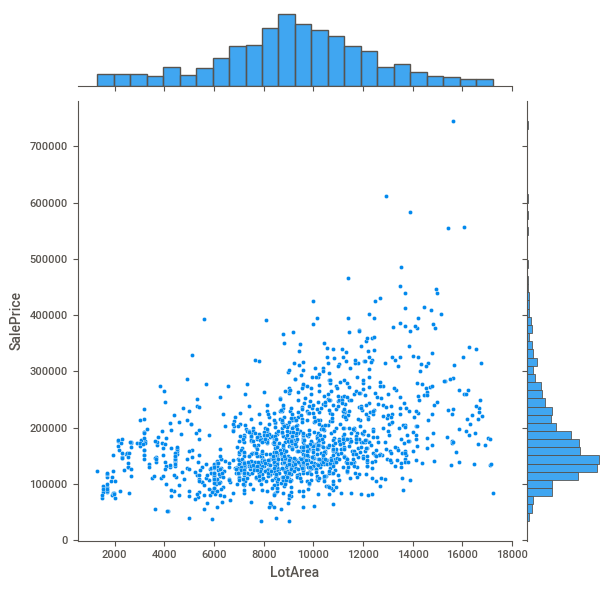

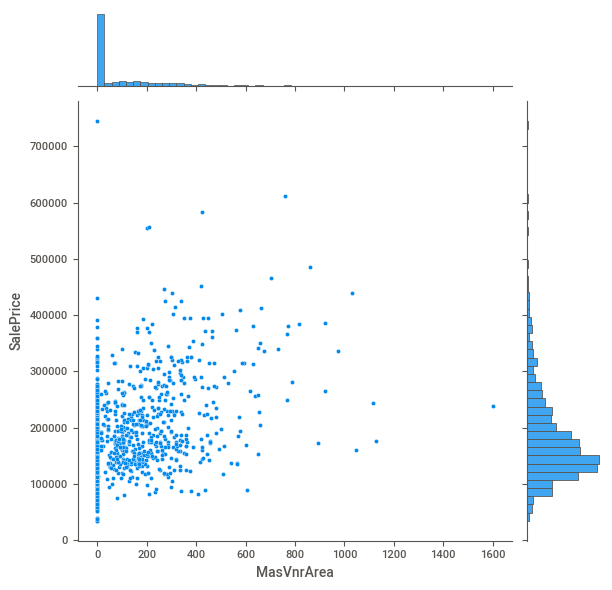

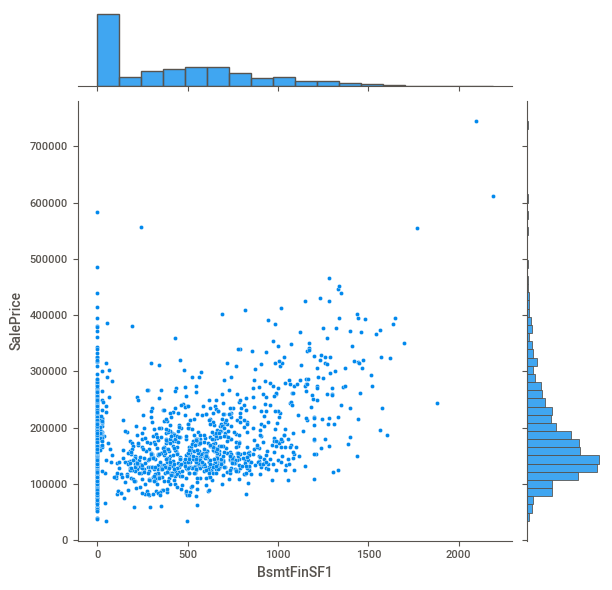

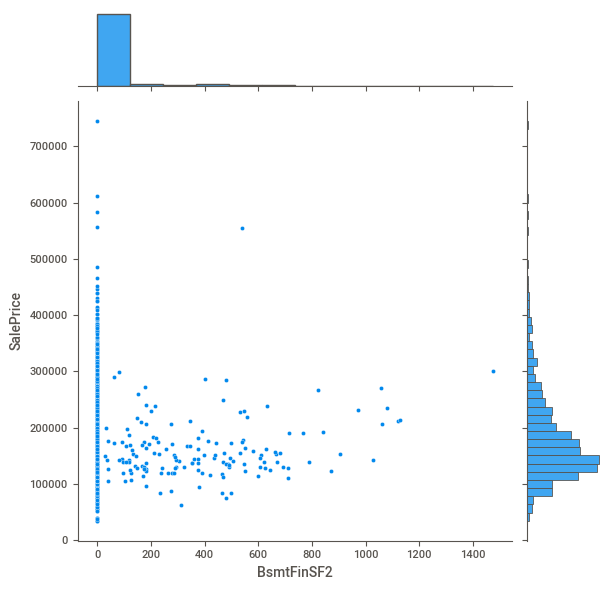

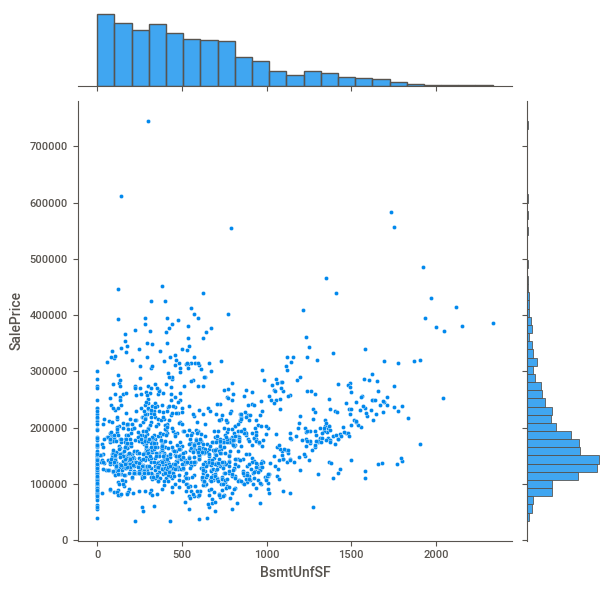

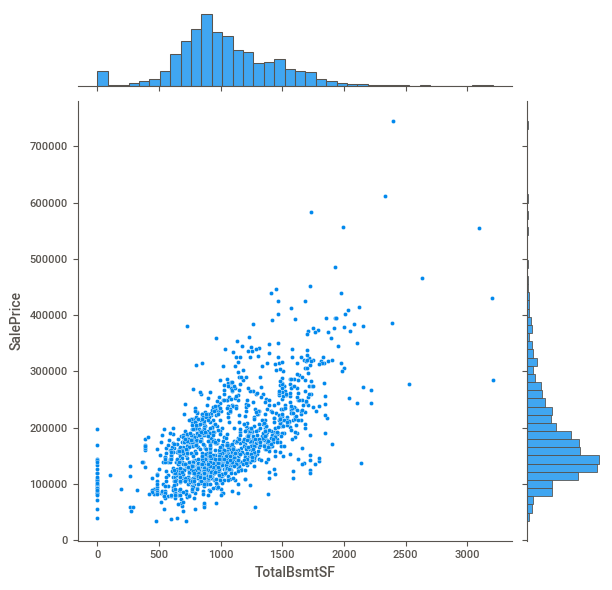

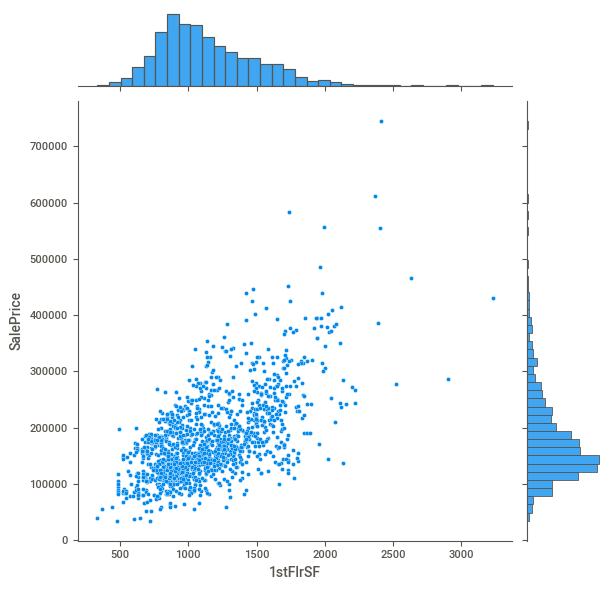

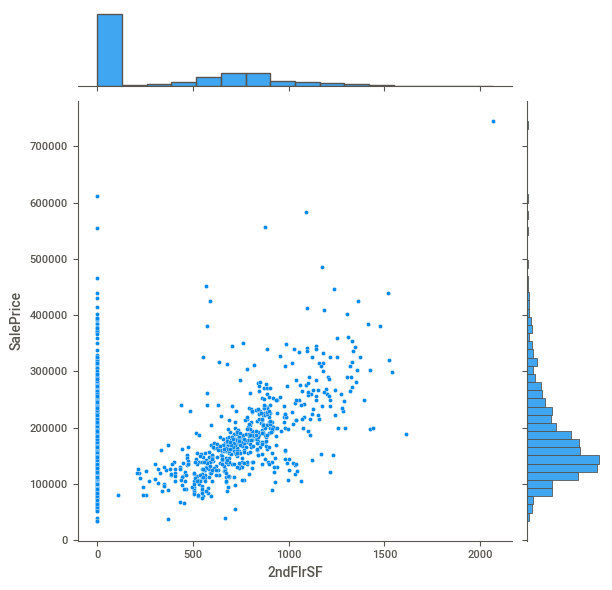

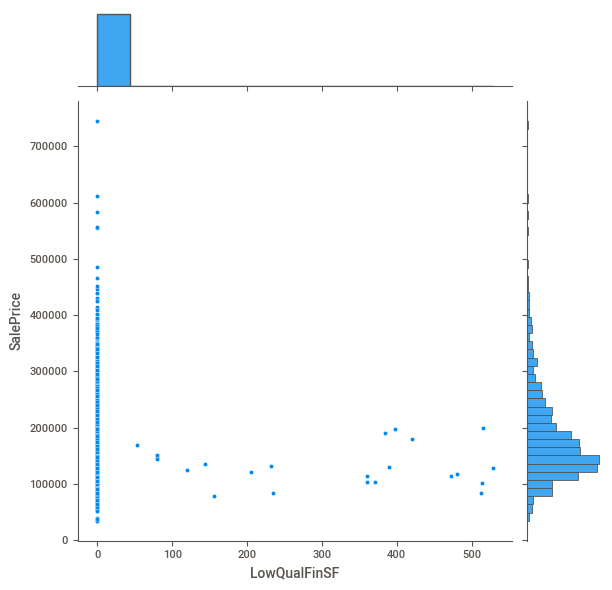

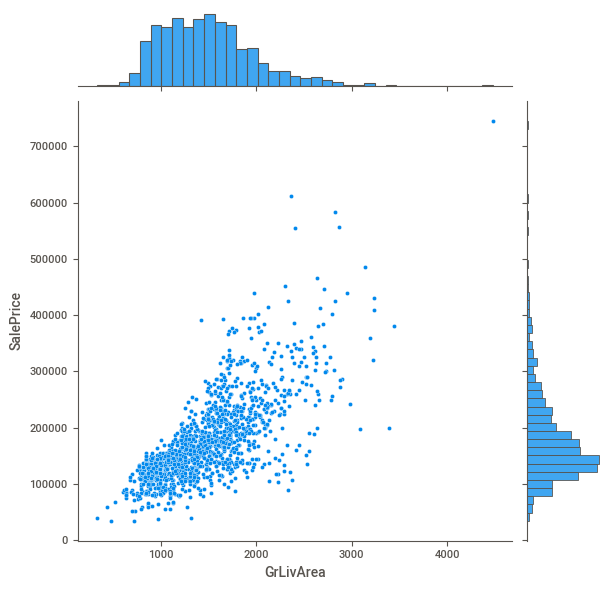

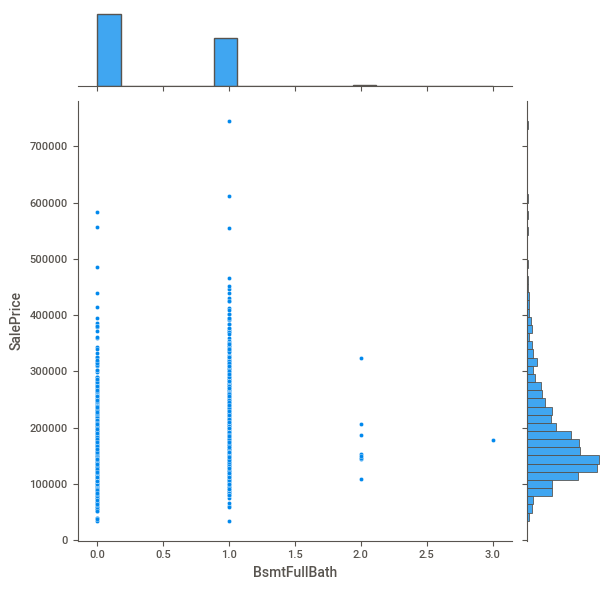

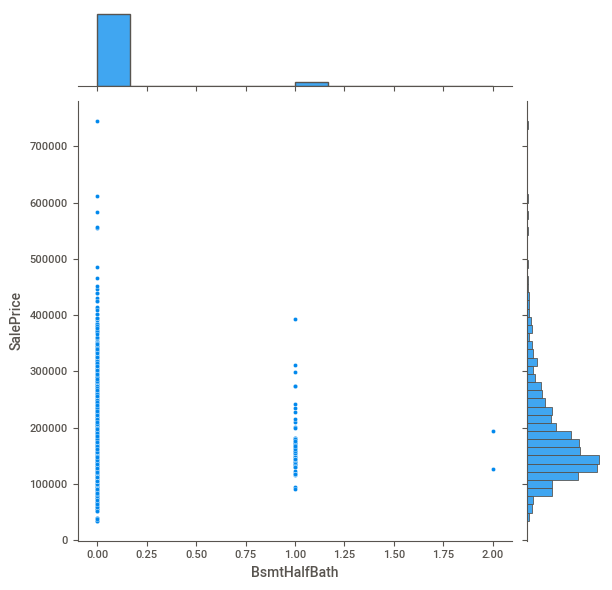

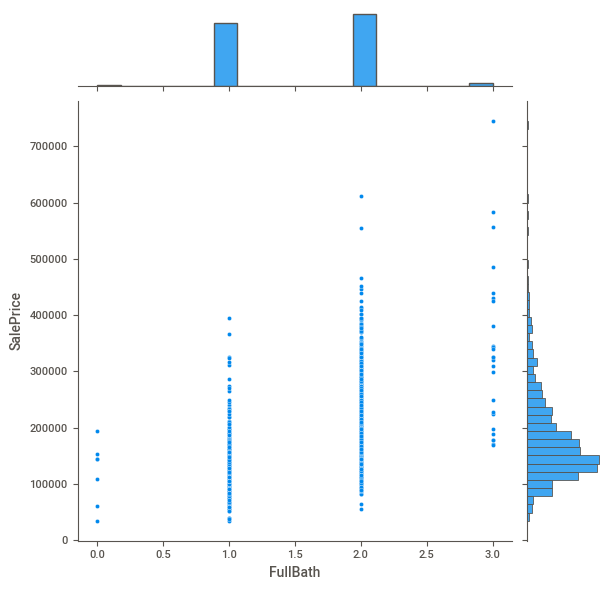

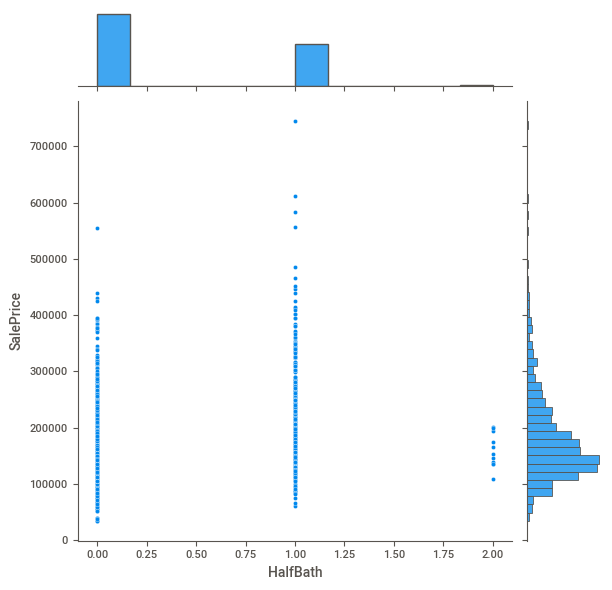

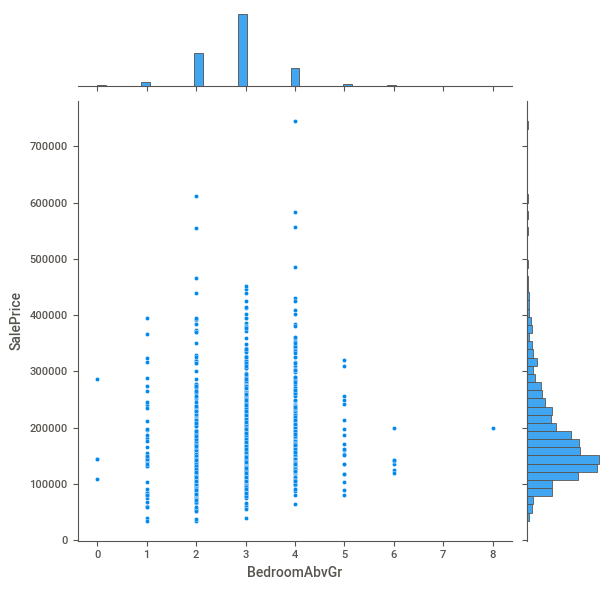

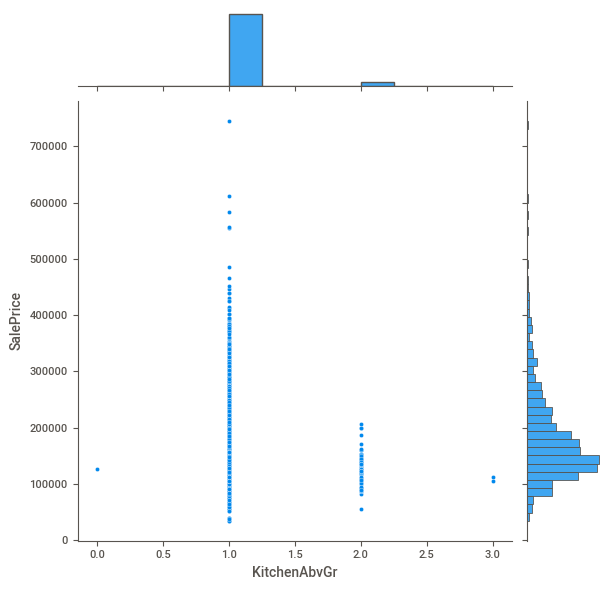

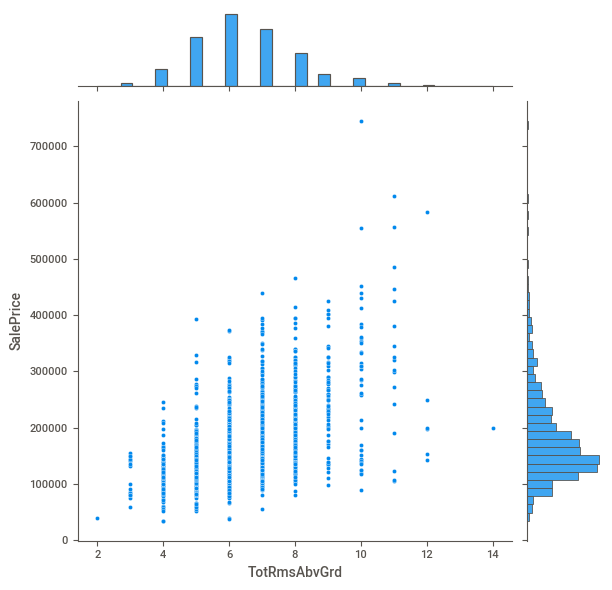

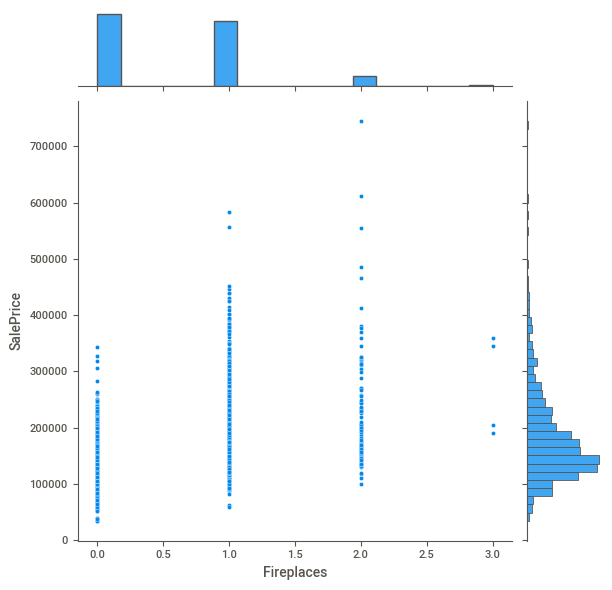

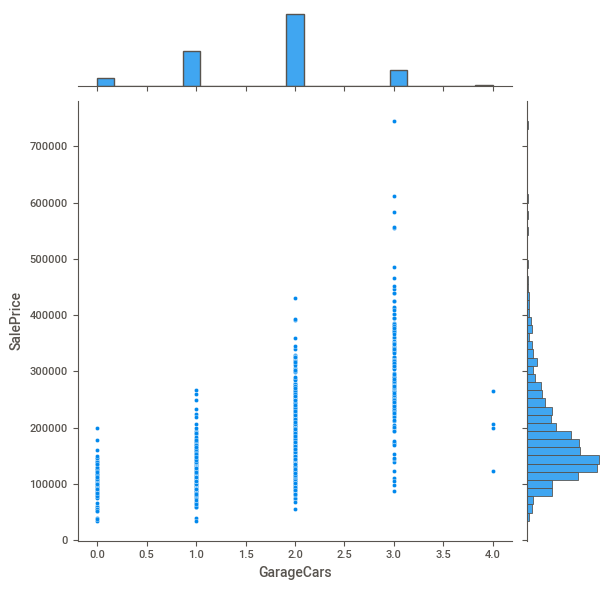

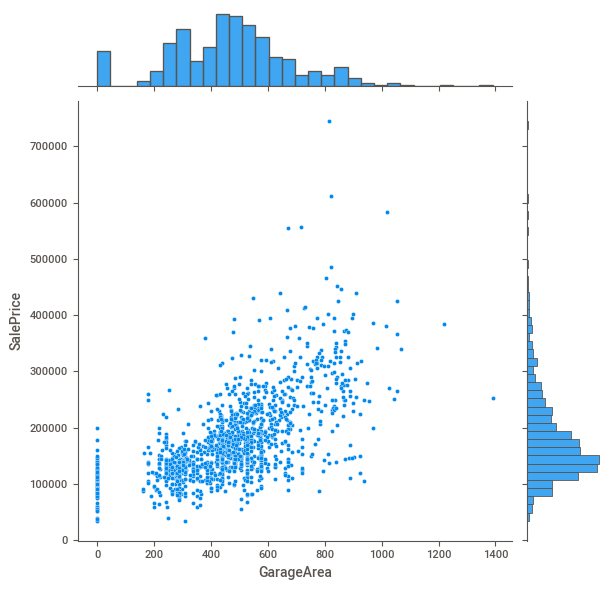

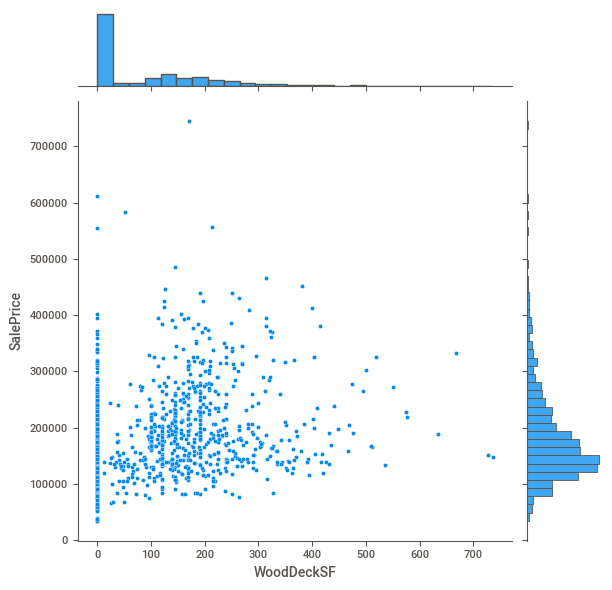

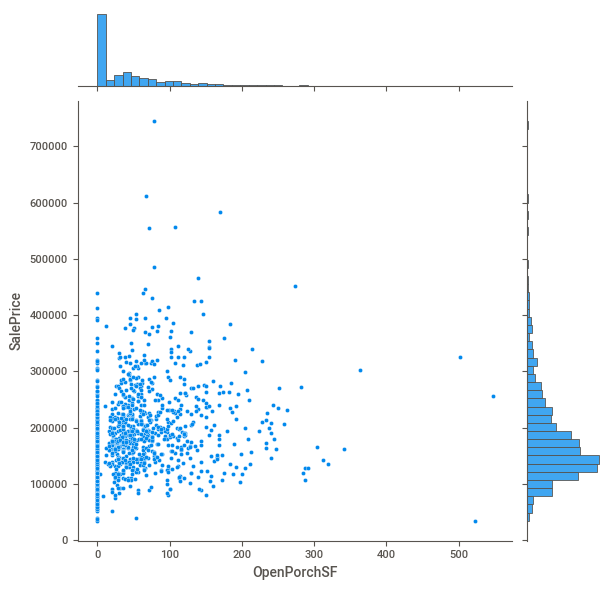

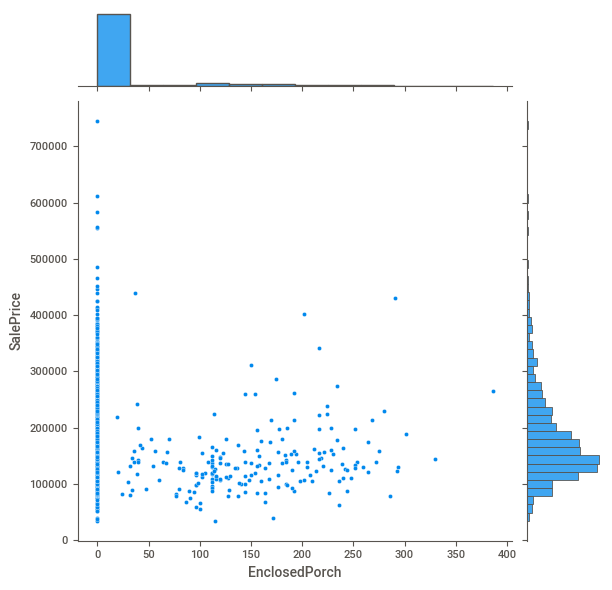

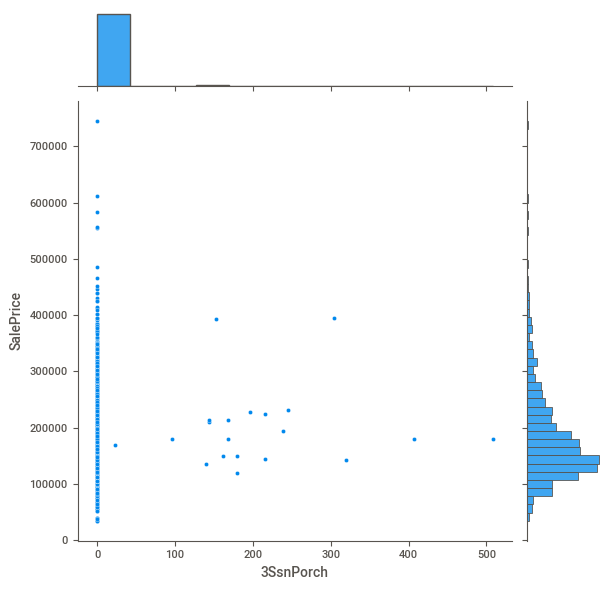

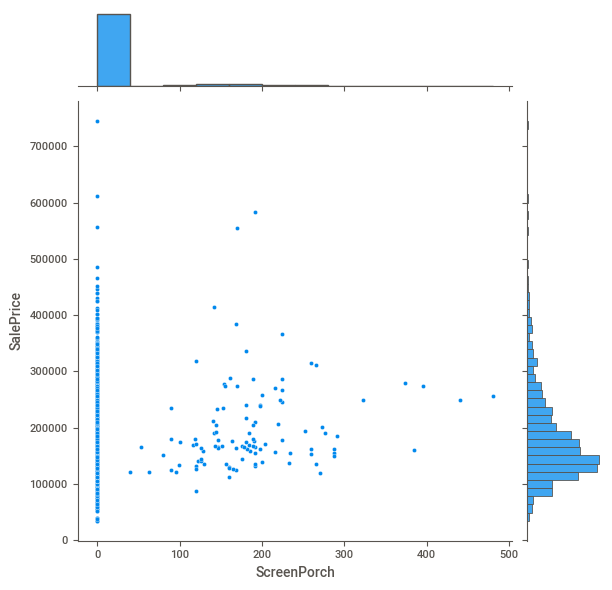

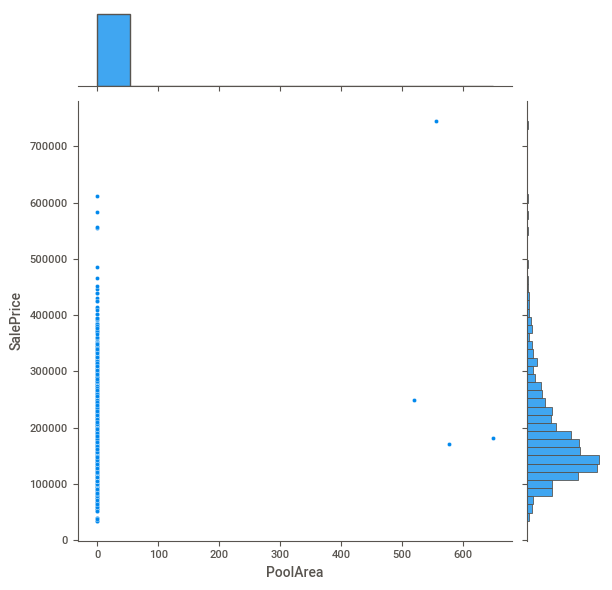

In [34]:
joint_plot(df_house[num_cols], 'SalePrice')

_**Notes:**_
* LetArea, Bsmt Cols, 1stFlrSF, 2ndFlrSF, GRLivArea, GarageArea, TotRmsAbvGrd seems to have high linear relation with SalePrice

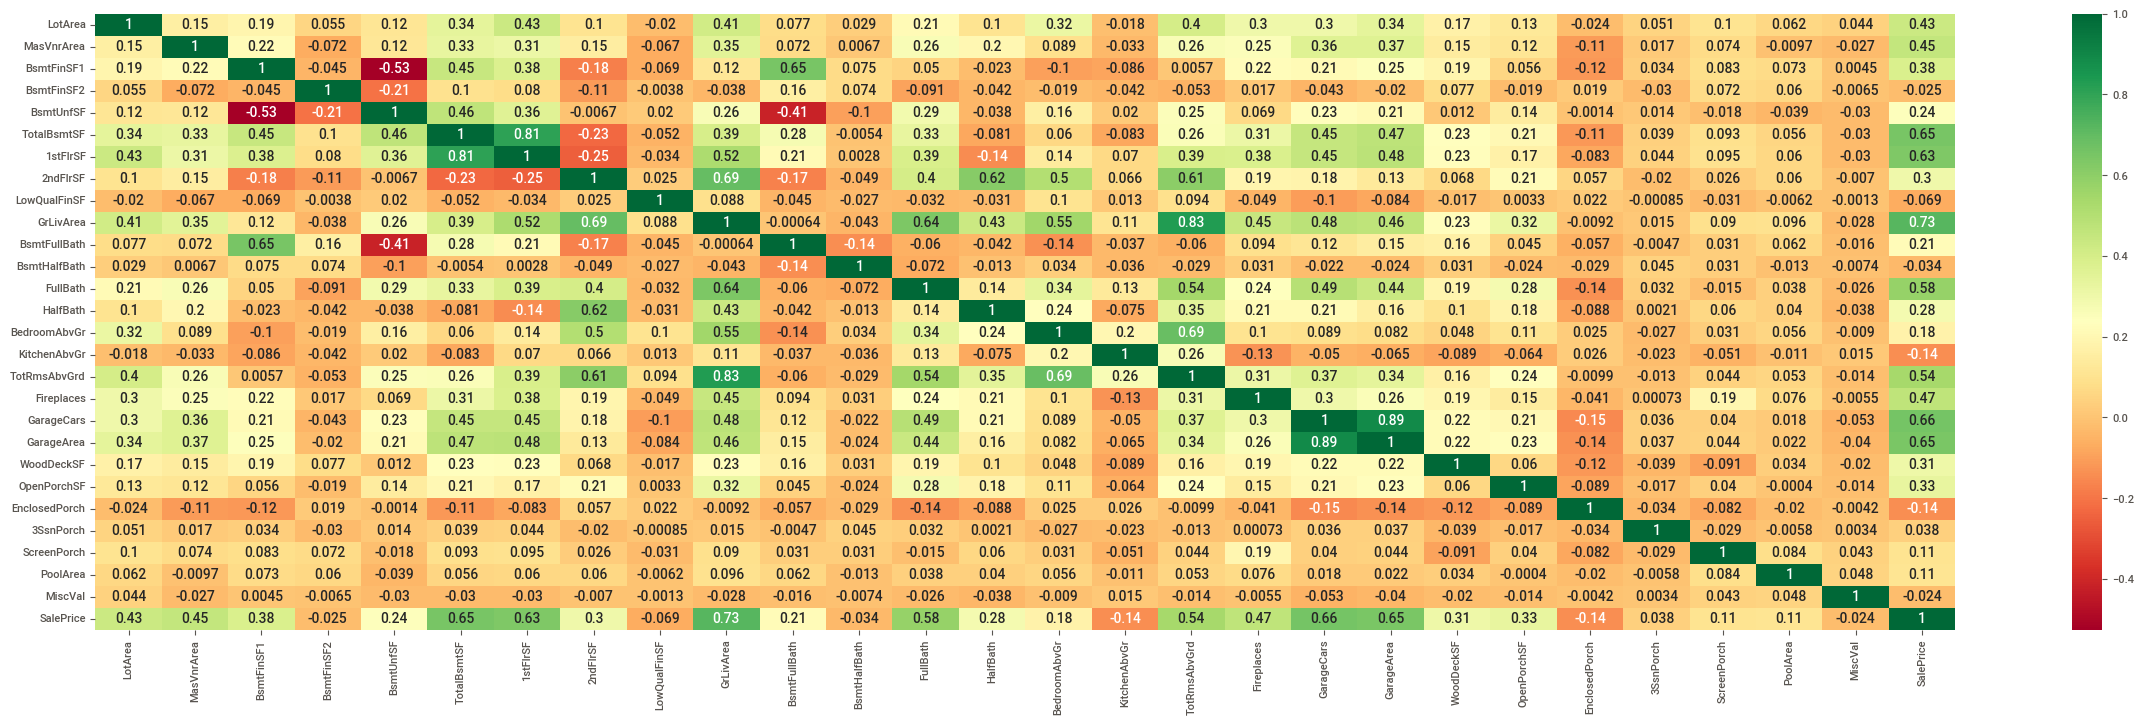

In [35]:
#correlations
plt.figure(figsize = (30,8))
sns.heatmap(df_house[num_cols].corr(), annot = True, cmap = 'RdYlGn')
plt.show()

_**Notes:**_
* GarageArea and GaragCars have high correlations
* GrLivArea and TotRmsAbvGrd have high correlations
* TotalBSMTSF and 1stFlrSF have high correlations

### Visualizing Categorical Variables

In [36]:
def bx_plt(df, y):
    col_list = list(df.columns)
    y_var = y
    x_fig_size = 20
    y_fig_size = 7
    i=1
    for cat in col_list[:-2]:
        plt.figure(figsize=(x_fig_size, y_fig_size))
        sns.boxplot(x = cat, y = y_var, data = df)
        plt.xticks(rotation=90)
        i+=1
    plt.show()

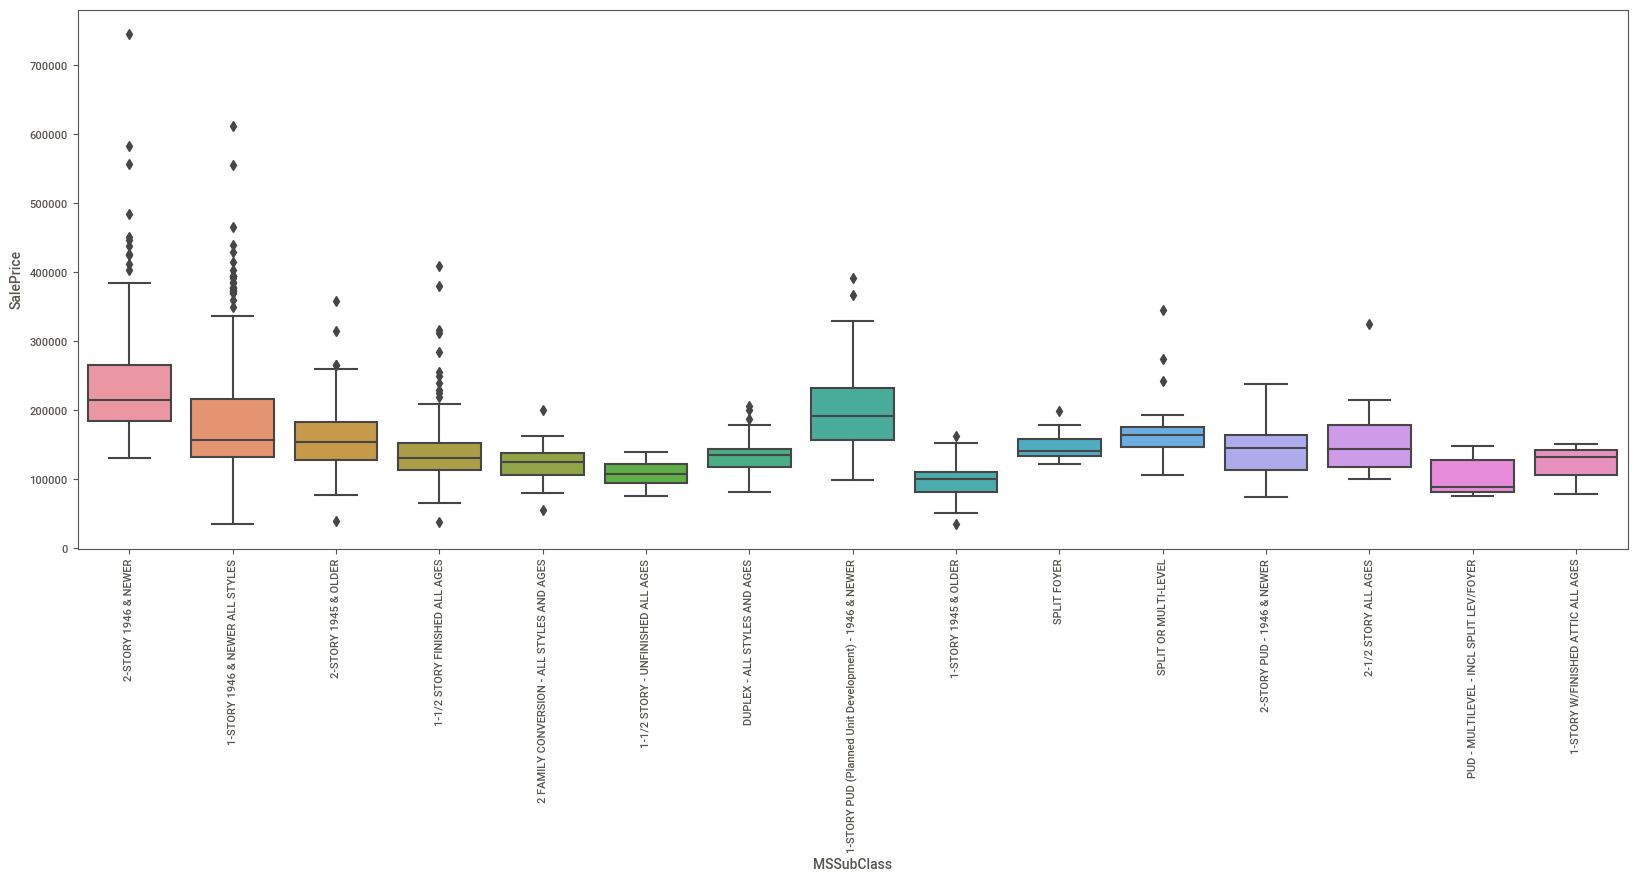

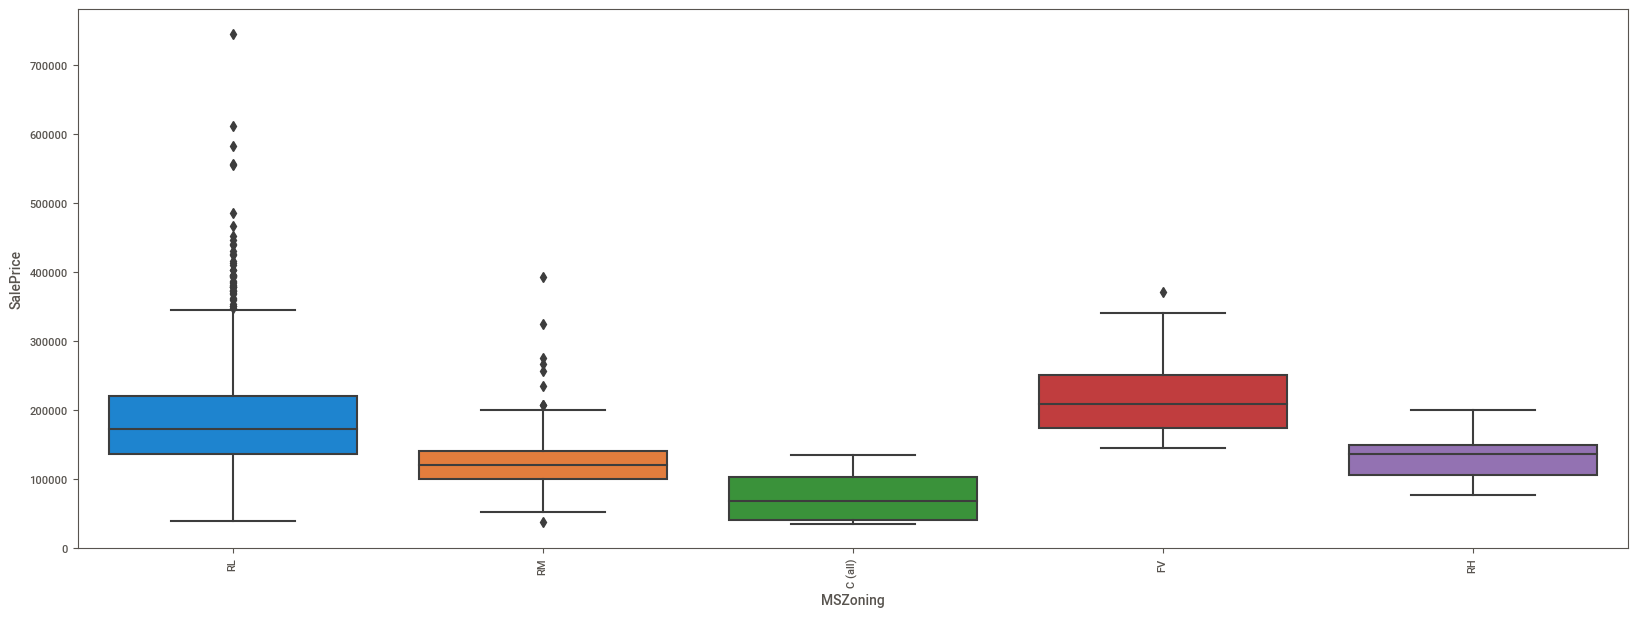

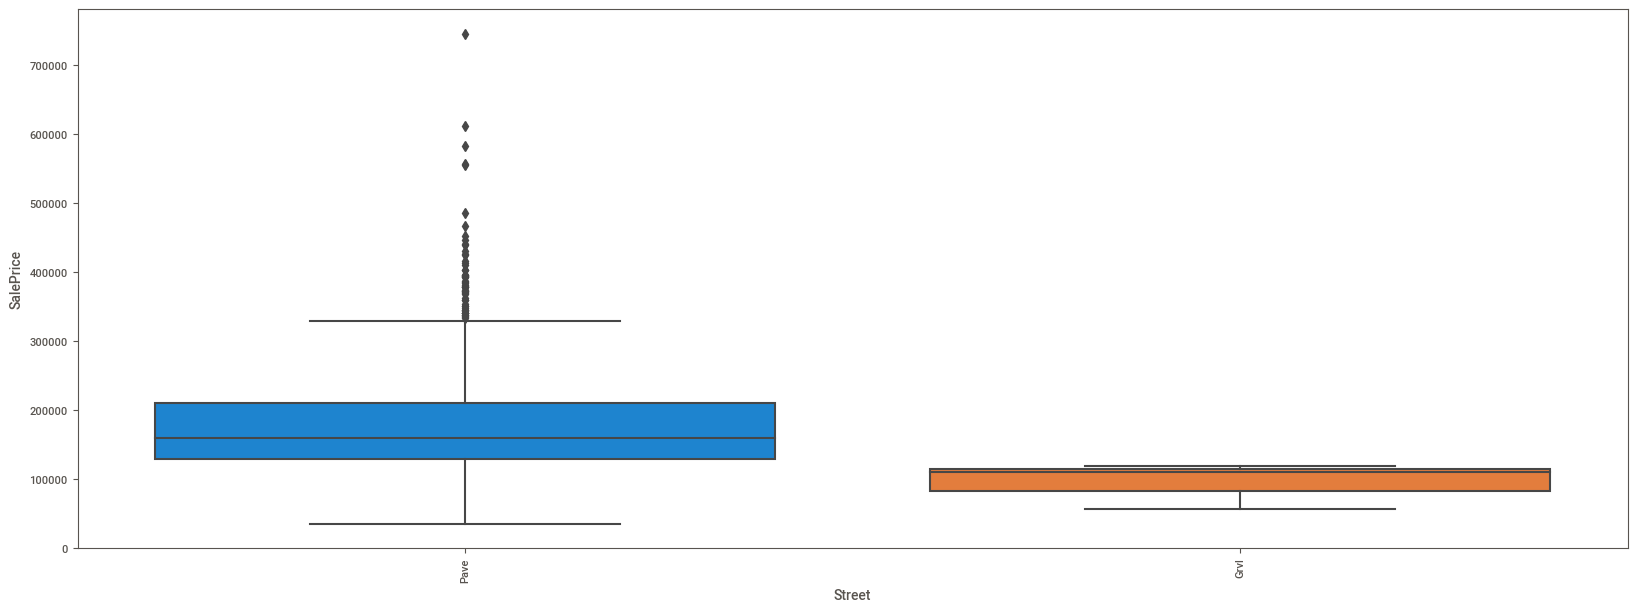

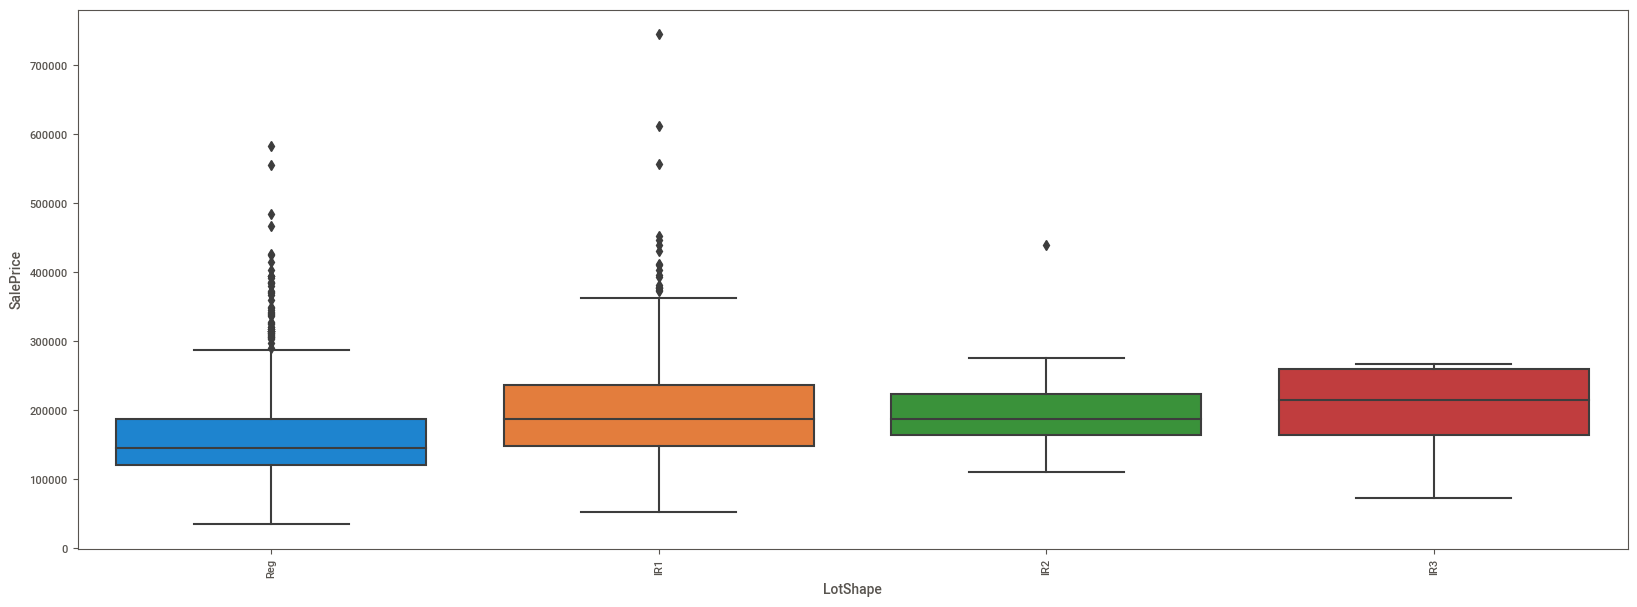

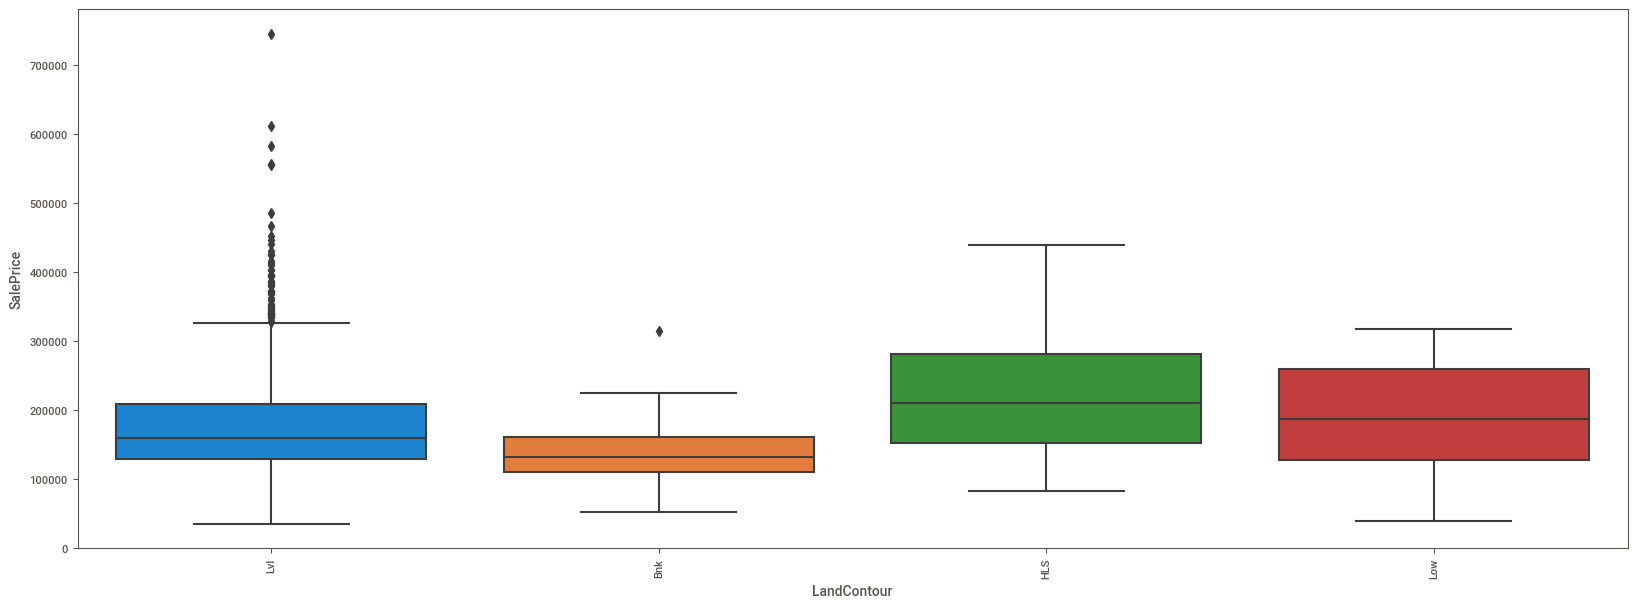

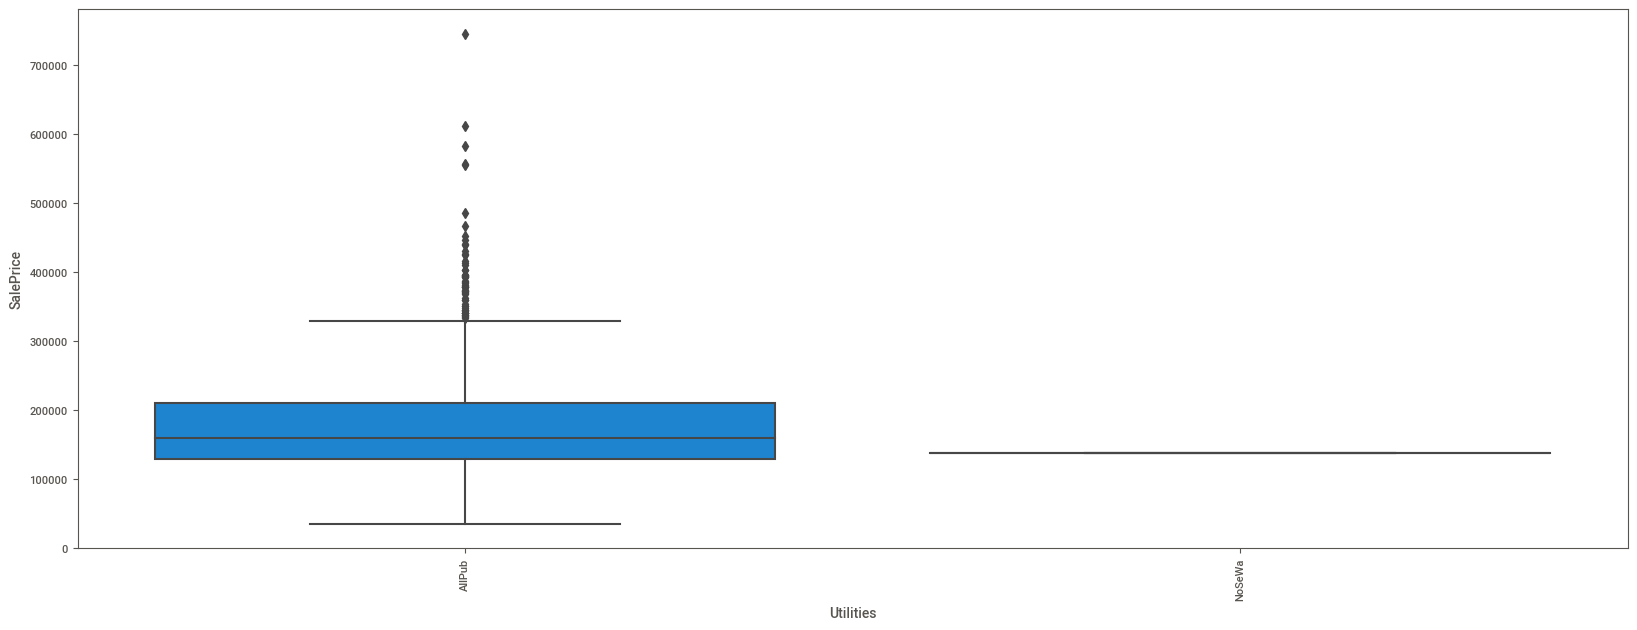

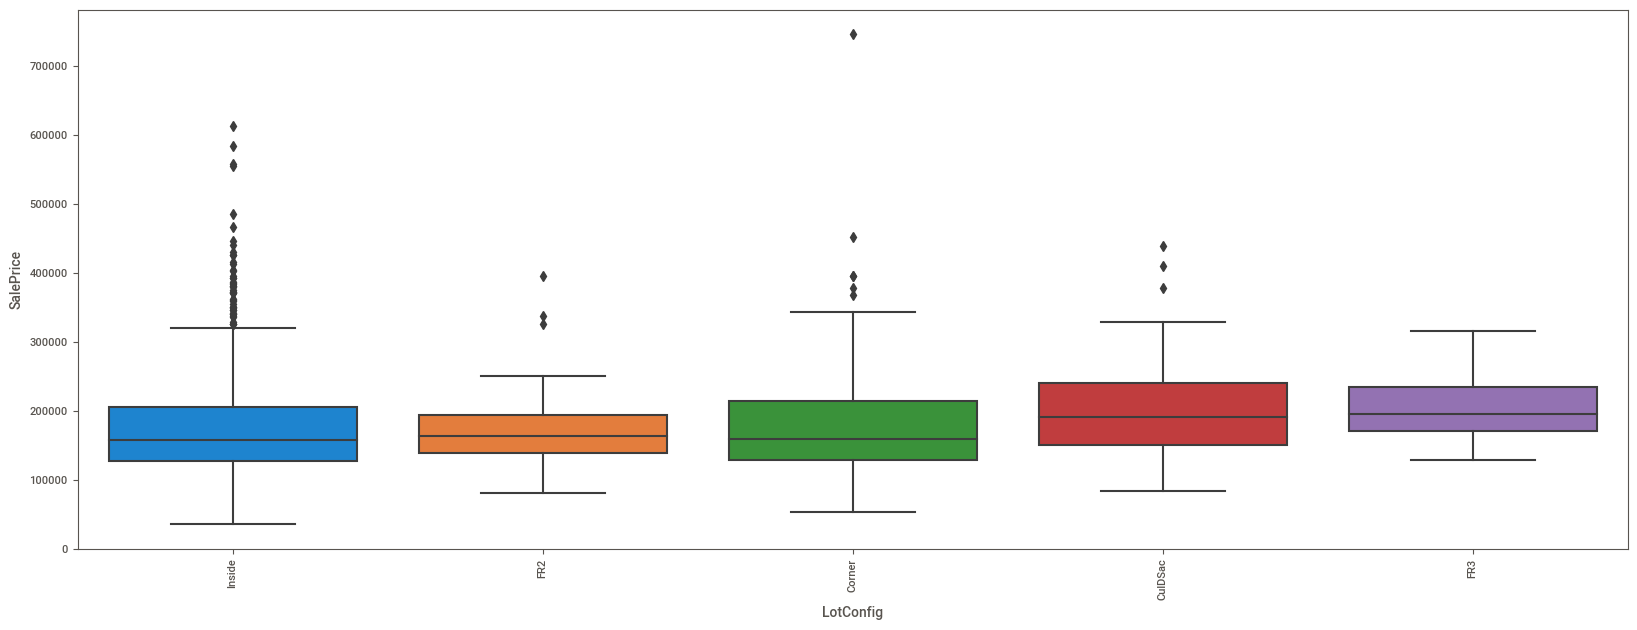

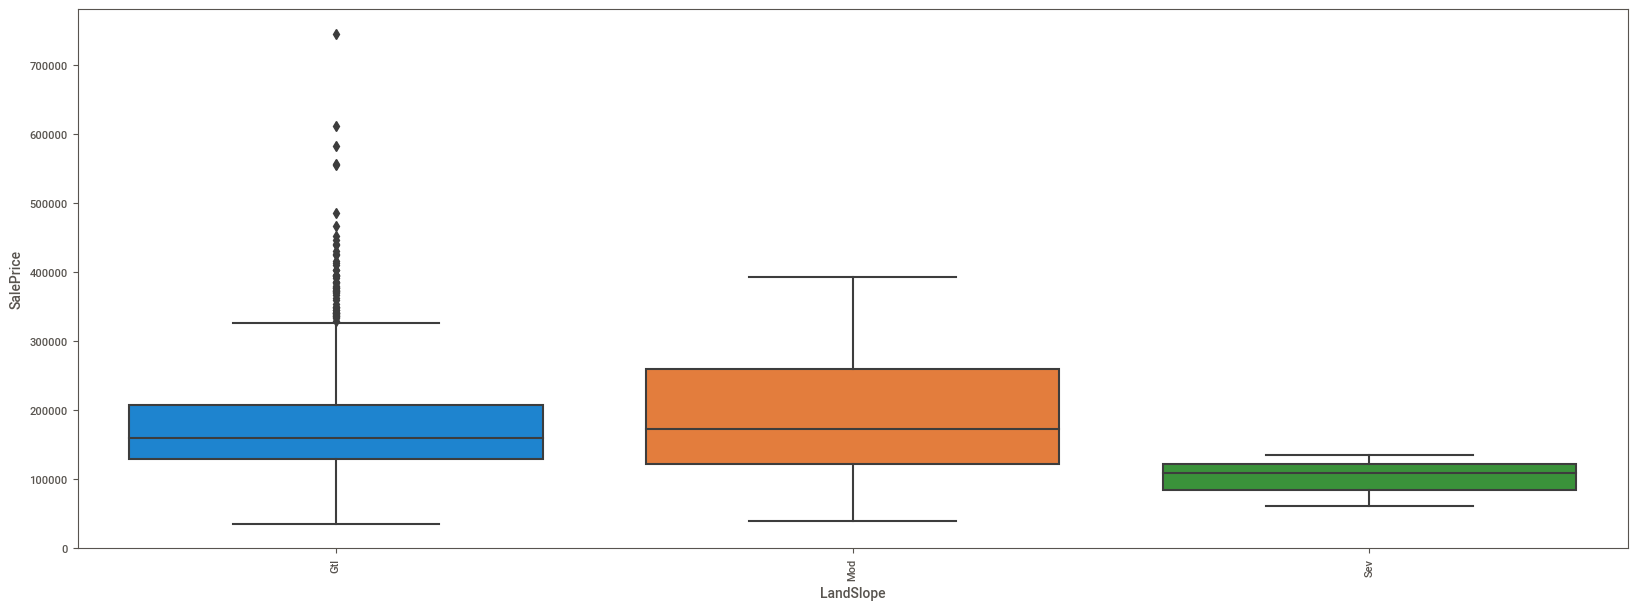

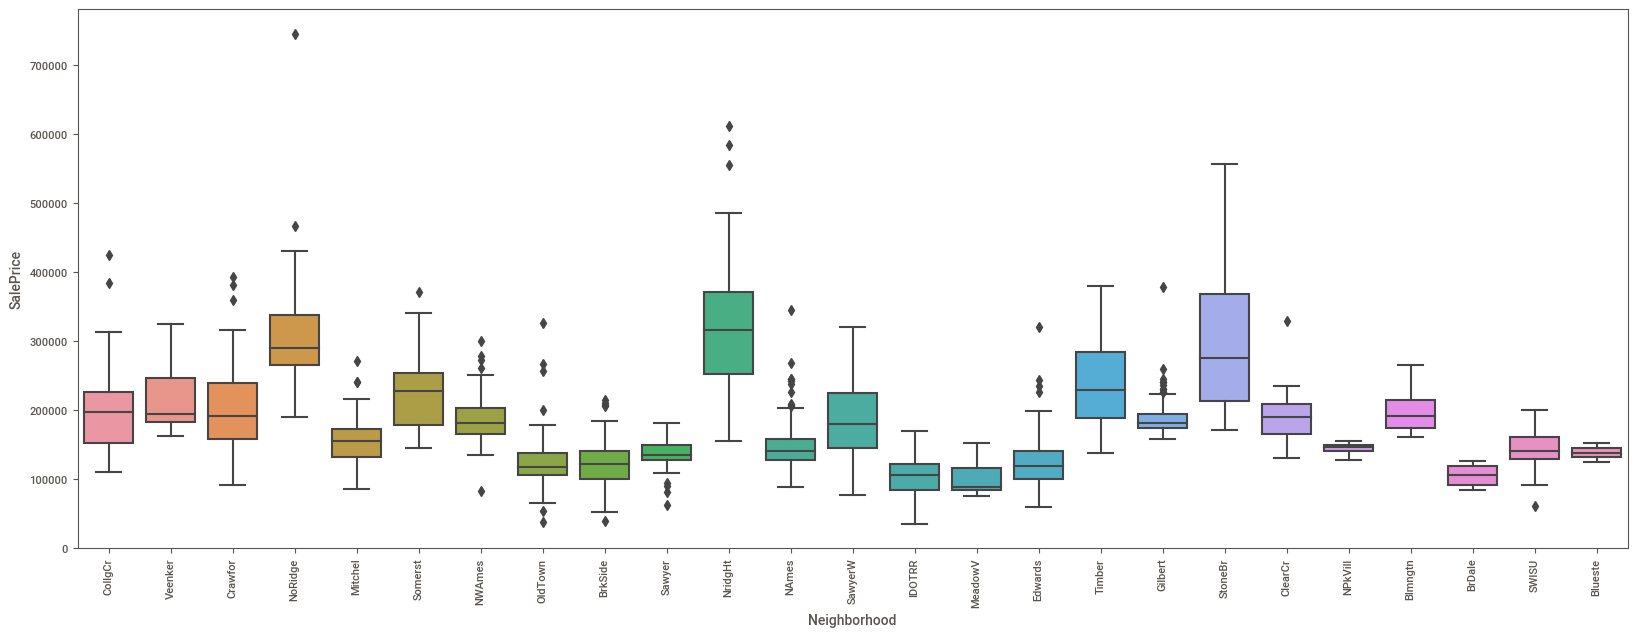

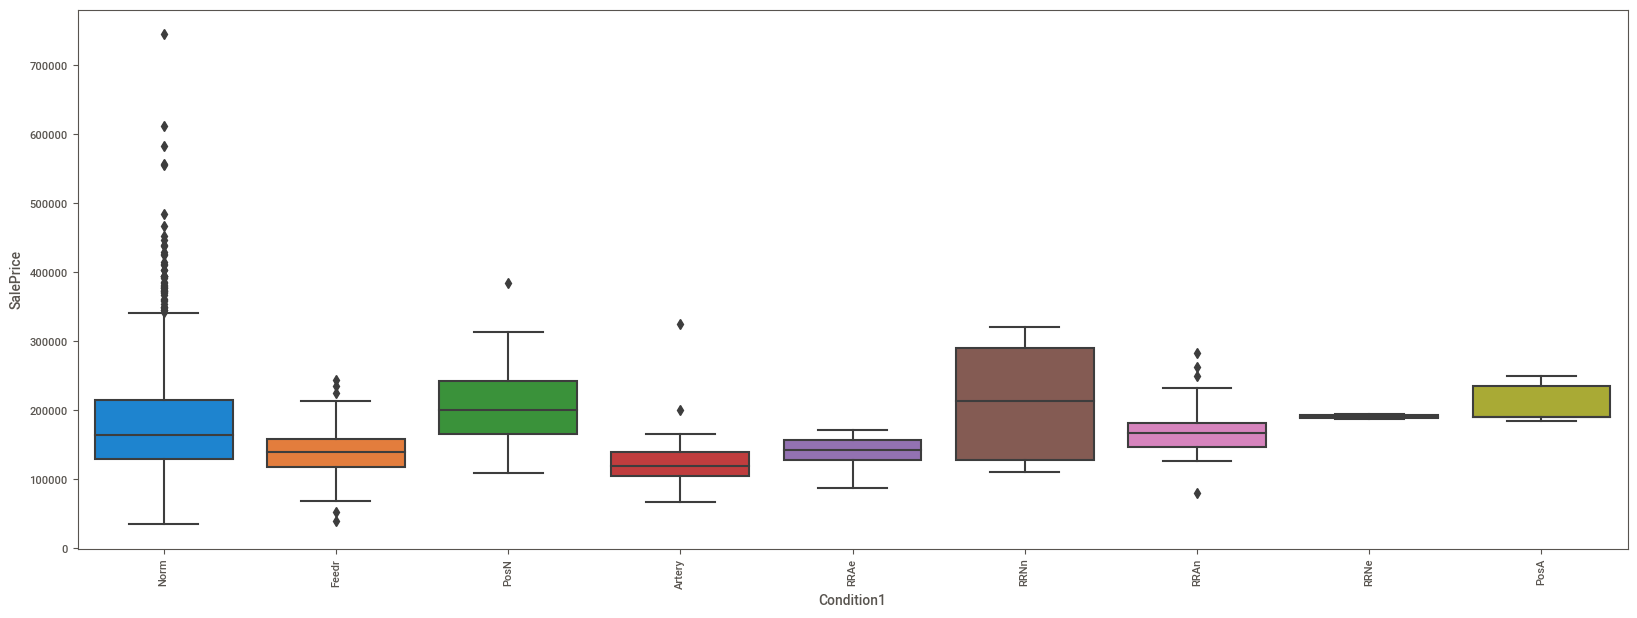

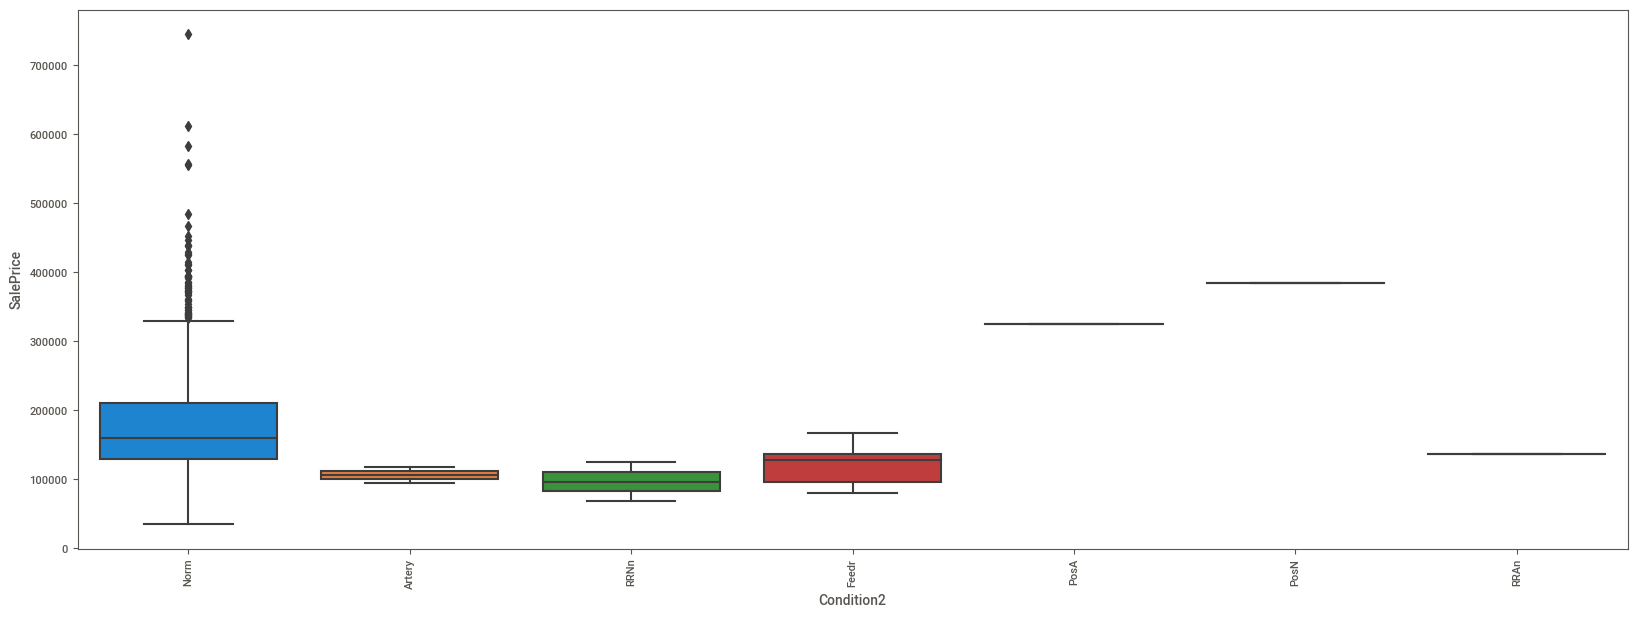

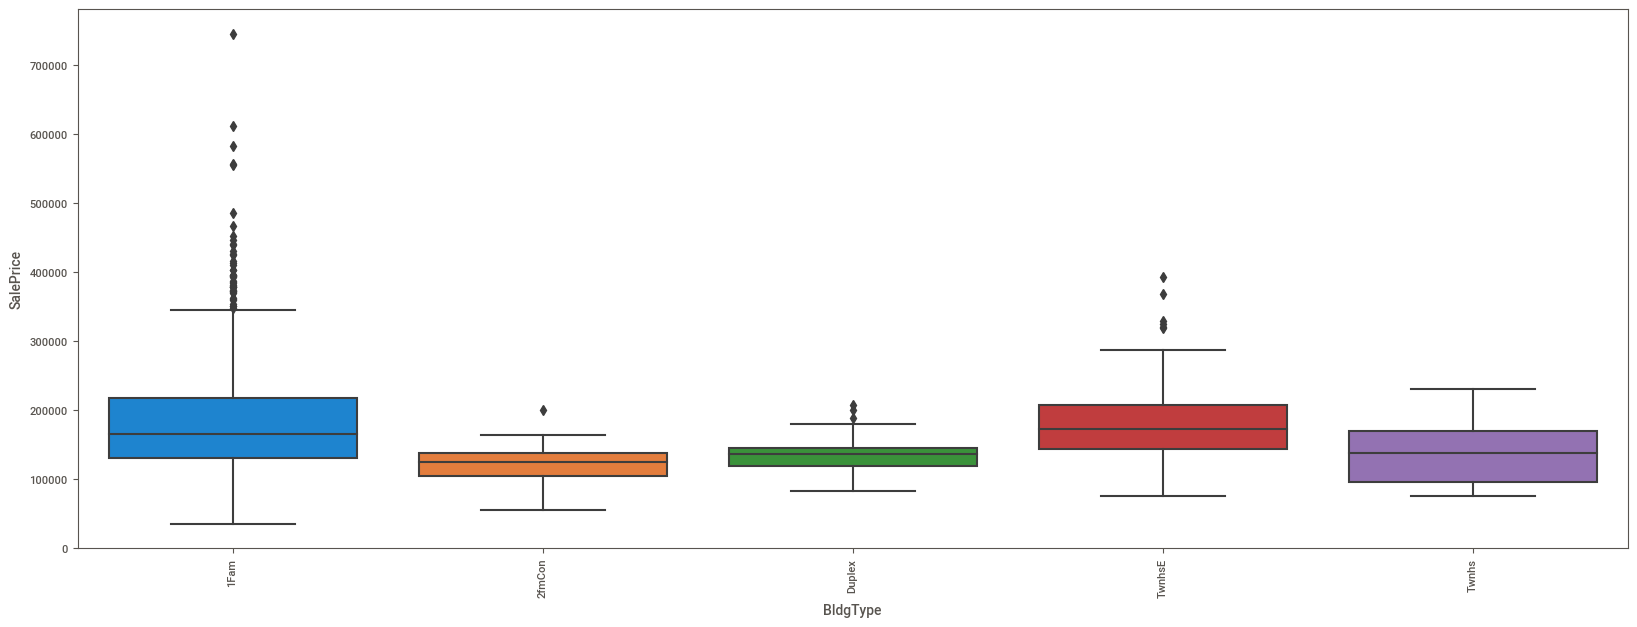

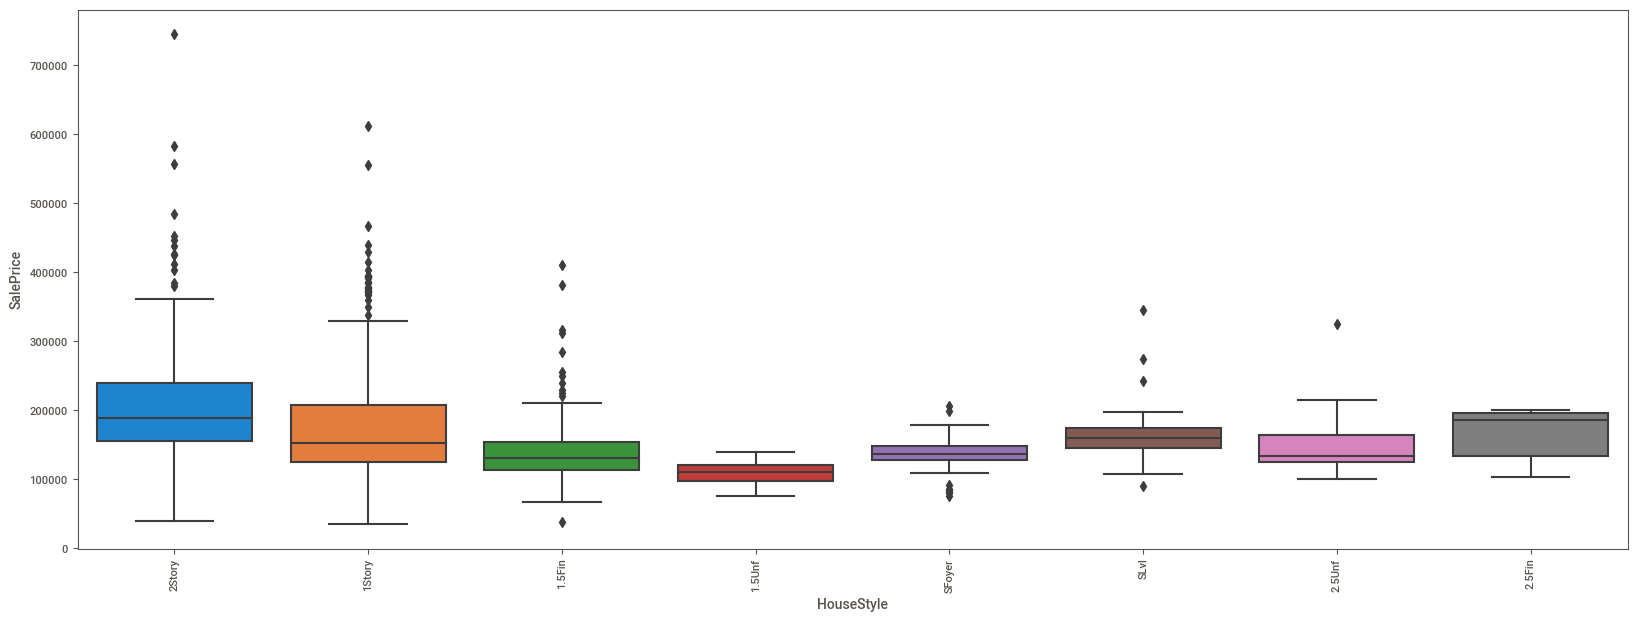

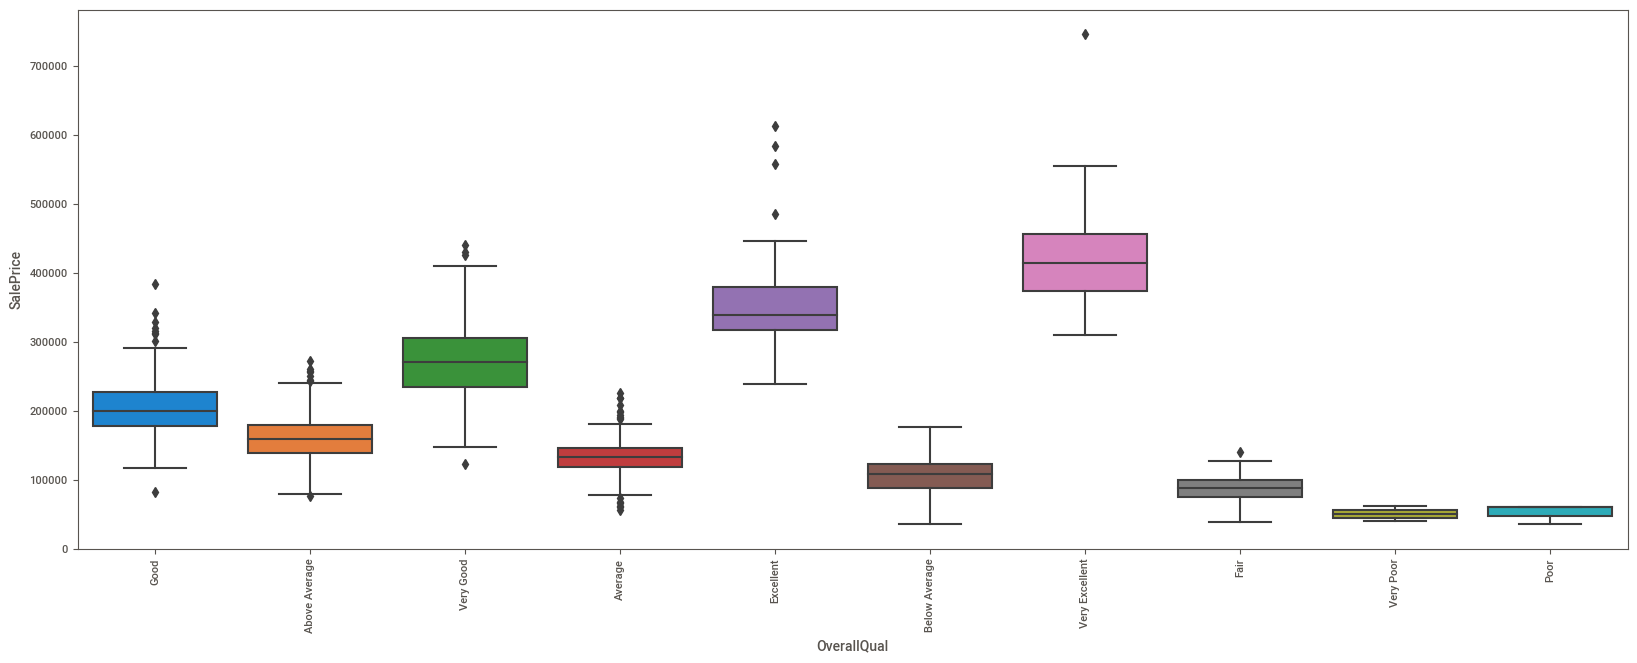

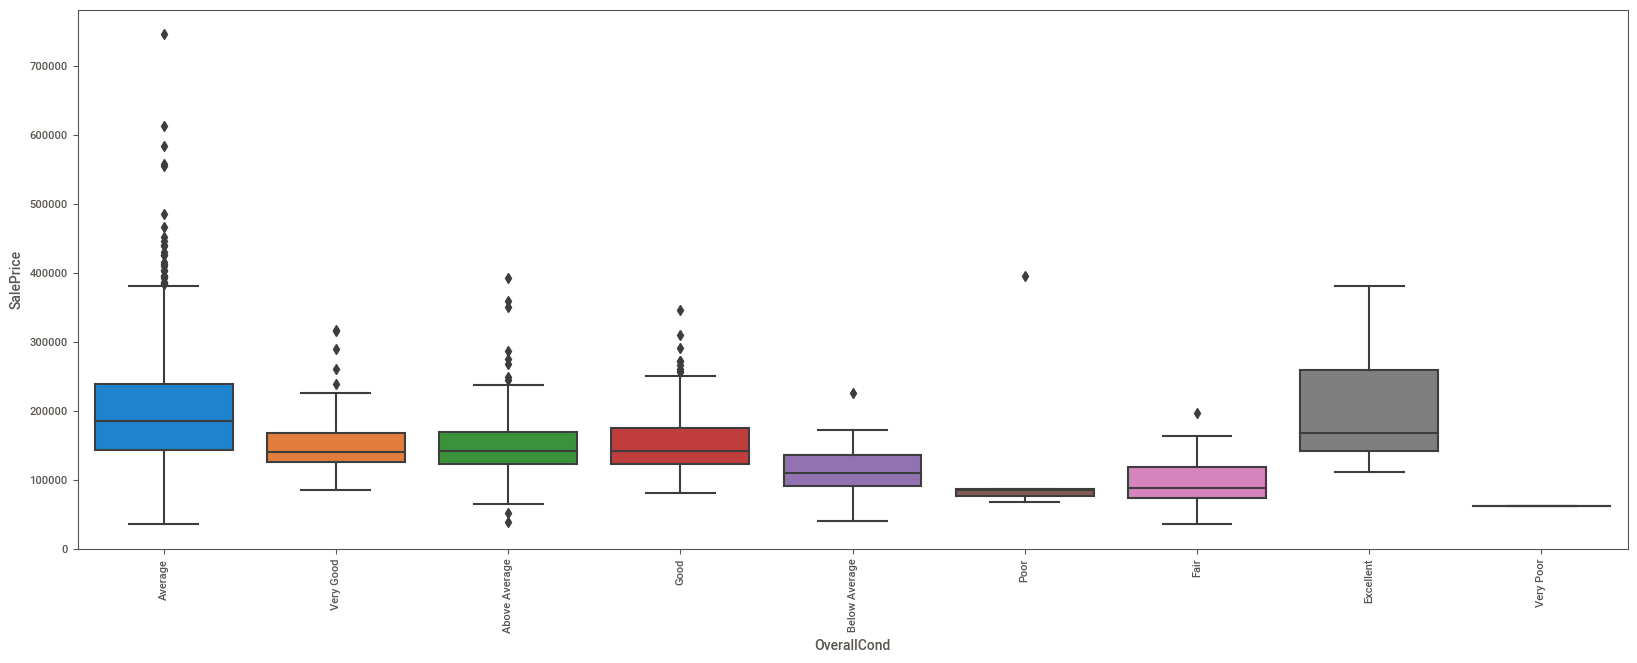

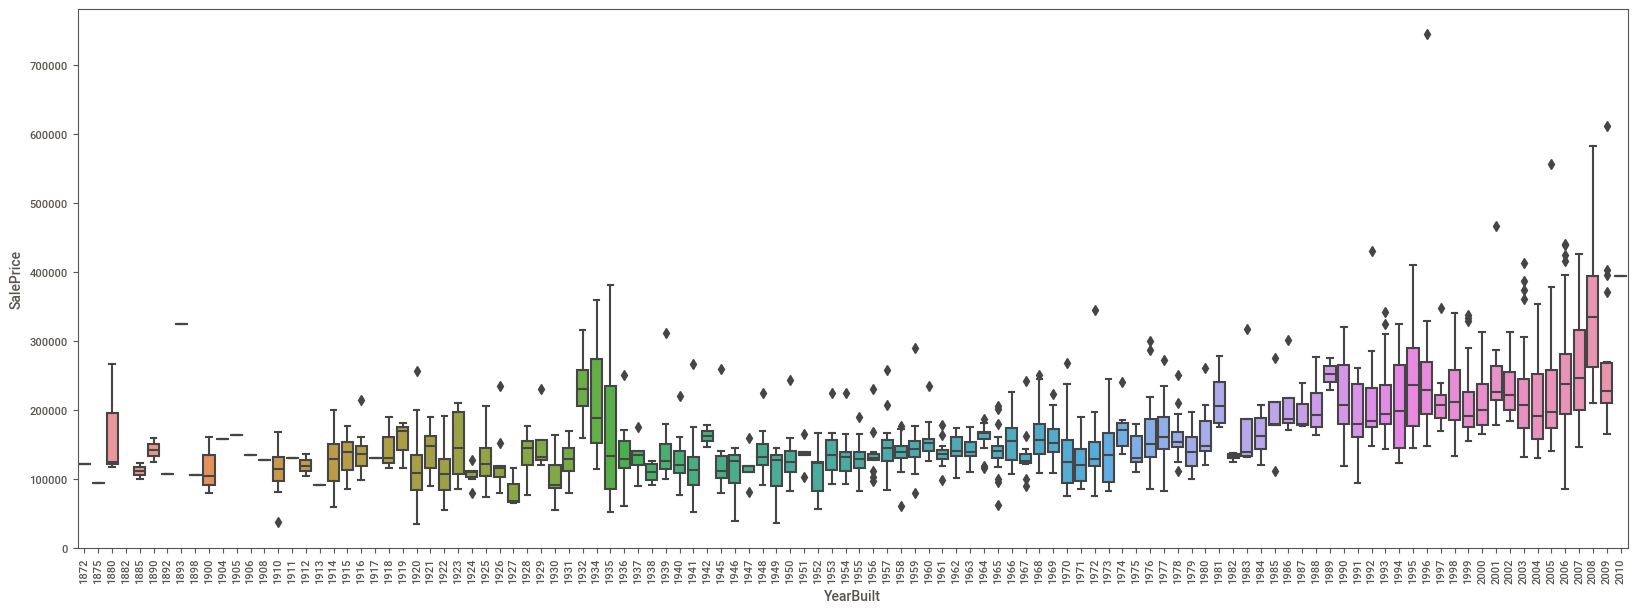

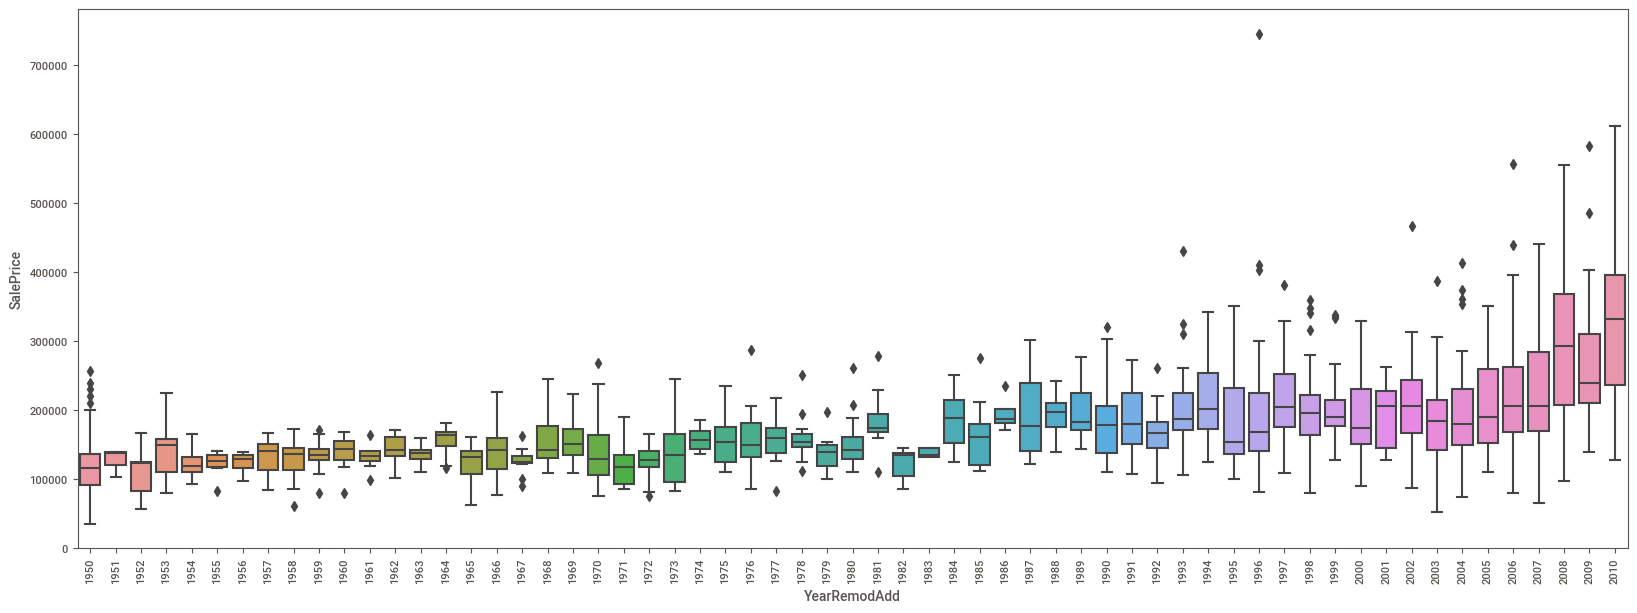

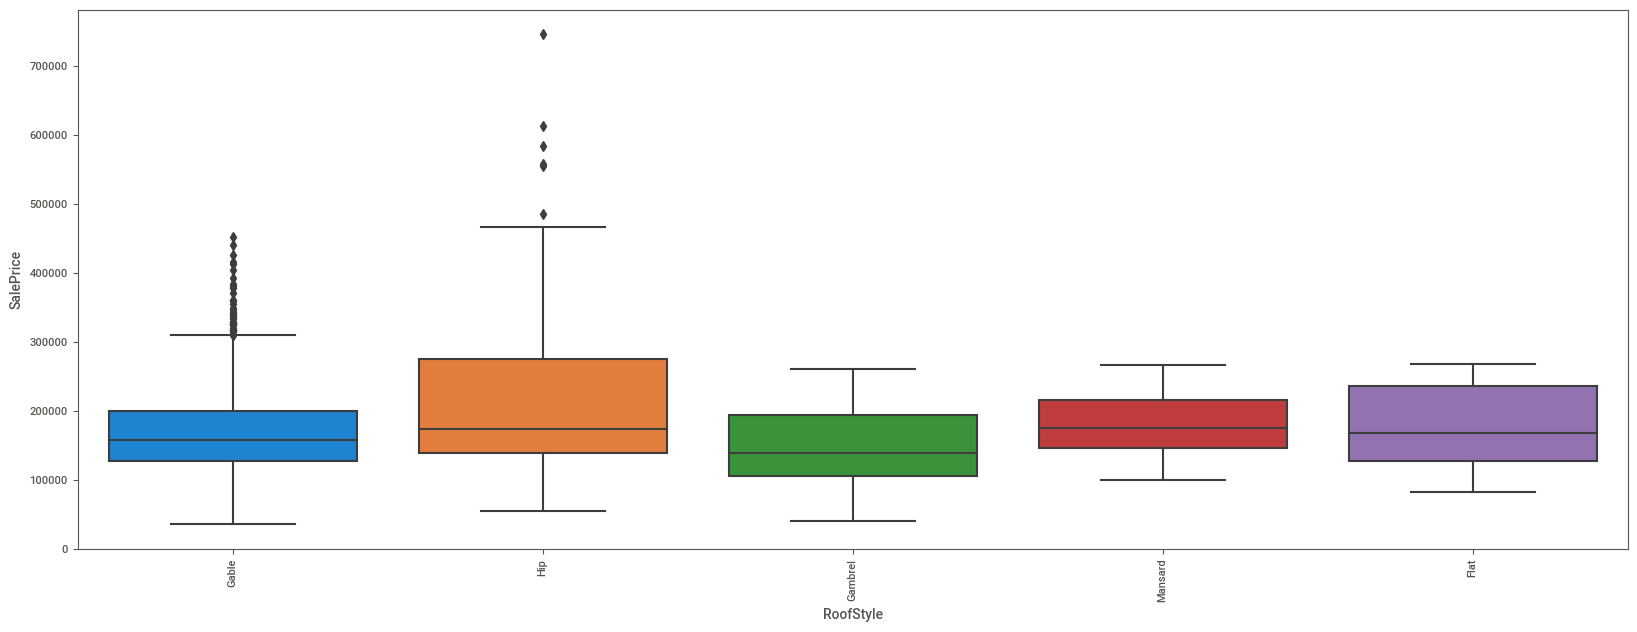

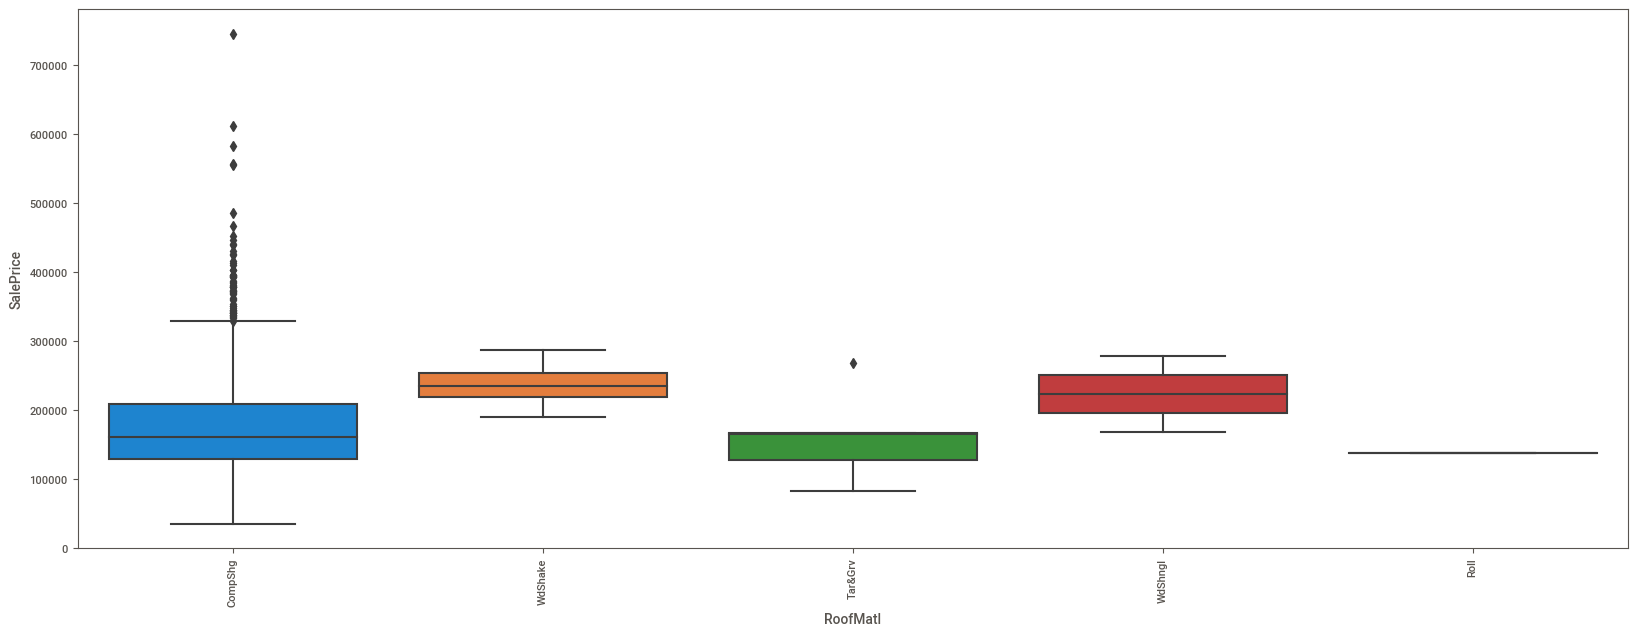

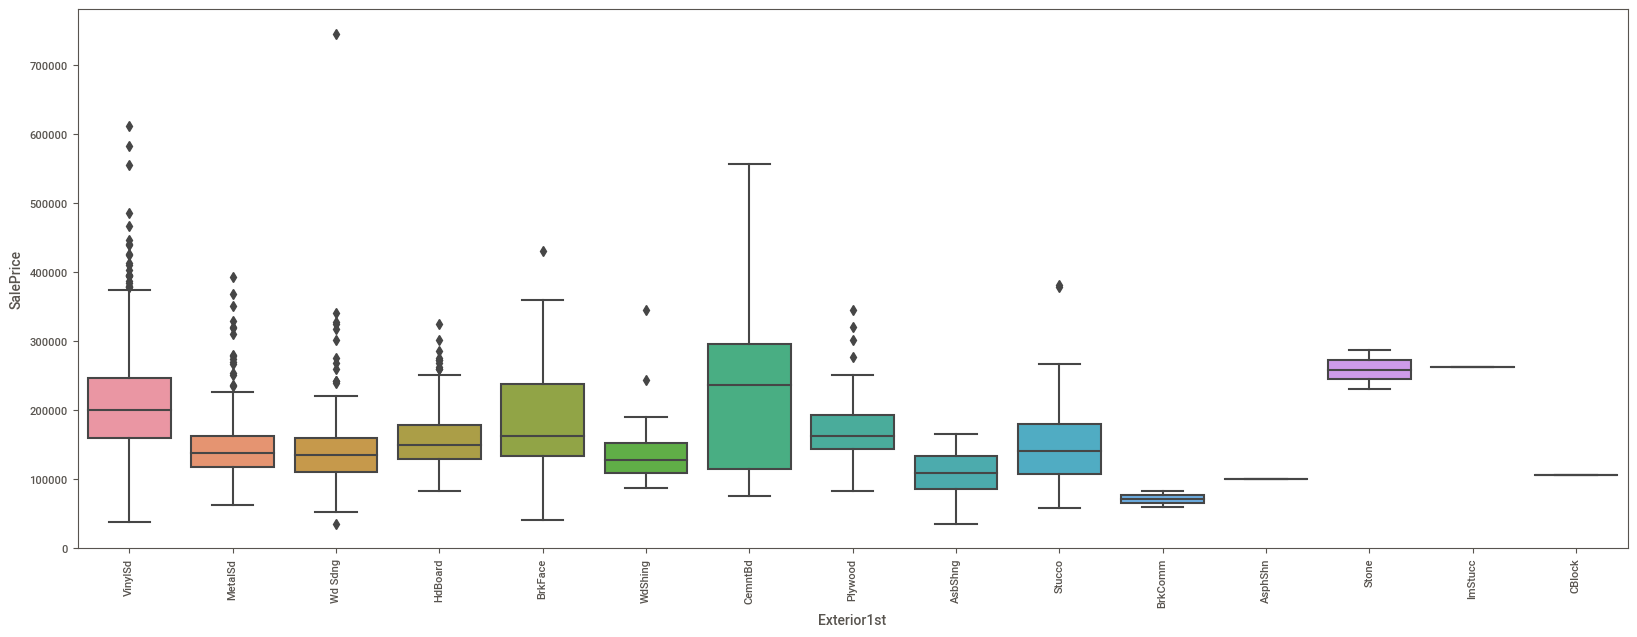

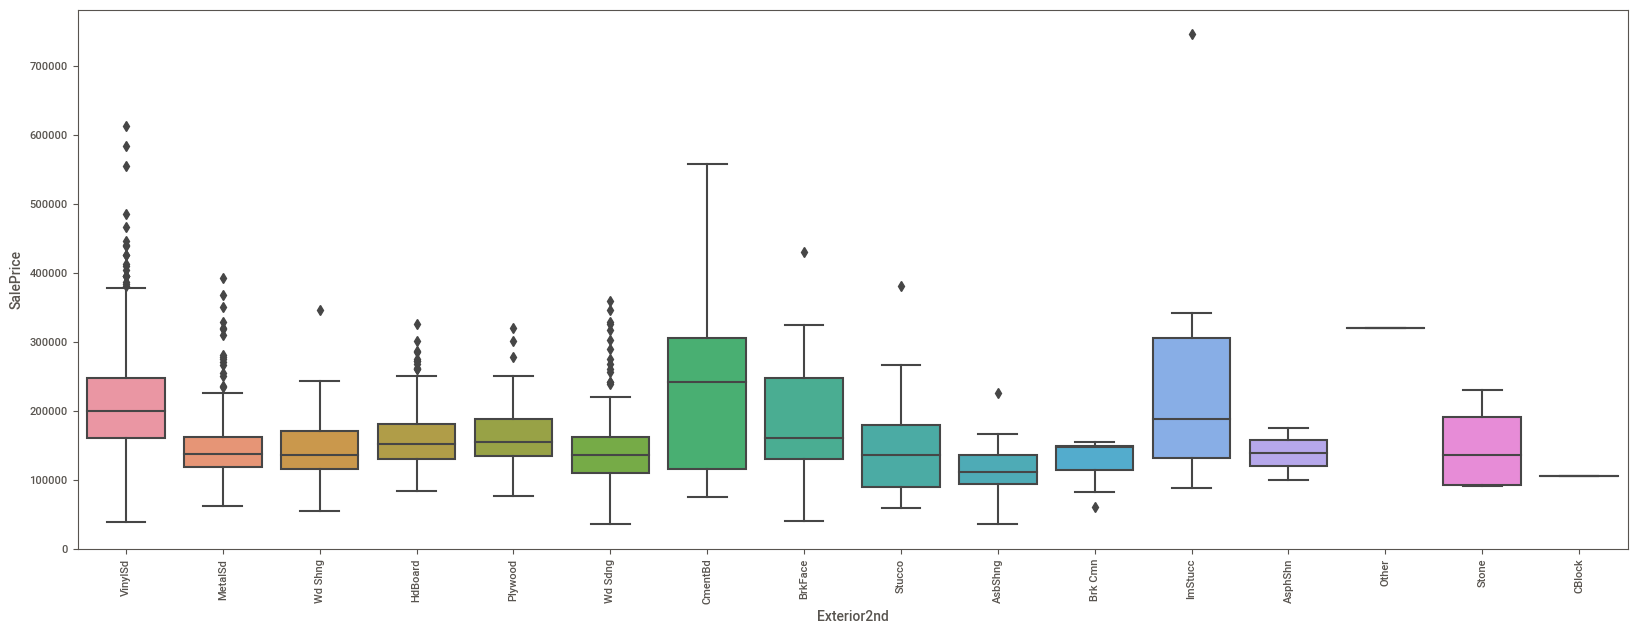

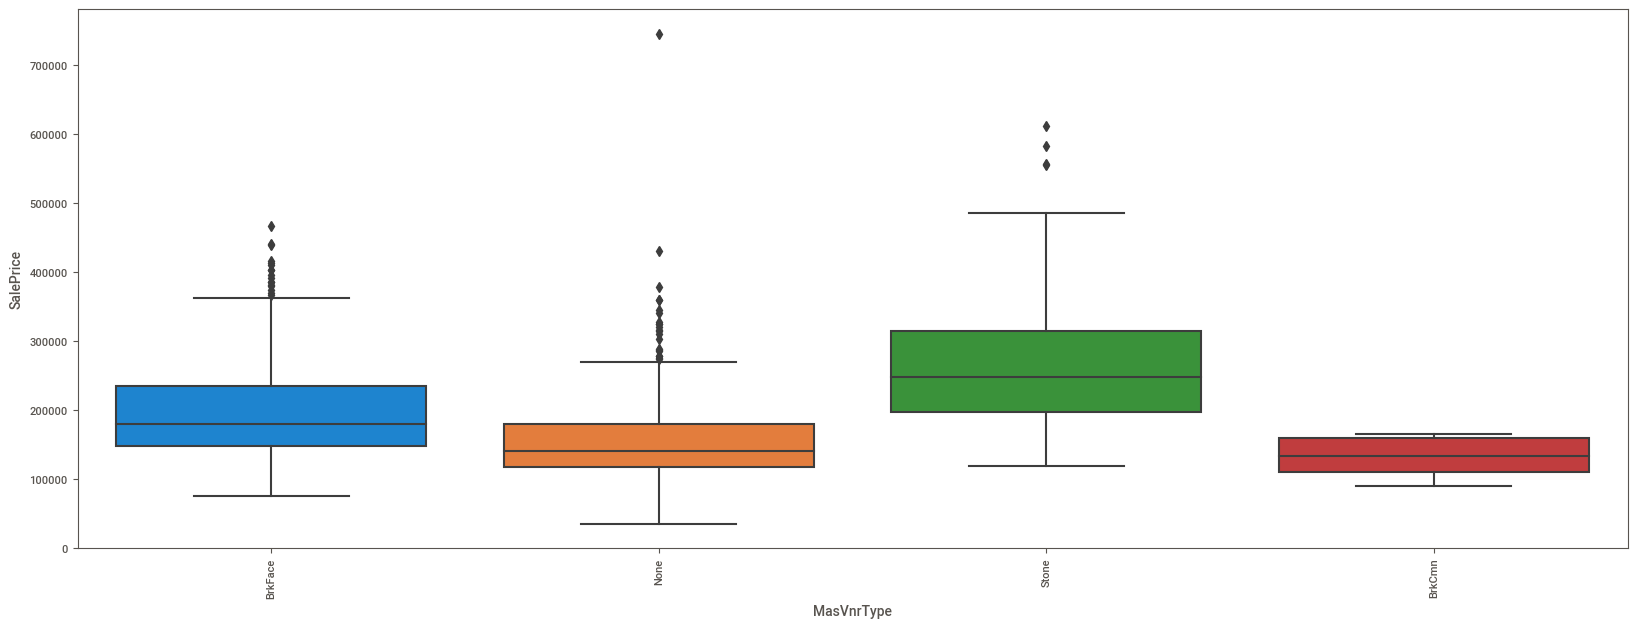

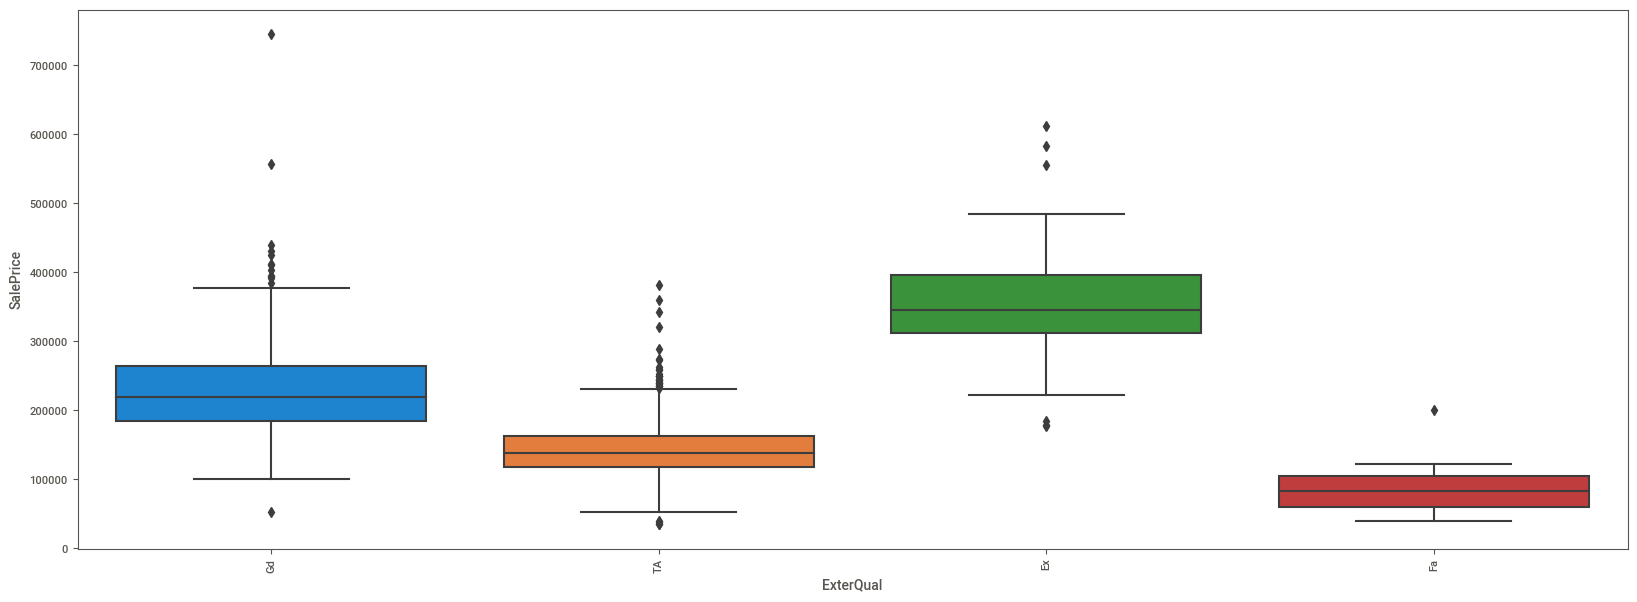

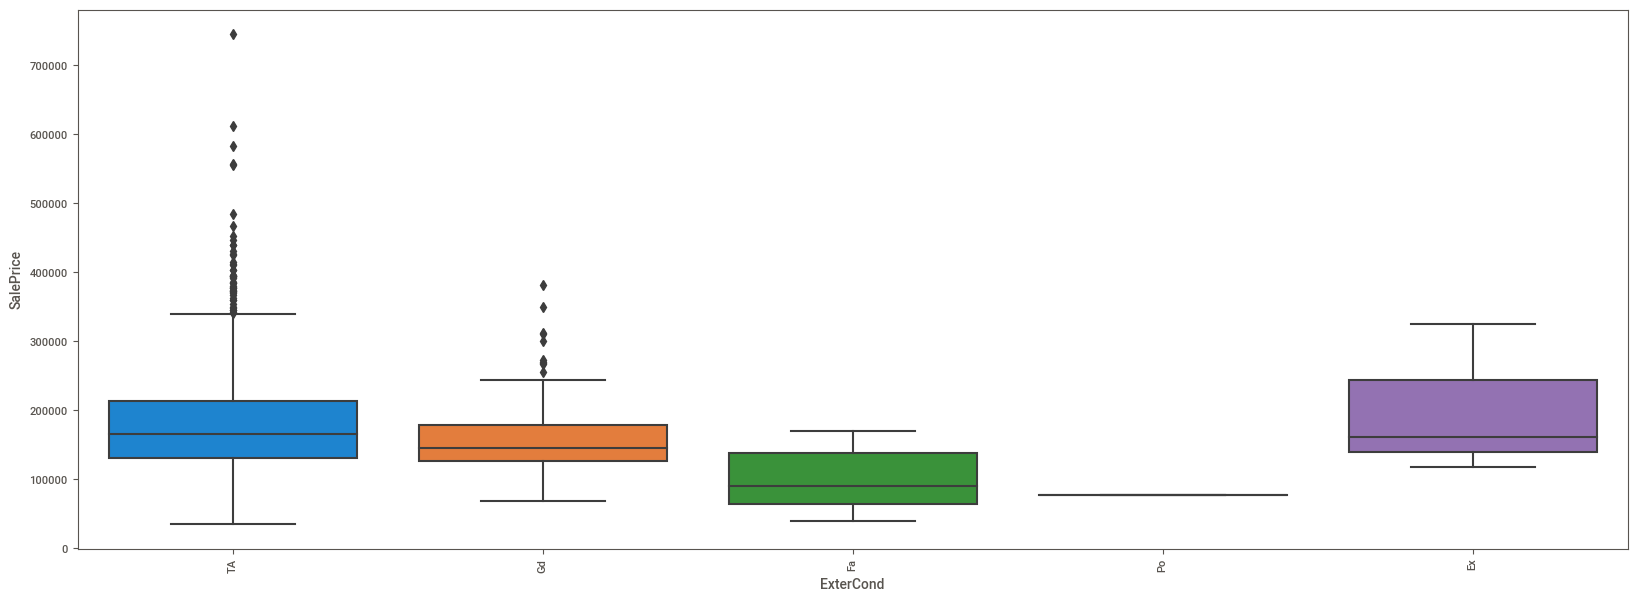

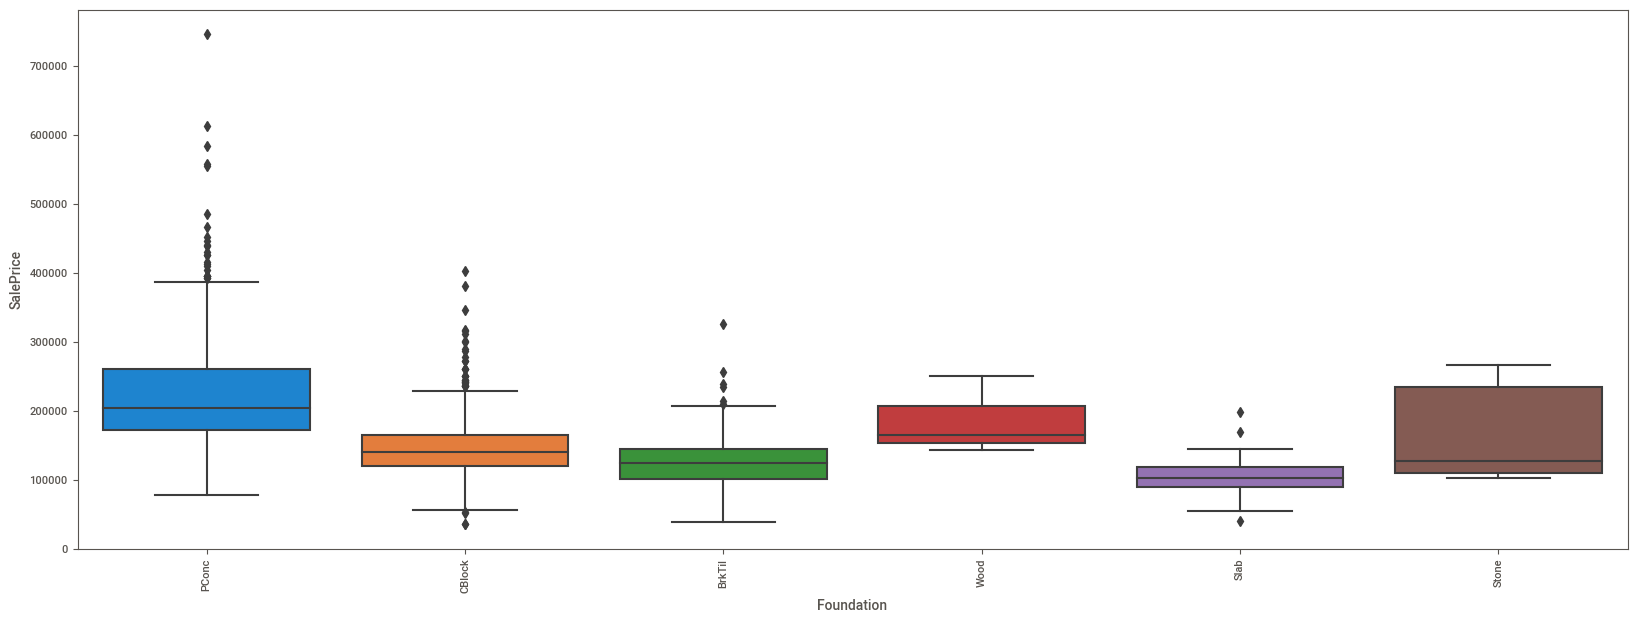

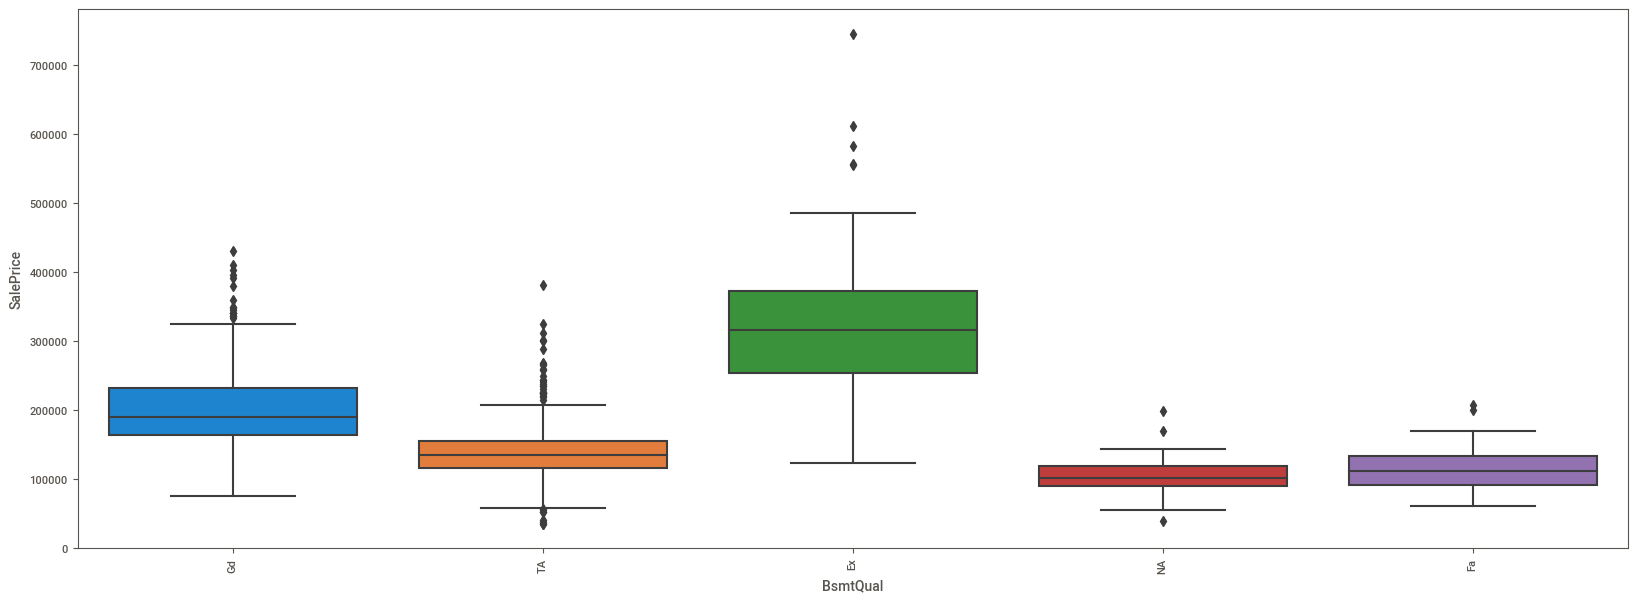

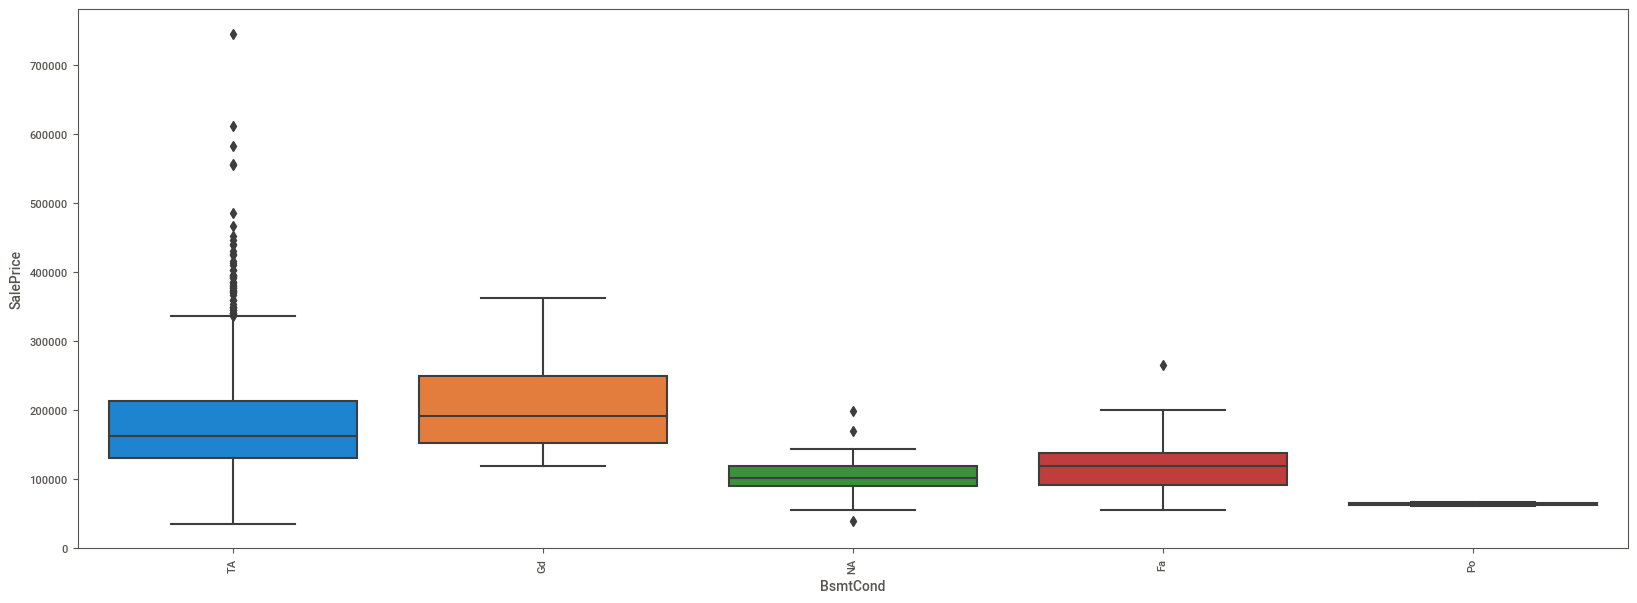

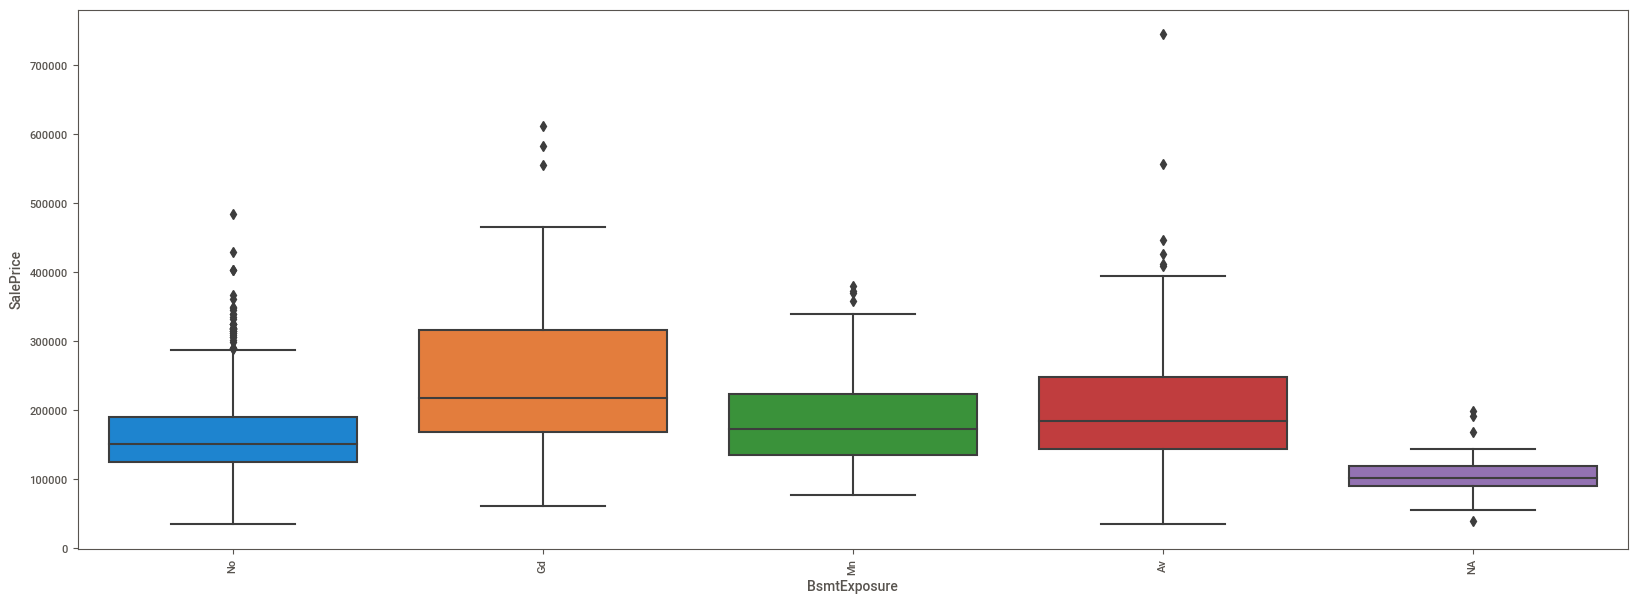

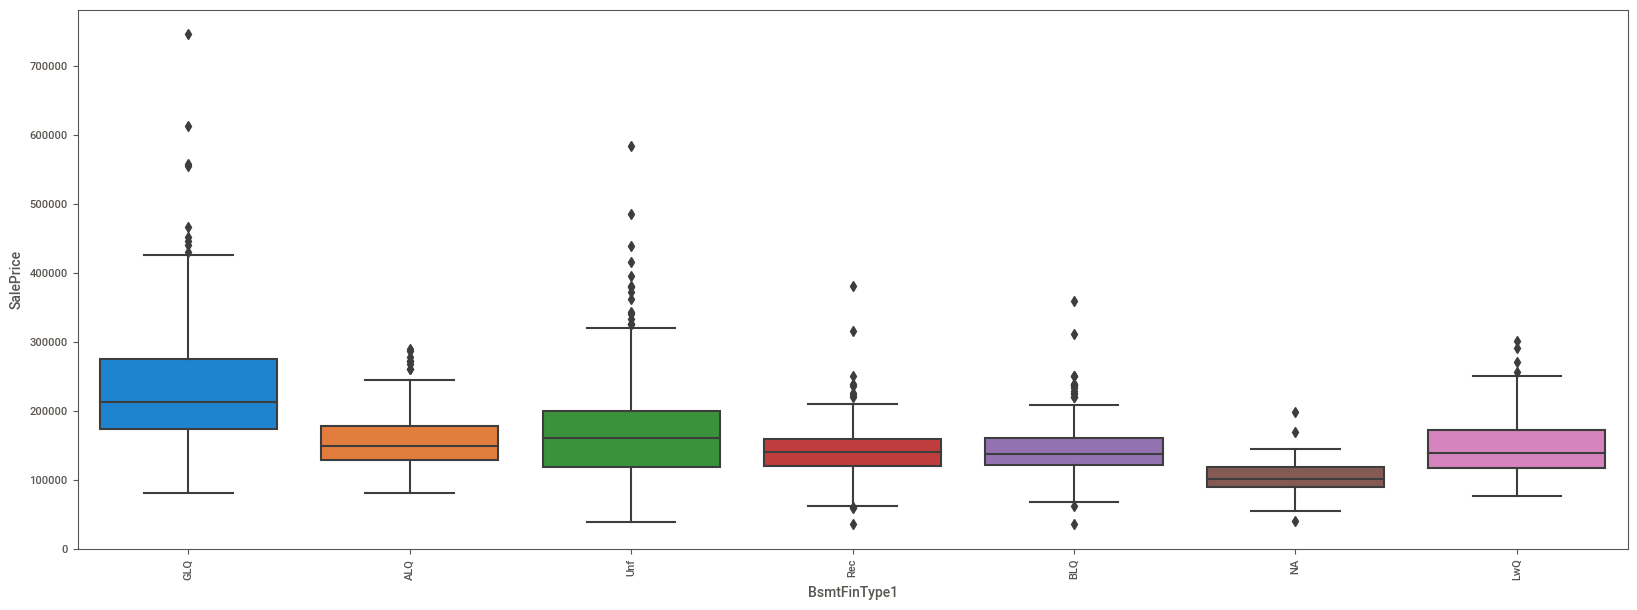

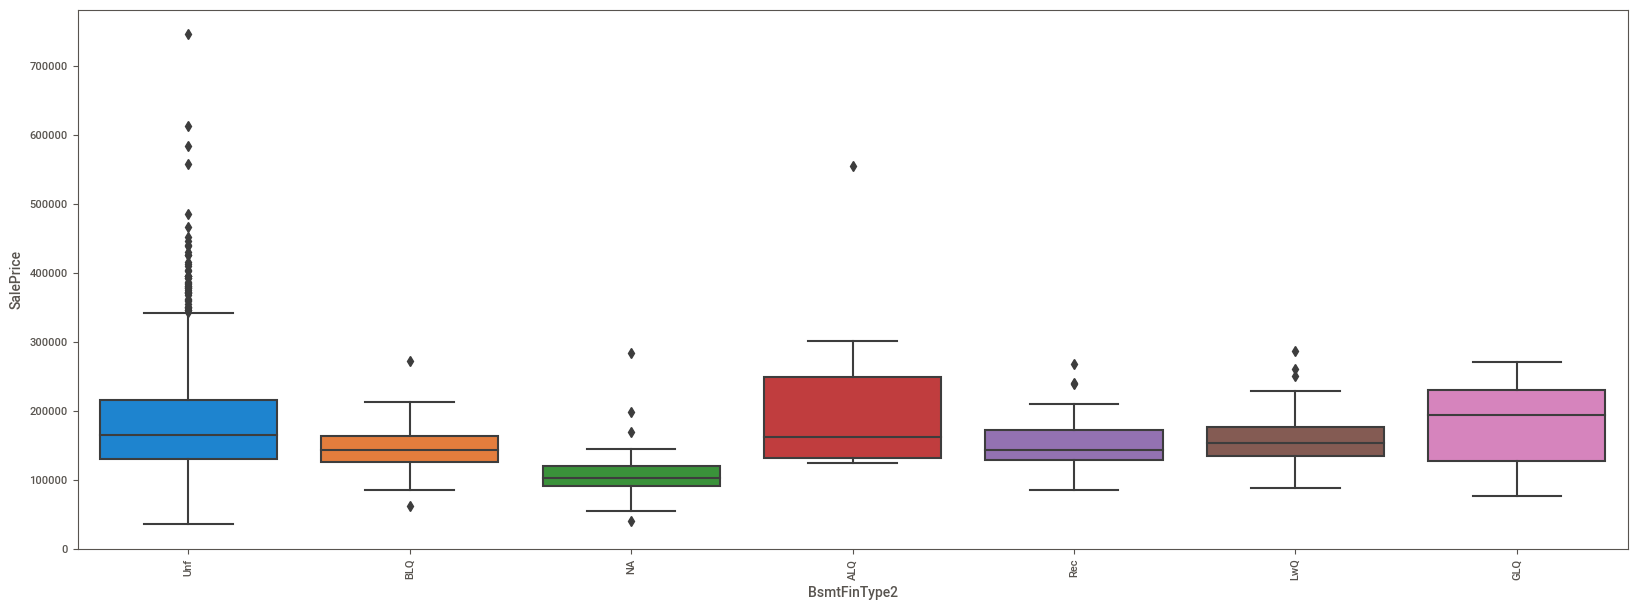

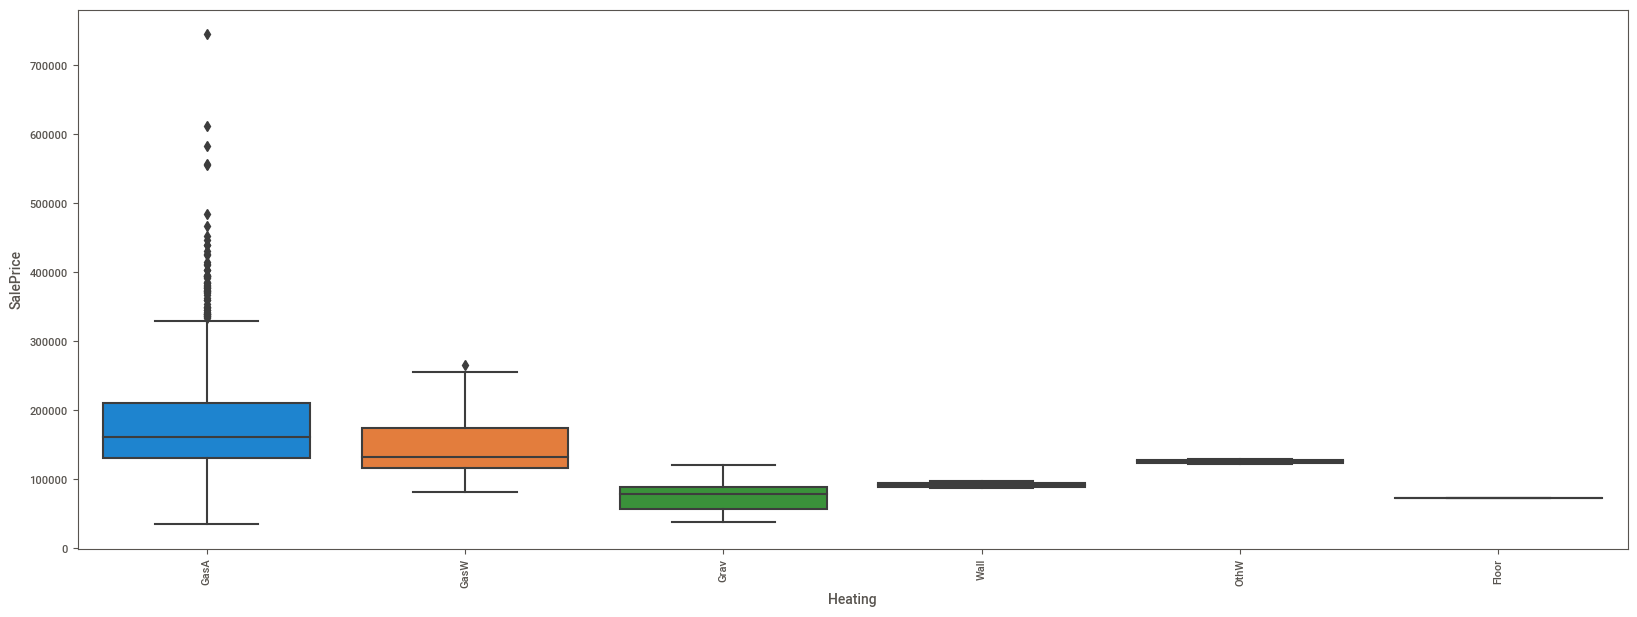

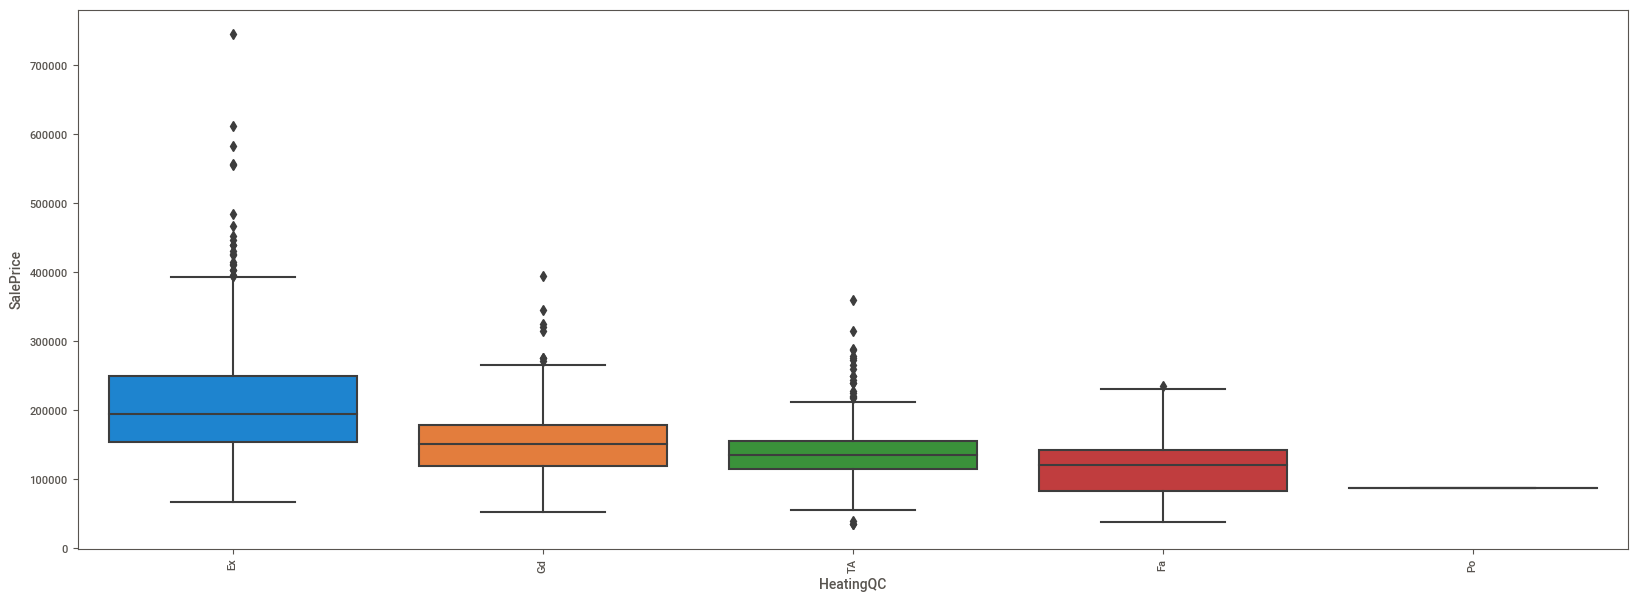

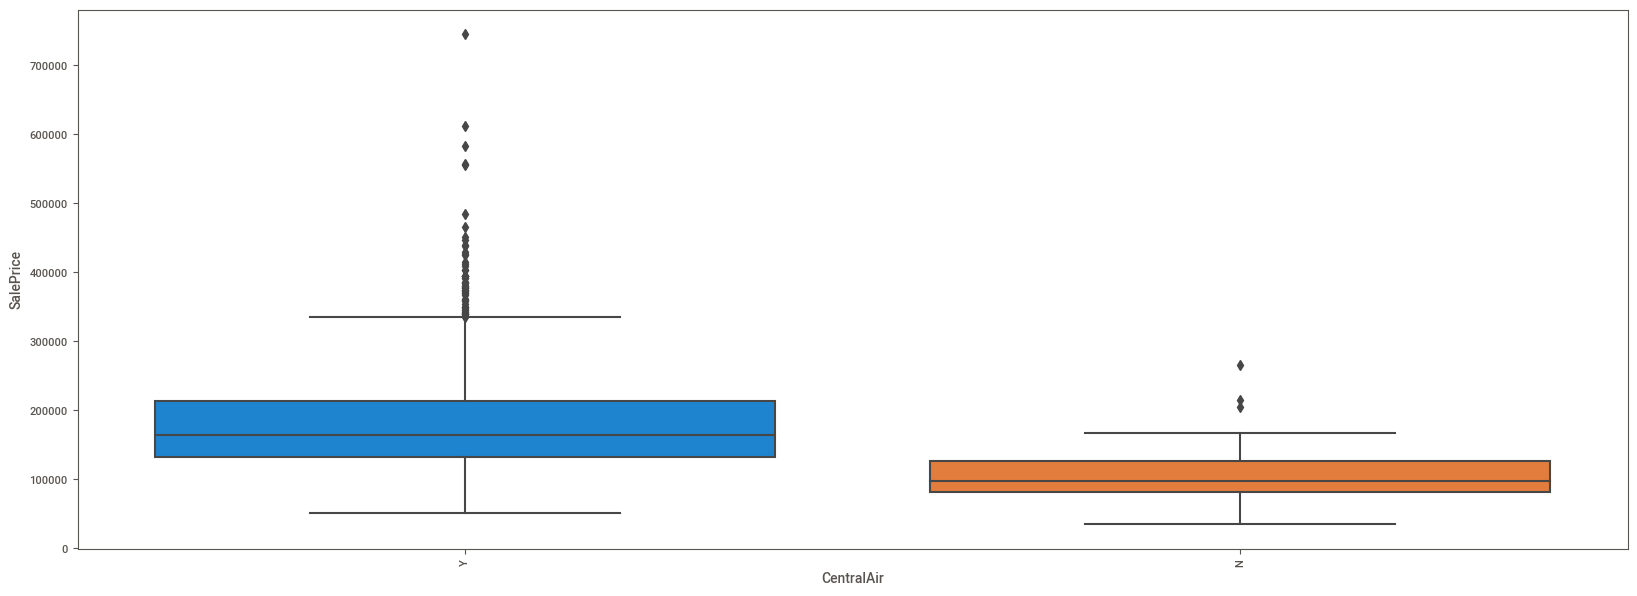

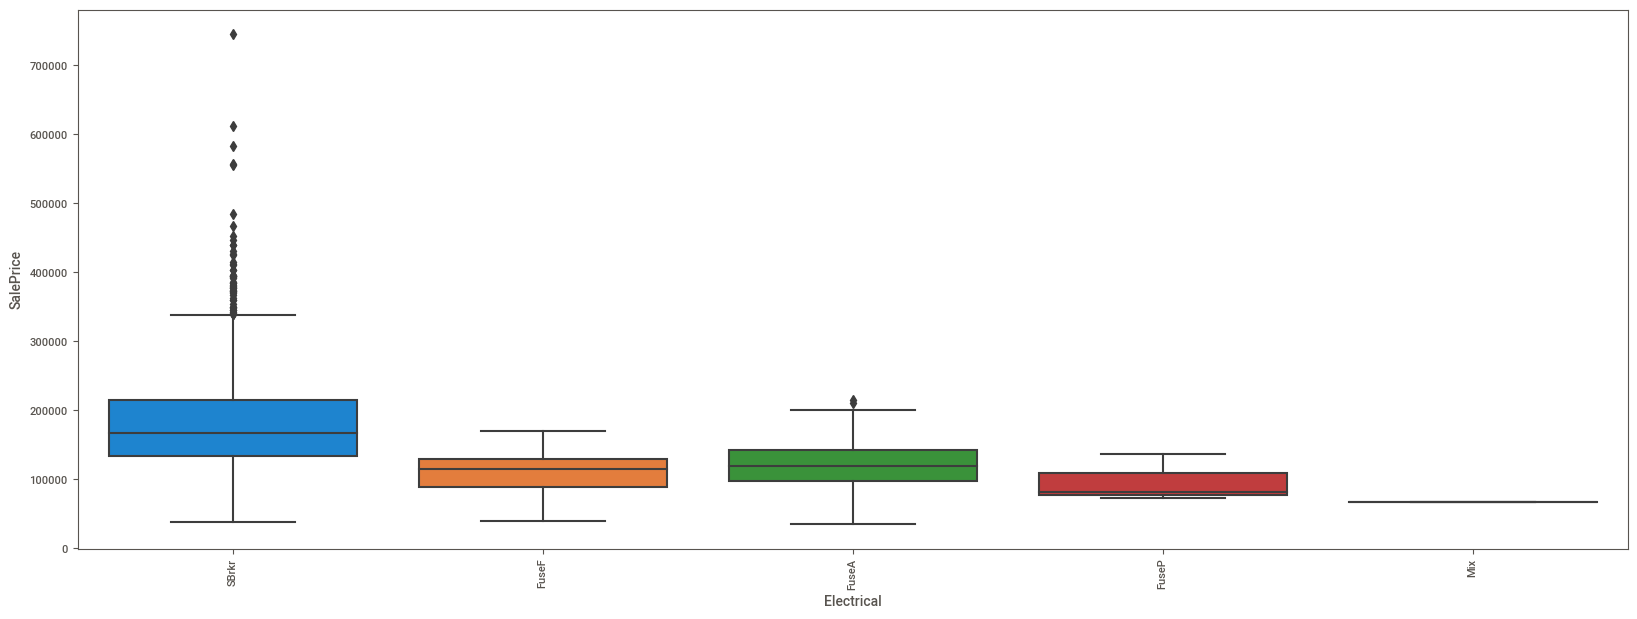

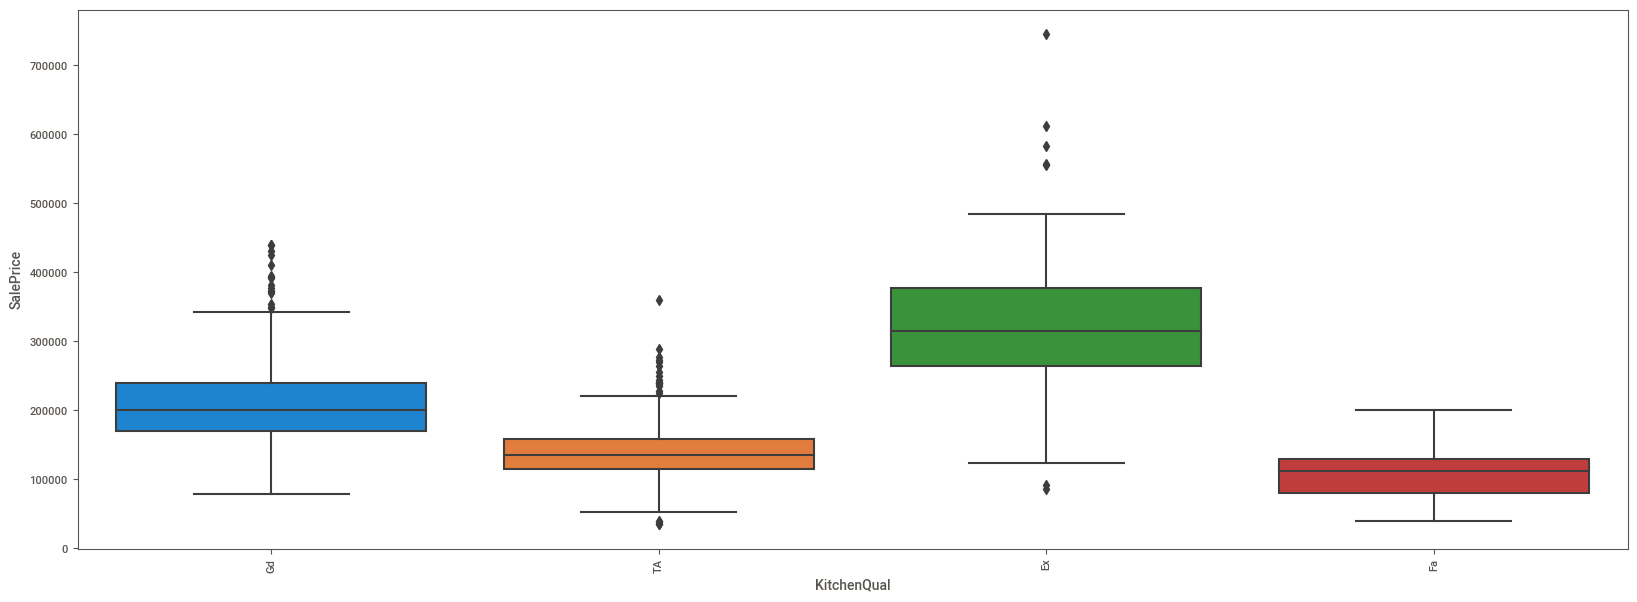

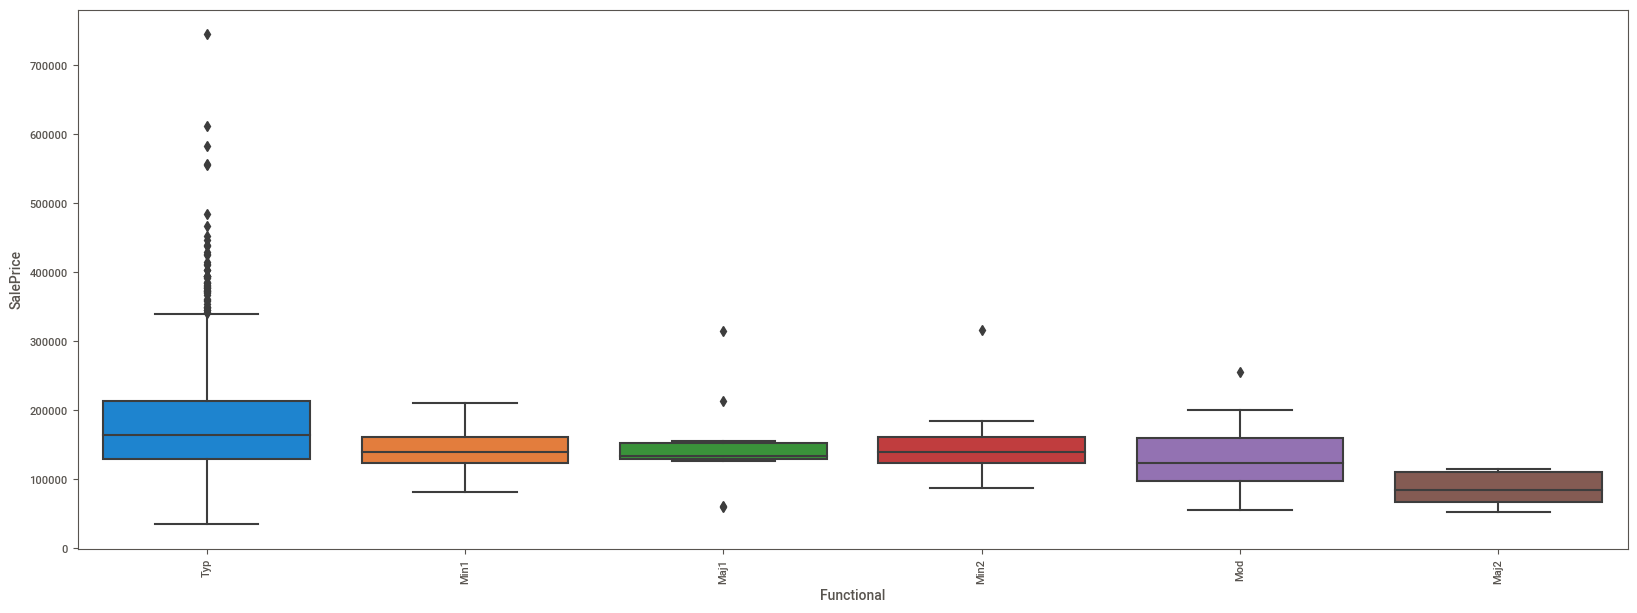

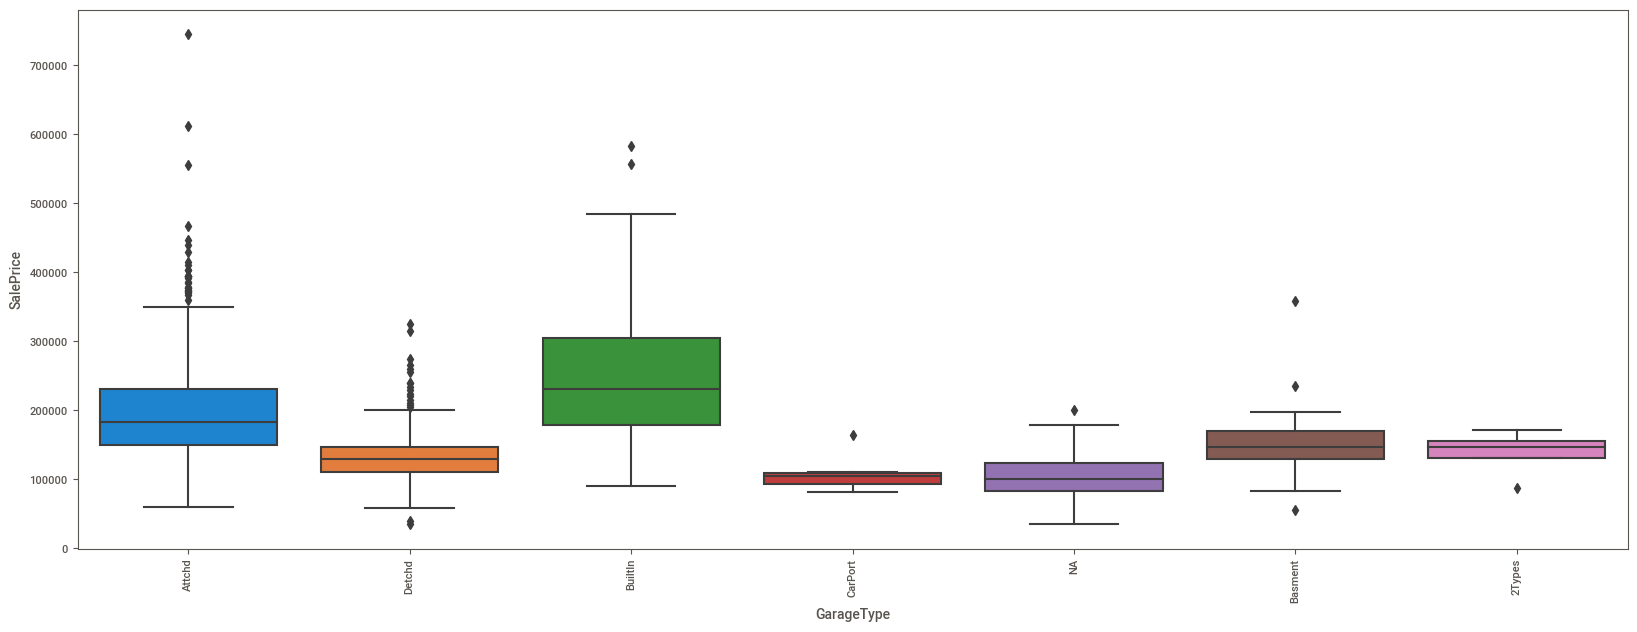

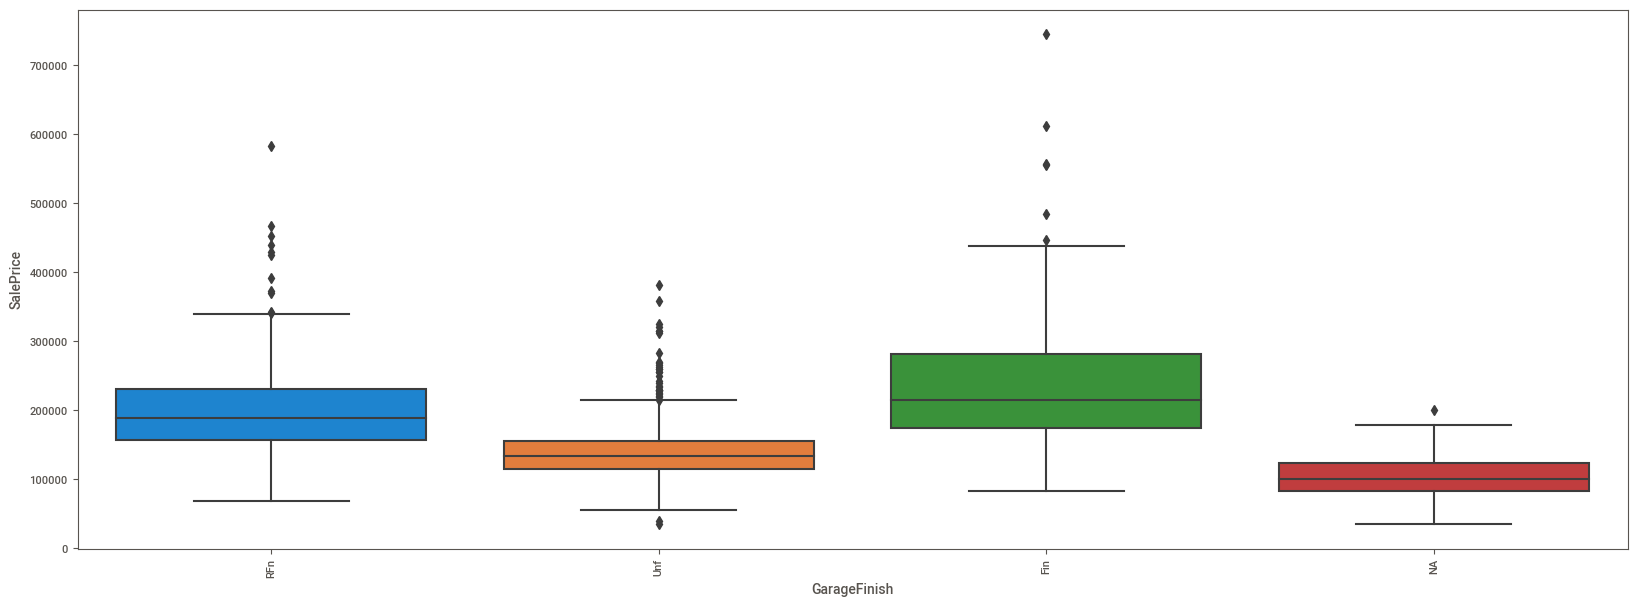

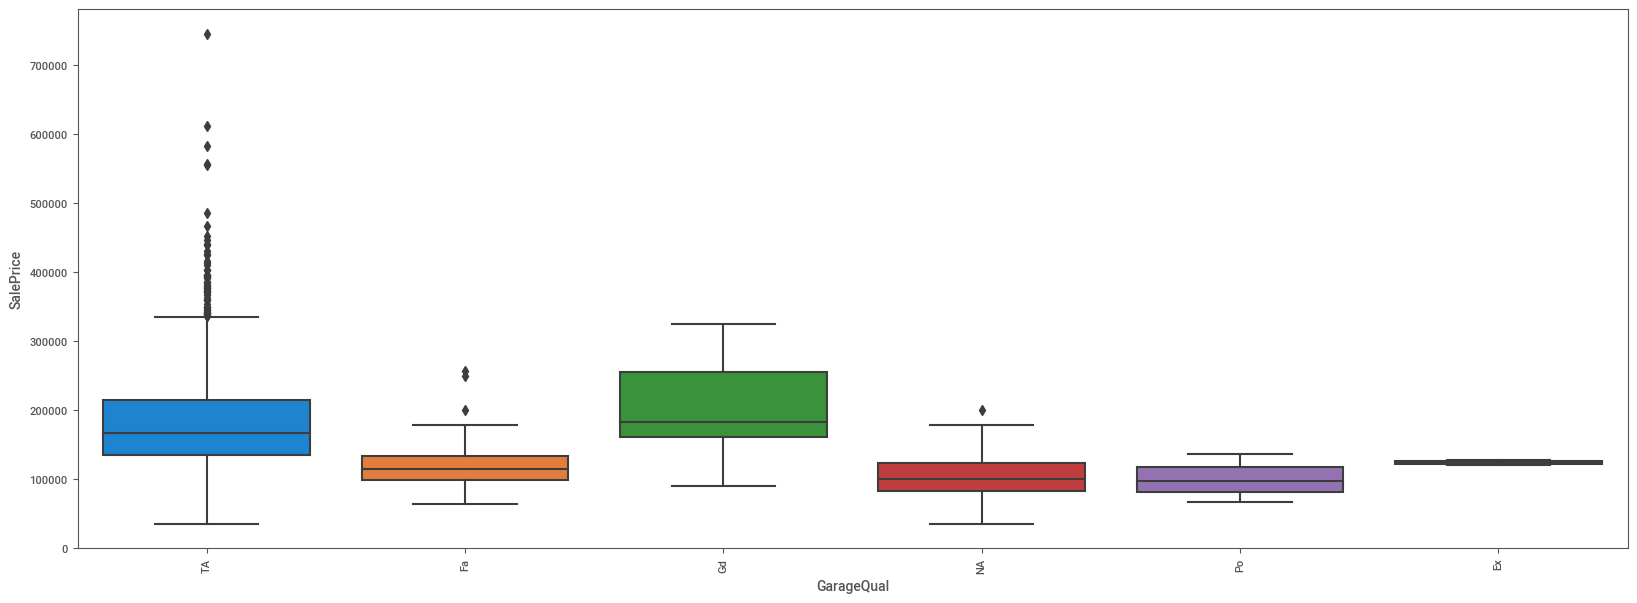

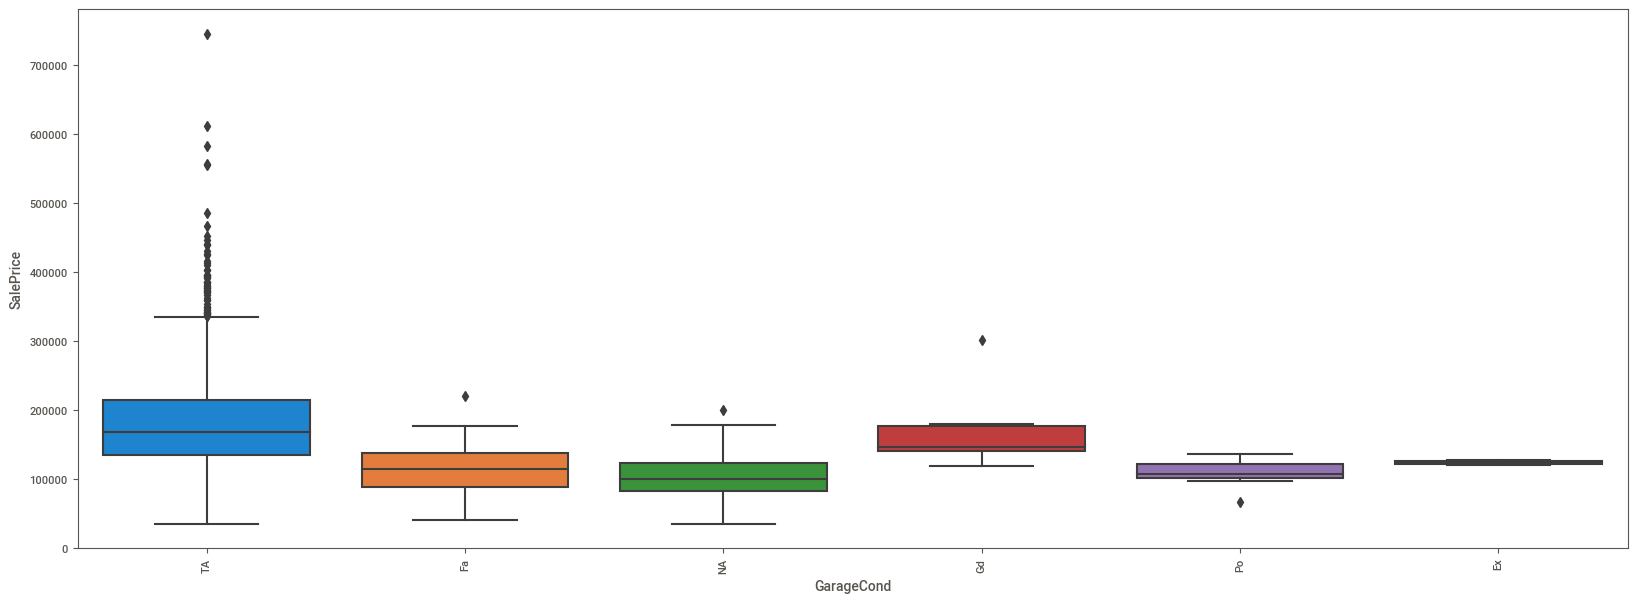

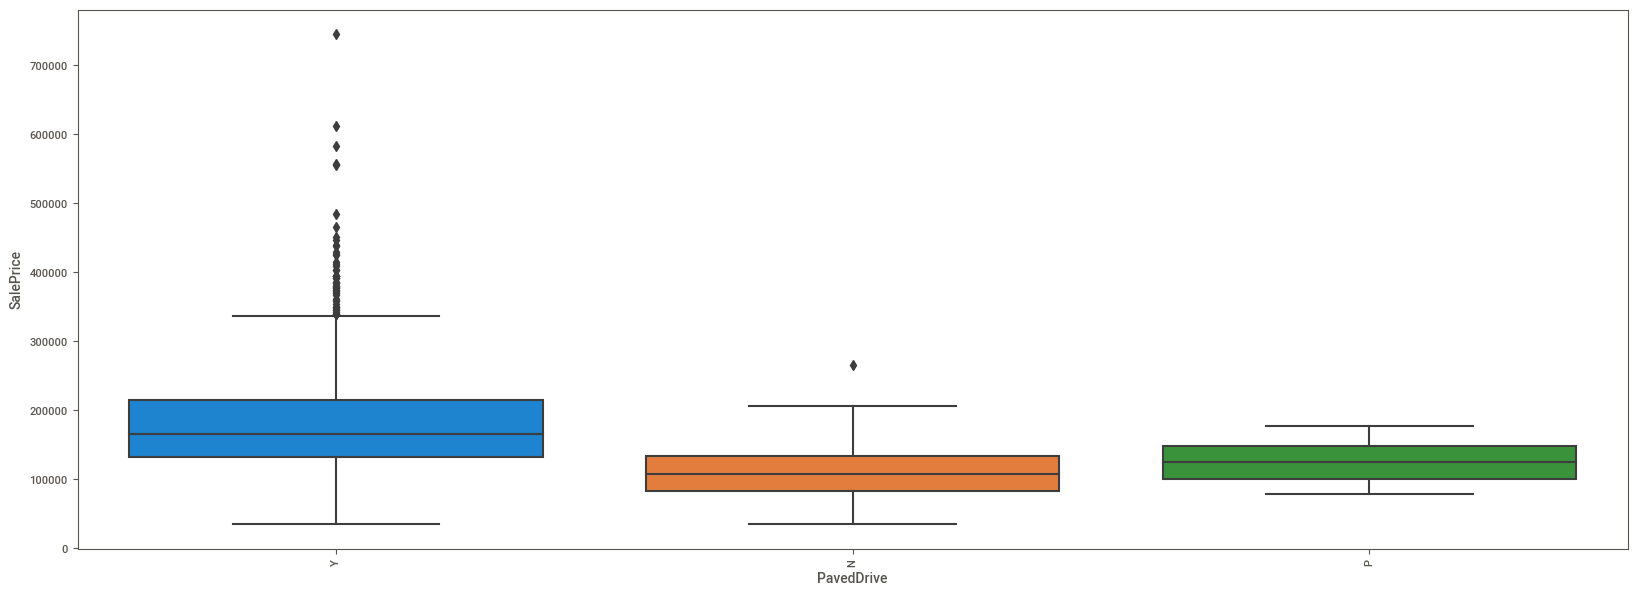

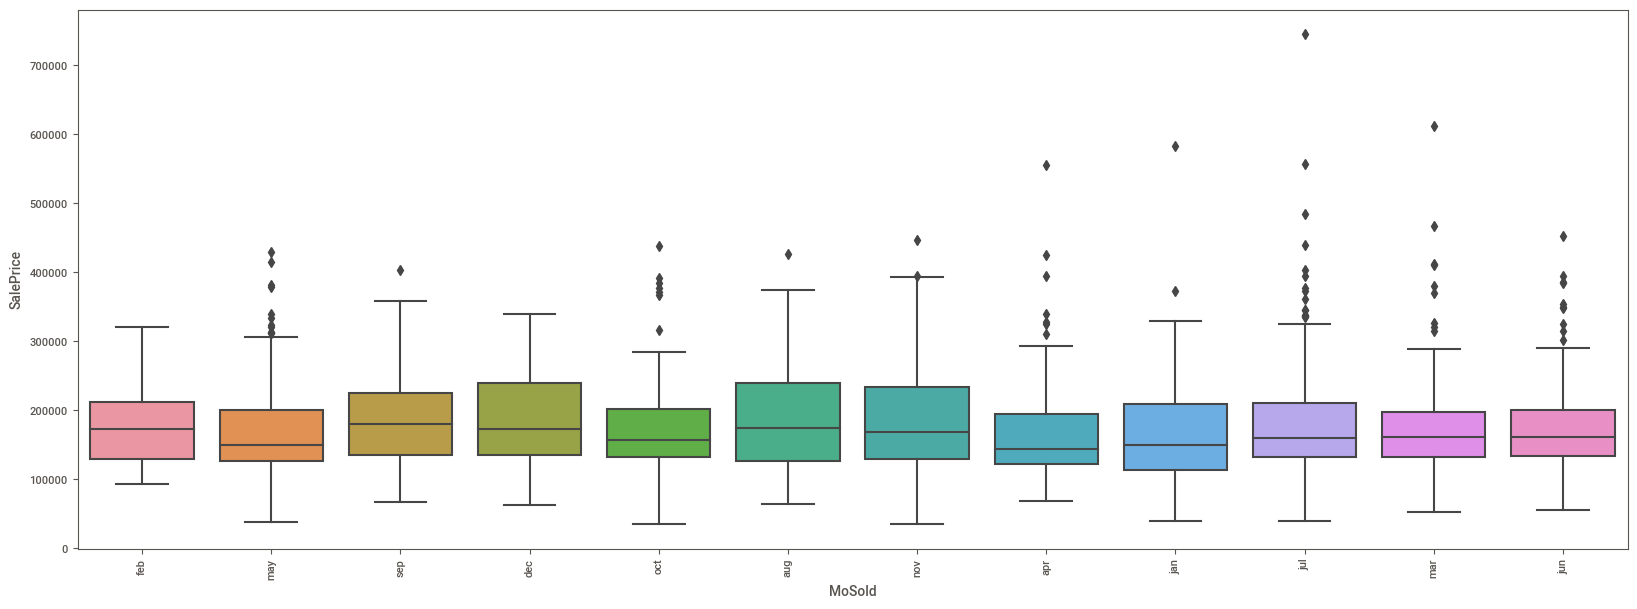

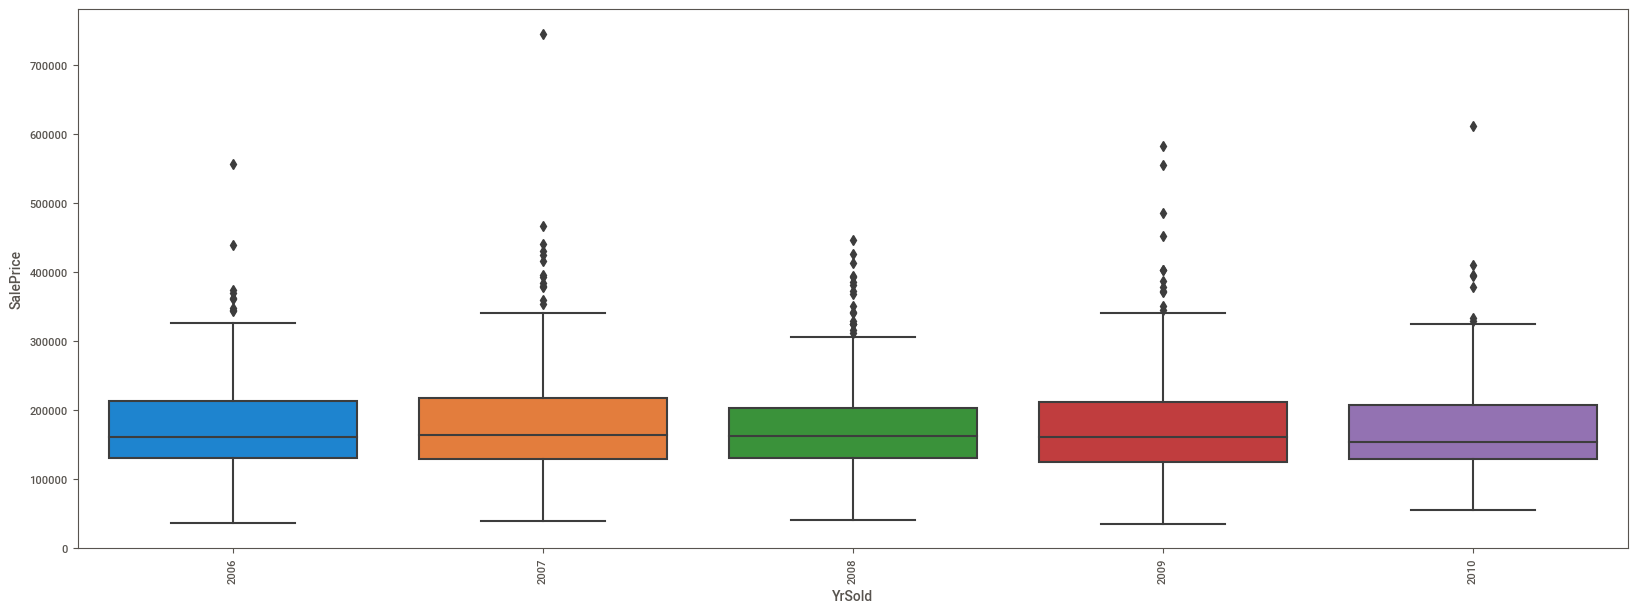

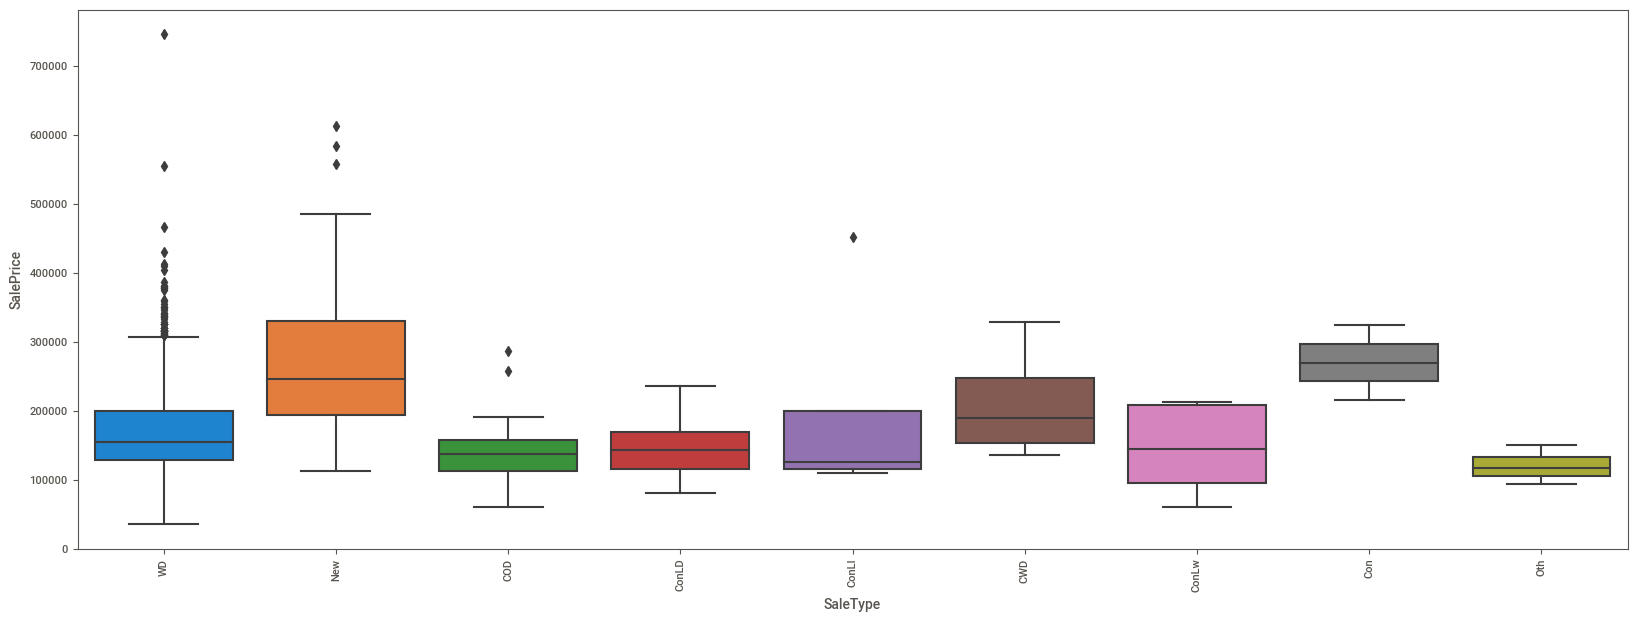

In [37]:
#boxplots
bx_plt(pd.concat([df_house[cat_cols], df_house['SalePrice']], axis= 1),'SalePrice')

_**Notes:**_
* In MSSubClass "2-STORY 1946 & NEVER" and "1-STORY PUD(Planned and Development) 1946 & NEWER" seems to have higher price
* In Neighborhood - NoRidge, NridhHt, StoneBr, Timber have higer prices
* Overall quality - Very Exellent have higher price
* OverallCond - Average to Exellent have higer price
* Prices seems to go up with year
* Price is also have impact from Foundation, ExterCond, Bsmt features, KitchenQual, Garage features

## Step3: Data Preparation

In [38]:
#changing year columns back to int64 for Modelling
df_house[yr_cols] = df_house[yr_cols].astype('int64')

In [39]:
df_house.head()

MSSubClass MSZoning  LotArea Street LotShape  \
0             2-STORY 1946 & NEWER       RL     8450   Pave      Reg   
1  1-STORY 1946 & NEWER ALL STYLES       RL     9600   Pave      Reg   
2             2-STORY 1946 & NEWER       RL    11250   Pave      IR1   
3             2-STORY 1945 & OLDER       RL     9550   Pave      IR1   
4             2-STORY 1946 & NEWER       RL    14260   Pave      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle    OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           Good     Average       2003   
1       Norm     1Fam     1Story  Above Average   Very Good       1976   
2       Norm     1Fam     2Story           Good     Average       2001   
3       Norm     1Fam     2Story           Good     Average       1915   
4       Norm     1Fam     2Story      Very Good     Average       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          Gd             6        Typ           1     Attchd   
3             1          Gd             7        Typ           1     D

In [40]:
df_house.shape

(1379, 73)

### Encoding Y/N columns

In [41]:
df_house[yn_cols] = df_house[yn_cols].applymap(lambda x : 1 if ( x and (x.lower() == 'yes' or x[0].lower() == 'y')) else 0)

### Creating dummy variables

In [42]:
cat_cols = df_house.select_dtypes(include = categoricals).columns

In [43]:
#removing Y/N columns from list of Dummy Cols list
cat_col_dummy = [col for col in cat_cols if col not in yn_cols]

In [44]:
df_dummies = pd.get_dummies(df_house[cat_col_dummy], drop_first=True)

In [45]:
df_dummies.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                                 0   
1                                                                 0   
2                                                                 0   
3                                                                 0   
4                                                                 0   

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   MSSubClass_DUPLEX - ALL STYLES AND AGES  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  MSSubClass_SPLIT FOYER  \
0                                                   0                       0   
1                                                   0                       0   
2                                                   0                       0   
3                                                   0                       0   
4                                                   0                       0   

   MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0                                0            0            0            1   
1                                0            0            0            1   
2                                0            0            0            1   
3                                0            0            0            1   
4                                0            0            0            1   

   MSZoning_RM  Stree

In [46]:
print('data shape: '+ str(df_house.shape))
print('dummy shape: ' + str(df_dummies.shape))
print('category cols to drop: ' + str(len(cat_col_dummy)))
print('total cols after merging and dropping should be: ' + str(df_house.shape[1] + df_dummies.shape[1] - len(cat_col_dummy)))
print('total rows after merging and dropping should be: ' + str(df_house.shape[0]))

data shape: (1379, 73)
dummy shape: (1379, 240)
category cols to drop: 41
total cols after merging and dropping should be: 272
total rows after merging and dropping should be: 1379


In [47]:
#merge dummies and drop categorical cols
df_house = pd.concat([df_house, df_dummies], axis = 1).drop(cat_col_dummy, axis = 1)

In [48]:
df_house.shape

(1379, 272)

### Spliting into Test-Train Set

In [49]:
df_train, df_test = train_test_split(df_house, train_size = 0.7, random_state = 100)

In [50]:
print(df_house.shape)
print(df_train.shape)
print(df_test.shape)

(1379, 272)
(965, 272)
(414, 272)


### Scale Numerical Data

In [51]:
num_cols = df_house.select_dtypes(include = numerics).columns
num_cols_scale = [col for col in num_cols if col not in yr_cols]
num_cols_scale

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [52]:
scaler = MinMaxScaler()

In [53]:
df_train[num_cols_scale] = scaler.fit_transform(df_train[num_cols_scale])

In [54]:
df_train[num_cols_scale].describe()

LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  \
count  965.000000  965.000000  965.000000  965.000000  965.000000   
mean     0.496801    0.061339    0.194277    0.040596    0.241696   
std      0.197887    0.110068    0.193686    0.138122    0.189756   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.379468    0.000000    0.000000    0.000000    0.096318   
50%      0.502042    0.000000    0.168190    0.000000    0.201199   
75%      0.615694    0.092500    0.317642    0.000000    0.342038   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       TotalBsmtSF  CentralAir    1stFlrSF    2ndFlrSF  LowQualFinSF  \
count   965.000000  965.000000  965.000000  965.000000    965.000000   
mean      0.322967    0.930570    0.278089    0.158970      0.009252   
std       0.128480    0.254316    0.127167    0.203223      0.083440   
min       0.000000    0.000000    0.000000    0.000000      0.000000   
25%       0.244541    1.000000    0.183829    0.000000      0.000000   
50%       0.302558    1.000000    0.255010    0.000000      0.000000   
75%       0.392389    1.000000    0.348307    0.343341      0.000000   
max       1.000000    1.000000    1.000000    1.000000      1.000000   

        GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  \
count  965.000000    965.000000    965.000000  965.000000  965.000000   
mean     0.274734      0.138169      0.030570    0.513299    0.184974   
std      0.117364      0.169817      0.124108    0.183994    0.250998   
min      0.000000      0.000000      0.000000    0.000000    0.000000   
25%      0.188073      0.000000      0.000000    0.333333    0.000000   
50%      0.264365      0.000000      0.000000    0.666667    0.000000   
75%      0.337518      0.333333      0.000000    0.666667    0.500000   
max      1.000000      1.000000      1.000000    1.000000    1.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
count    965.000000    965.000000    965.000000  965.000000  965.000000   
mean       0.354016      0.521244      0.366839    0.197582    0.430311   
std        0.103179      0.103439      0.130387    0.212818    0.187805   
min        0.000000      0.000000      0.000000    0.000000    0.000000   
25%        0.250000      0.500000      0.250000    0.000000    0.250000   
50%        0.375000      0.500000      0.333333    0.333333    0.500000   
75%        0.375000      0.500000      0.416667    0.333333    0.500000   
max        1.000000      1.000000      1.000000    1.000000    1.000000   

       GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count  965.000000  965.000000   965.000000     965.000000  965.000000   
mean     0.330662    0.133534     0.080736       0.074445    0.005428   
std      0.151349    0.177557     0.118434       0.192298    0.052739   
min      0.000000    0.000000     0.000000       0.000000    0.000000   
25%      0.224460    0.000000     0.000000       0.000000    0.000000   
50%      0.333094    0.000000     0.038391       0.000000    0.000000   
75%      0.414388    0.248503     0.117002       0.000000    0.000000   
max      1.000000    1.000000     1.000000       1.000000    1.000000   

       ScreenPorch    PoolArea     MiscVal   SalePrice  
count   965.000000  965.000000  965.000000  965.000000  
mean      0.031628    0.003675    0.002807    0.197971  
std       0.117955    0.057183    0.034660    0.104180  
min       0.000000    0.000000    0.000000    0.000000  
25%       0.000000    0.000000    0.000000    0.132517  
50%       0.000000    0.000000    0.000000    0.176025  
75%       0.000000    0.000000    0.000000    0.239544  
max       1.000000    1.000000    1.000000    1.000000

In [55]:
df_test[num_cols_scale] = scaler.transform(df_test[num_cols_scale])

In [56]:
df_test[num_cols_scale].describe()

LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  \
count  414.000000  414.000000  414.000000  414.000000  414.000000   
mean     0.499175    0.066481    0.196661    0.032522    0.247722   
std      0.201028    0.102824    0.191071    0.126157    0.189592   
min      0.014199    0.000000    0.000000    0.000000    0.000000   
25%      0.392348    0.000000    0.000000    0.000000    0.104666   
50%      0.497864    0.000000    0.184415    0.000000    0.208904   
75%      0.632060    0.112187    0.317870    0.000000    0.346854   
max      0.995162    0.609375    0.807587    1.307897    0.828339   

       TotalBsmtSF  CentralAir    1stFlrSF    2ndFlrSF  LowQualFinSF  \
count   414.000000  414.000000  414.000000  414.000000    414.000000   
mean      0.326146    0.937198    0.282190    0.176083      0.010870   
std       0.125492    0.242900    0.120073    0.213633      0.087483   
min       0.000000    0.000000    0.051486    0.000000      0.000000   
25%       0.247349    1.000000    0.187284    0.000000      0.000000   
50%       0.312227    1.000000    0.258120    0.000000      0.000000   
75%       0.402137    1.000000    0.365498    0.365860      0.000000   
max       0.965066    1.000000    0.714582    0.690557      0.973485   

        GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  \
count  414.000000    414.000000    414.000000  414.000000  414.000000   
mean     0.286337      0.133655      0.021739    0.528986    0.198068   
std      0.117615      0.168425      0.102089    0.172317    0.249738   
min      0.044906      0.000000      0.000000    0.000000    0.000000   
25%      0.195558      0.000000      0.000000    0.333333    0.000000   
50%      0.273539      0.000000      0.000000    0.666667    0.000000   
75%      0.350133      0.333333      0.000000    0.666667    0.500000   
max      0.690488      0.666667      0.500000    1.000000    1.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
count    414.000000    414.000000    414.000000  414.000000  414.000000   
mean       0.365036      0.528986      0.385064    0.184380    0.451087   
std        0.094565      0.126913      0.134475    0.198414    0.187031   
min        0.000000      0.500000      0.083333    0.000000    0.000000   
25%        0.375000      0.500000      0.333333    0.000000    0.250000   
50%        0.375000      0.500000      0.333333    0.166667    0.500000   
75%        0.375000      0.500000      0.500000    0.333333    0.500000   
max        0.750000      1.500000      0.833333    0.666667    1.000000   

       GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count  414.000000  414.000000   414.000000     414.000000  414.000000   
mean     0.345079    0.140686     0.083406       0.045784    0.007356   
std      0.149990    0.182986     0.108098       0.147220    0.061535   
min      0.000000    0.000000     0.000000       0.000000    0.000000   
25%      0.224460    0.000000     0.000000       0.000000    0.000000   
50%      0.348201    0.000000     0.051188       0.000000    0.000000   
75%      0.414928    0.251497     0.127971       0.000000    0.000000   
max      0.757554    1.101796     0.665448       1.169697    0.801181   

       ScreenPorch  PoolArea     MiscVal   SalePrice  
count   414.000000     414.0  414.000000  414.000000  
mean      0.027375       0.0    0.001784    0.206817  
std       0.101930       0.0    0.010794    0.108925  
min       0.000000       0.0    0.000000    0.007182  
25%       0.000000       0.0    0.000000    0.132517  
50%       0.000000       0.0    0.000000    0.177229  
75%       0.000000       0.0    0.000000    0.259259  
max       0.670833       0.0    0.129032    0.732432

## Step4: Build Model

In [57]:
#split predictive and target variables
y_train = df_train.pop("SalePrice")
X_train = df_train

In [58]:
print(y_train.shape)
display(y_train.head())
print(X_train.shape)
display(X_train.head())

(965,)


1265    0.209830
280     0.272638
193     0.133925
107     0.112801
1234    0.133925
Name: SalePrice, dtype: float64

(965, 271)


LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
1265  0.152981       1999          1999     0.13625    0.205667    0.000000   
280   0.627442       1989          1989     0.21250    0.192413    0.000000   
193   0.076773       2004          2004     0.03125    0.000000    0.000000   
107   0.295282       1948          1950     0.00000    0.047532    0.149956   
1234  0.453917       1911          1950     0.00000    0.000000    0.000000   

      BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1265   0.103168     0.215533         1.0  0.130961  0.357869           0.0   
280    0.165240     0.251716         1.0  0.290601  0.390799           0.0   
193    0.415240     0.302558         1.0  0.219765  0.357869           0.0   
107    0.220890     0.246101         1.0  0.157222  0.000000           0.0   
1234   0.402397     0.293200         0.0  0.238424  0.455206           0.0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1265   0.269918      0.333333           0.0  0.666667       0.5         0.375   
280    0.397875      0.000000           0.0  0.666667       0.5         0.375   
193    0.331965      0.000000           0.0  0.666667       0.0         0.375   
107    0.109850      0.000000           0.0  0.333333       0.0         0.250   
1234   0.393530      0.000000           0.0  0.333333       0.5         0.500   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
1265           0.5      0.333333    0.000000        0.50    0.364029   
280            0.5      0.416667    0.333333        0.50    0.413669   
193            0.5      0.416667    0.000000        0.50    0.273381   
107            0.5      0.250000    0.000000        0.25    0.179856   
1234           0.5      0.416667    0.000000        0.00    0.000000   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1265         0.0     0.062157            0.0   0.000000          0.0   
280          0.0     0.153565            0.0   0.385827          0.0   
193          0.0     0.073126            0.0   0.000000          0.0   
107          0.0     0.000000            0.0   0.000000          0.0   
1234         0.0     0.351005            0.0   0.000000          0.0   

      PoolArea  MiscVal  YrSold  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
1265       0.0      0.0    2006                                         0   
280        0.0      0.0    2007                                         0   
193        0.0      0.0    2006                                         0   
107        0.0      0.0    2008                                         0   
1234       0.0      0.0    2008                                         0   

      MSSubClass_1-STORY 1945 & OLDER  \
1265                                0   
280                                 0   
193                                 0   
107                                 0   
1234                                0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
1265                                           0   
280                                            0   
193                                            0   
107                                            1   
1234                                           0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
1265                                                                 0   
280                                                                  0   
193                                                                  0   
107                                                                  0   
1234                                                                 0   

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
1265                                             0   
280                                              0   
193                                              0   
107                       

In [59]:
y_test = df_test.pop("SalePrice")
X_test = df_test

In [60]:
print(y_test.shape)
display(y_test.head())
print(X_test.shape)
display(X_test.head())

(414,)


270     0.325447
30      0.007182
667     0.223349
619     0.380369
1122    0.108576
Name: SalePrice, dtype: float64

(414, 271)


LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
270   0.592323       2006          2006     0.00000     0.00000         0.0   
30    0.452347       1920          1950     0.00000     0.00000         0.0   
667   0.428787       1994          1998     0.16125     0.52011         0.0   
619   0.687567       2003          2003     0.14125     0.39808         0.0   
1122  0.479110       1956          1956     0.00000     0.00000         0.0   

      BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  \
270    0.468750     0.341547         1.0  0.262958  0.408717           0.0   
30     0.277825     0.202433         0.0  0.108846  0.323487           0.0   
667    0.115582     0.439177         1.0  0.464755  0.000000           0.0   
619    0.261558     0.462258         1.0  0.396683  0.377724           0.0   
1122   0.287671     0.209607         1.0  0.216310  0.000000           0.0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
270    0.387494      0.000000           0.0  0.666667       0.5         0.375   
30     0.237325      0.000000           0.0  0.333333       0.0         0.375   
667    0.324722      0.333333           0.0  0.666667       0.0         0.375   
619    0.465476      0.333333           0.0  0.666667       0.5         0.500   
1122   0.151135      0.000000           0.0  0.333333       0.0         0.375   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
270            0.5      0.500000    0.333333        0.75    0.757554   
30             0.5      0.333333    0.000000        0.25    0.179856   
667            0.5      0.416667    0.333333        0.50    0.413669   
619            0.5      0.666667    0.666667        0.75    0.538849   
1122           0.5      0.250000    0.000000        0.25    0.207194   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
270     0.287425     0.093236       0.000000        0.0     0.000000   
30      0.000000     0.098720       0.521212        0.0     0.000000   
667     0.335329     0.076782       0.000000        0.0     0.000000   
619     0.251497     0.000000       0.000000        0.0     0.000000   
1122    0.095808     0.000000       0.000000        0.0     0.333333   

      PoolArea  MiscVal  YrSold  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
270        0.0      0.0    2006                                         0   
30         0.0      0.0    2008                                         0   
667        0.0      0.0    2008                                         0   
619        0.0      0.0    2008                                         0   
1122       0.0      0.0    2009                                         0   

      MSSubClass_1-STORY 1945 & OLDER  \
270                                 0   
30                                  0   
667                                 0   
619                                 0   
1122                                0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
270                                            0   
30                                             0   
667                                            1   
619                                            0   
1122                                           1   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
270                                                                  0   
30                                                                   0   
667                                                                  0   
619                                                                  0   
1122                                                                 0   

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
270                                              0   
30                                               0   
667                                              0   
619                       

In [61]:
#Create Metrics Dataframe
metric_index = ["r2_score_train", "r2_score_test", "rss_train", "rss_test", "mse_train", "mse_test"]

In [62]:
df_metrics = pd.DataFrame(index = metric_index)

In [63]:
#create dataframe to store the coefficients
coef_df = pd.DataFrame(index = ['Constant'] + list(X_train.columns))


### Model1
* Linear Regression Model with all the features

In [64]:
#fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
print(lm.intercept_)
print(lm.coef_)

-3.419048980135986
[ 3.41089278e-02  5.63146960e-04  1.09559916e-04  1.97959071e-02
  7.39384448e-02  1.73230224e-02  3.07629131e-02  7.89652303e-02
 -3.19103366e-03  9.12571340e-02  1.12022921e-01  2.75905859e-02
  1.23127307e-01  1.12609357e-02 -3.16674714e-03  3.57731229e-02
  1.51791296e-02 -5.23320221e-02  4.35261792e-03  2.13463065e-02
  1.12878061e-02  3.72476305e-02  6.27905511e-03 -3.78721026e-03
  1.56787697e-02  2.23590572e-03  5.54576064e-03  1.88238678e-02
  8.51517877e-02 -3.16696886e-03  1.02132909e-03 -8.09655469e-03
  1.77195179e-03 -4.16775962e-03 -2.96151497e-02  6.20381228e-03
 -4.02178404e-03 -6.96282124e-03  3.45113783e-03  2.20880071e-03
 -2.90319833e-02 -2.01837973e-02 -4.37625966e-02 -2.50379526e-02
 -2.61188253e-02  6.28208400e-02  4.99317666e-02  5.28422548e-02
  4.22261777e-02  2.11322602e-03 -2.47812448e-03  7.01431129e-03
  7.96903264e-04 -1.12754670e-02 -1.38899105e-02 -2.14393242e-03
 -3.02406635e-02  9.40882860e-03 -8.36842979e-03 -2.62110658e-02
  5.15

In [66]:
coef_df_model1 = pd.DataFrame(index = ['Constant'] + list(X_train.columns))

In [67]:
coef_df_model1['Model1_LinearRegression'] = [lm.intercept_] + list(lm.coef_)

In [68]:
coef_df = pd.concat([coef_df, coef_df_model1], axis = 1)

In [69]:
#predict and calculate metrics on train and test data
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [70]:
#calculating metrics for model1
metric_model1 = []
r2_train = r2_score(y_train, y_train_pred)
metric_model1.append(r2_train)

r2_test = r2_score(y_test, y_test_pred)
metric_model1.append(r2_test)

rss_train = np.sum(np.square(y_train - y_train_pred))
metric_model1.append(rss_train)

rss_test = np.sum(np.square(y_test - y_test_pred))
metric_model1.append(rss_test)

mse_train = mean_squared_error(y_train, y_train_pred)
metric_model1.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_test_pred)
metric_model1.append(mse_test**0.5)

In [71]:
df_metrics["Model1_LinearRegression"] = metric_model1

In [72]:
df_metrics

Model1_LinearRegression
r2_score_train                 0.951958
r2_score_test                  0.900242
rss_train                      0.502649
rss_test                       0.488821
mse_train                      0.022823
mse_test                       0.034362

In [73]:
# analysing error
res_test_model1 = y_test - y_test_pred

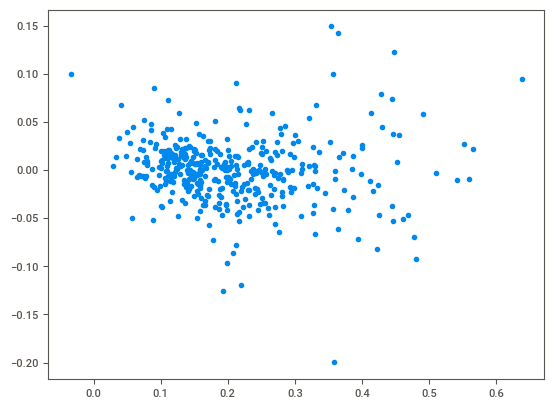

In [74]:
#plot residual vs pred
plt.scatter(y_test_pred, res_test_model1)
plt.show()

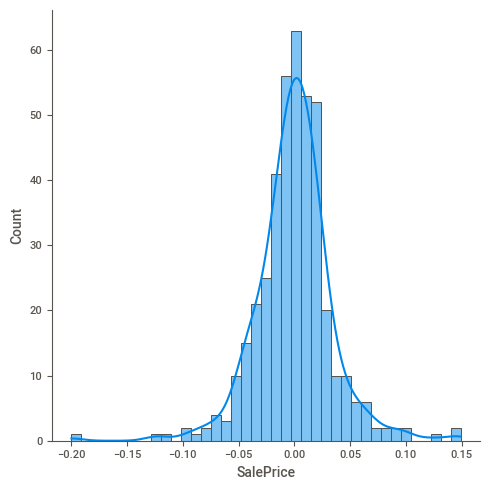

In [75]:
# distribution of error term
sns.displot(res_test_model1, kde=True)
plt.show()

_**Notes:**_
* The error term have mean at 0 and is normally distributed. So looks fine

### Model2
* Ridge regression with all the features

In [76]:
# create ridge model
ridge = Ridge()
# cross validation
model2_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model2_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
#get best alpha value
alpha_ridge_best = model2_cv.best_params_['alpha']
alpha_ridge_best

5.0

In [78]:
results_ridge = pd.DataFrame(model2_cv.cv_results_)

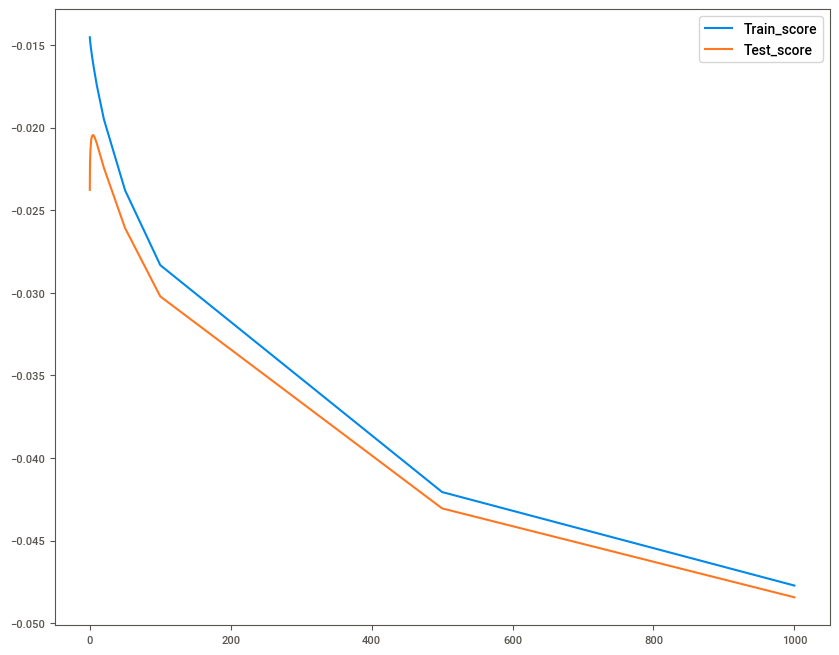

In [79]:
#Plot Mean Train and Test score against different alpha value
plt.figure(figsize = (10,8))
plt.plot(results_ridge.param_alpha, results_ridge.mean_train_score)
plt.plot(results_ridge.param_alpha, results_ridge.mean_test_score)
plt.legend(['Train_score', 'Test_score'])
plt.show()

In [80]:
#create ridge model with best alpha value 
ridge_model2 = Ridge(alpha = alpha_ridge_best)
ridge_model2.fit(X_train, y_train)

Ridge(alpha=5.0)

In [81]:
ridge_model2.intercept_

-2.8085039180922546

In [82]:
ridge_model2.coef_

array([ 3.37865990e-02,  4.61674343e-04,  1.99712496e-04,  2.02694066e-02,
        5.45796246e-02,  9.32231299e-03,  2.51519763e-02,  5.88526145e-02,
        3.07348678e-03,  6.84775561e-02,  5.46931154e-02,  3.06216753e-04,
        7.51513793e-02,  1.10668239e-02, -6.01692062e-03,  4.23489133e-02,
        2.04506832e-02, -1.04426889e-02, -6.87598284e-03,  3.50849977e-02,
        2.41427744e-02,  2.72933102e-02,  2.34018841e-02,  1.59938844e-03,
        1.52496336e-02,  1.38365495e-03,  6.66938902e-04,  1.34939907e-02,
        4.05880338e-02,  7.34254133e-04,  7.74287177e-04,  3.55228906e-03,
        3.92072818e-03,  3.90504723e-03, -8.06115450e-03,  5.61628747e-03,
       -5.46964290e-03,  2.28828870e-03,  7.83260318e-03,  7.70524041e-03,
       -9.34939883e-03, -9.60308026e-03, -4.18276803e-03, -6.12470328e-03,
       -2.98203243e-03,  1.31104649e-02,  4.26869290e-03,  8.84549659e-03,
       -4.21527389e-05,  4.93259366e-03, -1.29828236e-03,  9.31849377e-04,
       -1.10228560e-04, -

In [83]:
#appending to coef_df
coef_df_model2 = pd.DataFrame(index = ['Constant'] + list(X_train.columns))
coef_df_model2['Model2_Ridge_alpha_'+str(alpha_ridge_best)] = [ridge_model2.intercept_] + list(ridge_model2.coef_)
coef_df = pd.concat([coef_df, coef_df_model2], axis = 1)

In [84]:
coef_df

Model1_LinearRegression  \
Constant                                                                    -3.419049e+00   
LotArea                                                                      3.410893e-02   
YearBuilt                                                                    5.631470e-04   
YearRemodAdd                                                                 1.095599e-04   
MasVnrArea                                                                   1.979591e-02   
BsmtFinSF1                                                                   7.393844e-02   
BsmtFinSF2                                                                   1.732302e-02   
BsmtUnfSF                                                                    3.076291e-02   
TotalBsmtSF                                                                  7.896523e-02   
CentralAir                                                                  -3.191034e-03   
1stFlrSF                                                                     9.125713e-02   
2ndFlrSF                                                                     1.120229e-01   
LowQualFinSF                                                                 2.759059e-02   
GrLivArea                                                                    1.231273e-01   
BsmtFullBath                                                                 1.126094e-02   
BsmtHalfBath                                                                -3.166747e-03   
FullBath                                                                     3.577312e-02   
HalfBath                                                                     1.517913e-02   
BedroomAbvGr                                                                -5.233202e-02   
KitchenAbvGr                                                                 4.352618e-03   
TotRmsAbvGrd                                                                 2.134631e-02   
Fireplaces                                                                   1.128781e-02   
GarageCars                                                                   3.724763e-02   
GarageArea                                                                   6.279055e-03   
WoodDeckSF                                                                  -3.787210e-03   
OpenPorchSF                                                                  1.567877e-02   
EnclosedPorch                                                                2.235906e-03   
3SsnPorch                                                                    5.545761e-03   
ScreenPorch                                                                  1.882387e-02   
PoolArea                                                                     8.515179e-02   
MiscVal                                                                     -3.166969e-03   
YrSold                                                                       1.021329e-03   
MSSubClass_1-1/2 STORY FINISHED ALL AGES                                    -8.096555e-03   
MSSubClass_1-STORY 1945 & OLDER                                              1.771952e-03   
MSSubClass_1-STORY 1946 & NEWER ALL STYLES                                  -4.167760e-03   
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER            -2.961515e-02   
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES                                 6.203812e-03   
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                        -4.021784e-03   
MSSubClass_2-1/2 STORY ALL AGES                                             -6.962821e-03   
MSSubClass_2-STORY 1945 & OLDER                                              3.451138e-03   
MSSubClass_2-STORY 1946 & NEWER                                              2.208801e-03   
MSSubClass_2-STORY PUD - 1946 & NEWER                                       -2.903198e-02   
MSSubClass_DUPLEX - ALL STYLES AND AGES                            

In [85]:
#predict and calculate metrics on train and test data
y_train_pred = ridge_model2.predict(X_train)
y_test_pred = ridge_model2.predict(X_test)

In [86]:
#calculating metrics for model1
metric_model2 = []
r2_train = r2_score(y_train, y_train_pred)
metric_model2.append(r2_train)

r2_test = r2_score(y_test, y_test_pred)
metric_model2.append(r2_test)

rss_train = np.sum(np.square(y_train - y_train_pred))
metric_model2.append(rss_train)

rss_test = np.sum(np.square(y_test - y_test_pred))
metric_model2.append(rss_test)

mse_train = mean_squared_error(y_train, y_train_pred)
metric_model2.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_test_pred)
metric_model2.append(mse_test**0.5)

In [87]:
df_metrics['Model2_Ridge_alpha_'+str(alpha_ridge_best)] = metric_model2

In [88]:
df_metrics

Model1_LinearRegression  Model2_Ridge_alpha_5.0
r2_score_train                 0.951958                0.940701
r2_score_test                  0.900242                0.908014
rss_train                      0.502649                0.620434
rss_test                       0.488821                0.450739
mse_train                      0.022823                0.025356
mse_test                       0.034362                0.032996

In [89]:
# analysing error
res_test_model2 = y_test - y_test_pred

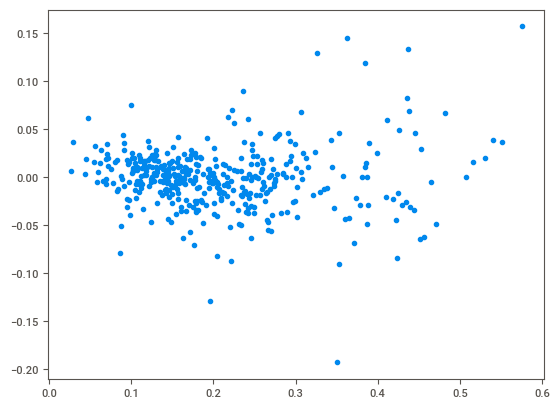

In [90]:
#plot residual vs pred
plt.scatter(y_test_pred, res_test_model2)
plt.show()

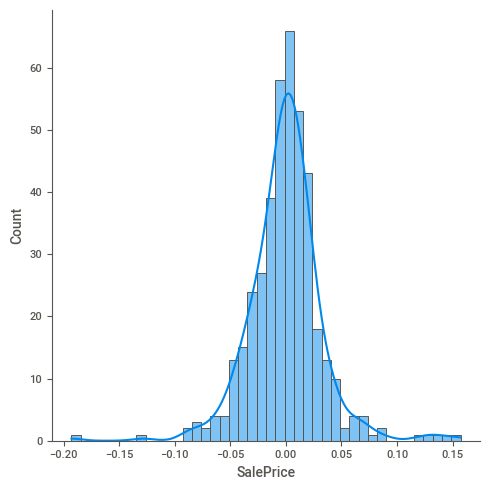

In [91]:
# distribution of error term
sns.displot(res_test_model2, kde=True)
plt.show()

_**Notes:**_
* The error term have mean at 0 and is normally distributed. So looks fine

### Model3
* Lasso regression with all the features

In [92]:
# create lasso model
lasso = Lasso()
# cross validation
model3_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model3_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
#get best alpha value
alpha_lasso_best = model3_cv.best_params_['alpha']
alpha_lasso_best

0.0001

In [94]:
results_lasso = pd.DataFrame(model3_cv.cv_results_)

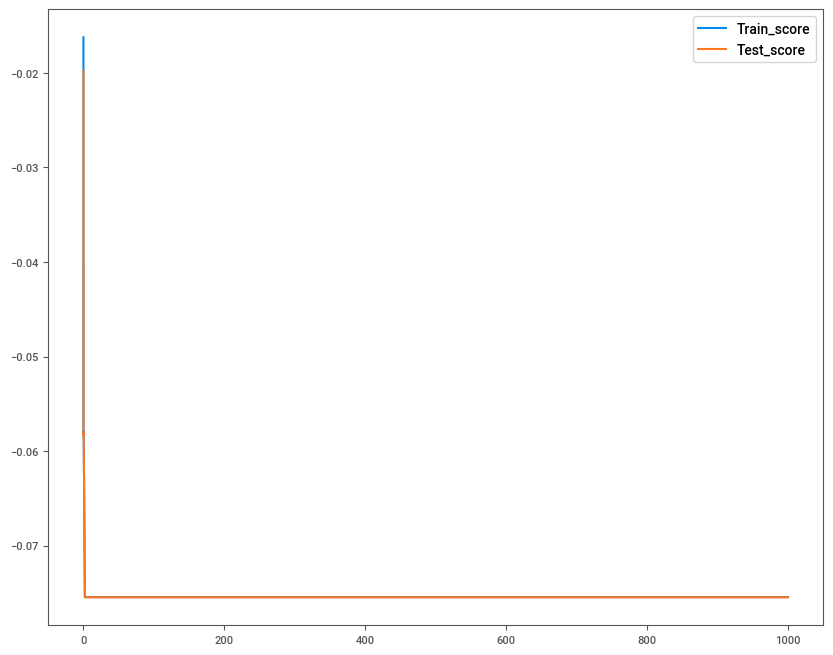

In [95]:
plt.figure(figsize = (10,8))
plt.plot(results_lasso.param_alpha, results_lasso.mean_train_score)
plt.plot(results_lasso.param_alpha, results_lasso.mean_test_score)
plt.legend(['Train_score', 'Test_score'])
plt.show()

In [96]:
#create lasso model with best alpha value
lasso_model3 = Lasso(alpha = alpha_lasso_best)
lasso_model3.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [97]:
lasso_model3.intercept_

-3.45043203061819

In [98]:
lasso_model3.coef_

array([ 3.06695190e-02,  5.75046935e-04,  1.65414441e-04,  8.49147938e-03,
        4.07416518e-02,  0.00000000e+00,  0.00000000e+00,  9.81378819e-02,
        0.00000000e+00,  0.00000000e+00,  4.01334206e-03, -3.95456203e-03,
        2.92965245e-01,  3.63750008e-03, -0.00000000e+00,  2.55288532e-02,
        1.38931694e-02, -2.51198716e-02, -1.80822710e-02,  0.00000000e+00,
        1.68798398e-02,  2.84269155e-02,  9.22100010e-03, -0.00000000e+00,
        8.05475627e-03,  0.00000000e+00, -0.00000000e+00,  8.68369481e-03,
        5.71097862e-02,  0.00000000e+00,  1.00250262e-03, -0.00000000e+00,
        1.04578612e-03,  9.67724632e-04, -5.05944421e-03,  0.00000000e+00,
       -3.35763987e-03,  0.00000000e+00,  0.00000000e+00,  2.34403839e-03,
       -9.30883364e-03, -1.66349144e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  8.32336861e-03,  0.00000000e+00,  7.33080201e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.23879557e-05, -

In [99]:
coef_df_model3 = pd.DataFrame(index = ['Constant'] + list(X_train.columns))
coef_df_model3['Model3_Lasso_alpha_'+str(alpha_lasso_best)] = [lasso_model3.intercept_] + list(lasso_model3.coef_)
coef_df = pd.concat([coef_df, coef_df_model3], axis = 1)

In [100]:
coef_df

Model1_LinearRegression  \
Constant                                                                    -3.419049e+00   
LotArea                                                                      3.410893e-02   
YearBuilt                                                                    5.631470e-04   
YearRemodAdd                                                                 1.095599e-04   
MasVnrArea                                                                   1.979591e-02   
BsmtFinSF1                                                                   7.393844e-02   
BsmtFinSF2                                                                   1.732302e-02   
BsmtUnfSF                                                                    3.076291e-02   
TotalBsmtSF                                                                  7.896523e-02   
CentralAir                                                                  -3.191034e-03   
1stFlrSF                                                                     9.125713e-02   
2ndFlrSF                                                                     1.120229e-01   
LowQualFinSF                                                                 2.759059e-02   
GrLivArea                                                                    1.231273e-01   
BsmtFullBath                                                                 1.126094e-02   
BsmtHalfBath                                                                -3.166747e-03   
FullBath                                                                     3.577312e-02   
HalfBath                                                                     1.517913e-02   
BedroomAbvGr                                                                -5.233202e-02   
KitchenAbvGr                                                                 4.352618e-03   
TotRmsAbvGrd                                                                 2.134631e-02   
Fireplaces                                                                   1.128781e-02   
GarageCars                                                                   3.724763e-02   
GarageArea                                                                   6.279055e-03   
WoodDeckSF                                                                  -3.787210e-03   
OpenPorchSF                                                                  1.567877e-02   
EnclosedPorch                                                                2.235906e-03   
3SsnPorch                                                                    5.545761e-03   
ScreenPorch                                                                  1.882387e-02   
PoolArea                                                                     8.515179e-02   
MiscVal                                                                     -3.166969e-03   
YrSold                                                                       1.021329e-03   
MSSubClass_1-1/2 STORY FINISHED ALL AGES                                    -8.096555e-03   
MSSubClass_1-STORY 1945 & OLDER                                              1.771952e-03   
MSSubClass_1-STORY 1946 & NEWER ALL STYLES                                  -4.167760e-03   
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER            -2.961515e-02   
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES                                 6.203812e-03   
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                        -4.021784e-03   
MSSubClass_2-1/2 STORY ALL AGES                                             -6.962821e-03   
MSSubClass_2-STORY 1945 & OLDER                                              3.451138e-03   
MSSubClass_2-STORY 1946 & NEWER                                              2.208801e-03   
MSSubClass_2-STORY PUD - 1946 & NEWER                                       -2.903198e-02   
MSSubClass_DUPLEX - ALL STYLES AND AGES                            

In [101]:
#predict and calculate metrics on train and test data
y_train_pred = lasso_model3.predict(X_train)
y_test_pred = lasso_model3.predict(X_test)

In [102]:
#calculating metrics for model3
metric_model3 = []
r2_train = r2_score(y_train, y_train_pred)
metric_model3.append(r2_train)

r2_test = r2_score(y_test, y_test_pred)
metric_model3.append(r2_test)

rss_train = np.sum(np.square(y_train - y_train_pred))
metric_model3.append(rss_train)

rss_test = np.sum(np.square(y_test - y_test_pred))
metric_model3.append(rss_test)

mse_train = mean_squared_error(y_train, y_train_pred)
metric_model3.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_test_pred)
metric_model3.append(mse_test**0.5)

In [103]:
df_metrics['Model3_Lasso_alpha_'+str(alpha_lasso_best)] = metric_model3

In [104]:
df_metrics

Model1_LinearRegression  Model2_Ridge_alpha_5.0  \
r2_score_train                 0.951958                0.940701   
r2_score_test                  0.900242                0.908014   
rss_train                      0.502649                0.620434   
rss_test                       0.488821                0.450739   
mse_train                      0.022823                0.025356   
mse_test                       0.034362                0.032996   

                Model3_Lasso_alpha_0.0001  
r2_score_train                   0.942063  
r2_score_test                    0.914318  
rss_train                        0.606181  
rss_test                         0.419846  
mse_train                        0.025063  
mse_test                         0.031845

In [105]:
# analysing error
res_test_model3 = y_test - y_test_pred

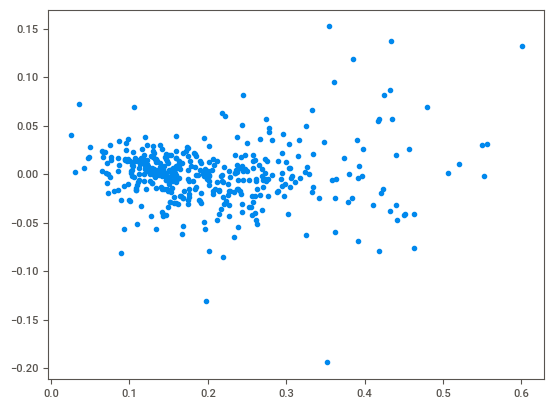

In [106]:
#plot residual vs pred
plt.scatter(y_test_pred, res_test_model3)
plt.show()

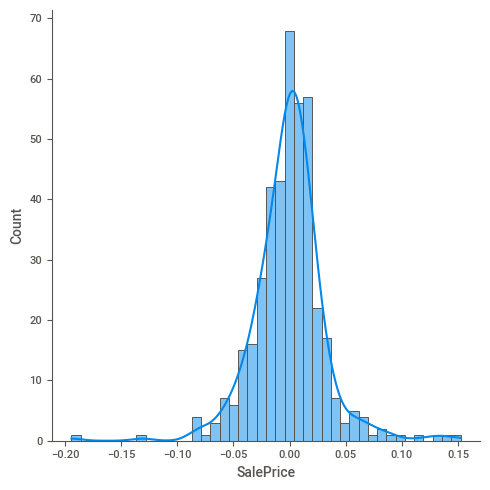

In [107]:
# distribution of error term
sns.displot(res_test_model3, kde=True)
plt.show()

_**Notes:**_
* The error term have mean at 0 and is normally distributed. So looks fine

In [108]:
#Number of features selected by Lasso
features_lasso = list(coef_df[coef_df['Model3_Lasso_alpha_'+str(alpha_lasso_best)] != 0].index)
features_lasso.remove('Constant')
print("Number of Features selected by Lasso: {}".format(len(features_lasso)))
print(features_lasso)

Number of Features selected by Lasso: 116
['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'ScreenPorch', 'PoolArea', 'YrSold', 'MSSubClass_1-STORY 1945 & OLDER', 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES', 'MSSubClass_2-STORY 1946 & NEWER', 'MSSubClass_2-STORY PUD - 1946 & NEWER', 'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'MSZoning_FV', 'MSZoning_RL', 'LotShape_Reg', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'

## Step4: Compare Coefficients and Results

In [109]:
coef_df

Model1_LinearRegression  \
Constant                                                                    -3.419049e+00   
LotArea                                                                      3.410893e-02   
YearBuilt                                                                    5.631470e-04   
YearRemodAdd                                                                 1.095599e-04   
MasVnrArea                                                                   1.979591e-02   
BsmtFinSF1                                                                   7.393844e-02   
BsmtFinSF2                                                                   1.732302e-02   
BsmtUnfSF                                                                    3.076291e-02   
TotalBsmtSF                                                                  7.896523e-02   
CentralAir                                                                  -3.191034e-03   
1stFlrSF                                                                     9.125713e-02   
2ndFlrSF                                                                     1.120229e-01   
LowQualFinSF                                                                 2.759059e-02   
GrLivArea                                                                    1.231273e-01   
BsmtFullBath                                                                 1.126094e-02   
BsmtHalfBath                                                                -3.166747e-03   
FullBath                                                                     3.577312e-02   
HalfBath                                                                     1.517913e-02   
BedroomAbvGr                                                                -5.233202e-02   
KitchenAbvGr                                                                 4.352618e-03   
TotRmsAbvGrd                                                                 2.134631e-02   
Fireplaces                                                                   1.128781e-02   
GarageCars                                                                   3.724763e-02   
GarageArea                                                                   6.279055e-03   
WoodDeckSF                                                                  -3.787210e-03   
OpenPorchSF                                                                  1.567877e-02   
EnclosedPorch                                                                2.235906e-03   
3SsnPorch                                                                    5.545761e-03   
ScreenPorch                                                                  1.882387e-02   
PoolArea                                                                     8.515179e-02   
MiscVal                                                                     -3.166969e-03   
YrSold                                                                       1.021329e-03   
MSSubClass_1-1/2 STORY FINISHED ALL AGES                                    -8.096555e-03   
MSSubClass_1-STORY 1945 & OLDER                                              1.771952e-03   
MSSubClass_1-STORY 1946 & NEWER ALL STYLES                                  -4.167760e-03   
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER            -2.961515e-02   
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES                                 6.203812e-03   
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                        -4.021784e-03   
MSSubClass_2-1/2 STORY ALL AGES                                             -6.962821e-03   
MSSubClass_2-STORY 1945 & OLDER                                              3.451138e-03   
MSSubClass_2-STORY 1946 & NEWER                                              2.208801e-03   
MSSubClass_2-STORY PUD - 1946 & NEWER                                       -2.903198e-02   
MSSubClass_DUPLEX - ALL STYLES AND AGES                            

_**Notes:**_
* The coefficients have decreased from MLR to Ridge To Lasso
* Rige Model made so of the coefficients to 0 and finally selected 116 Features out of 272 features

In [110]:
df_metrics

Model1_LinearRegression  Model2_Ridge_alpha_5.0  \
r2_score_train                 0.951958                0.940701   
r2_score_test                  0.900242                0.908014   
rss_train                      0.502649                0.620434   
rss_test                       0.488821                0.450739   
mse_train                      0.022823                0.025356   
mse_test                       0.034362                0.032996   

                Model3_Lasso_alpha_0.0001  
r2_score_train                   0.942063  
r2_score_test                    0.914318  
rss_train                        0.606181  
rss_test                         0.419846  
mse_train                        0.025063  
mse_test                         0.031845

_**Notes:**_
* The Difference in Test and Train scores is minimum for Lasso Model

In [111]:
#Top 10 features Linear Regression
list(coef_df['Model1_LinearRegression'].
     drop(index = 'Constant', axis = 0).
     sort_values(key= abs, ascending=False).index)[:10]

['GrLivArea',
 'OverallQual_Very Excellent',
 '2ndFlrSF',
 '1stFlrSF',
 'OverallQual_Excellent',
 'PoolArea',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'Exterior1st_CemntBd',
 'Exterior2nd_CmentBd']

In [112]:
#Top 10 features Ridge
list(coef_df['Model2_Ridge_alpha_'+str(alpha_ridge_best)].
     drop(index = 'Constant', axis = 0).
     sort_values(key= abs, ascending=False).index)[:10]

['GrLivArea',
 '1stFlrSF',
 'OverallQual_Very Excellent',
 'OverallQual_Excellent',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'Neighborhood_StoneBr',
 'FullBath',
 'PoolArea']

In [113]:
#Top 10 features Lasso
list(coef_df['Model3_Lasso_alpha_'+str(alpha_lasso_best)].
     drop(index = 'Constant', axis = 0).
     sort_values(key= abs, ascending=False).index)[:10]

['GrLivArea',
 'OverallQual_Very Excellent',
 'TotalBsmtSF',
 'OverallQual_Excellent',
 'PoolArea',
 'Neighborhood_StoneBr',
 'BsmtFinSF1',
 'Neighborhood_NoRidge',
 'OverallCond_Excellent',
 'Neighborhood_Crawfor']

### Summary
<br>

* From EDA we found Numerical variables GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, TotRmsAbvGrd and Categorical variables OverallQual, Neighborhood, GarageCars, ExterQual, BsmtQual have high linear behaviour with SalePrice
<br>

* Total of 272 features were selected at the end of EDA
<br>

* Models for Linear Regression , Ridge and Lasso were creted with all the features and coefficients and results were compared
<br>

* The error term for all the model seems to follow Normal distribution with mean 0
<br>

* The best **Alpha value for Ridge was obtained as 5 and for Lasso it was obtained as 0.0001**
<br>

* Upon final comparison of results, it was found that Lasso regression gave slightly better results with minumum difference in train and test score. Also Lasso regression helped to remove some features and finally selected 116 features which makes it less complex than other models.
<br>

* Based on results, **Lasso Model can be finally selected** as best among the 3
<br>

* Top 10 features selected by Lasso Model - **GrLivArea, OverallQual_Very Excellent, TotalBsmtSF, OverallQual_Excellent, PoolArea, Neighborhood_StoneBr, BsmtFinSF1, Neighborhood_NoRidge, OverallCond_Excellent, Neighborhood_Crawfor**
